<a href="https://colab.research.google.com/github/msht/My_Portfolio/blob/main/Leiden_postprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Logit_model**

In [ ]:
leiden_df = pd.read_csv('/content/drive/MyDrive/Rice Google Drive/Research/Misc/nasim_ML.csv', sep = ',')

In [ ]:
X = leiden_df.drop(['wall', 'liquid', 'Explosive', 'time (ns)'],axis = 1)
Y = leiden_df['Explosive']

In [ ]:
# Cross-Validation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
# C = Higher the better, max_iter =
logit_model = LogisticRegression(C = 1e6, max_iter = 1e8, solver = 'lbfgs')

In [ ]:
logit_model.fit(X_train, Y_train)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000000.0, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [ ]:
# Accuracy
logit_model.score(X_test, Y_test)

1.0

In [ ]:
X_grid, Y_grid, Ne_grid = np.meshgrid(np.linspace(40, 320, 64), np.linspace(3, 6, 64), np.linspace(0.5,4,64))

In [ ]:
X_grid_df = pd.DataFrame()

In [ ]:
X_grid_df[0] = pd.Series(X_grid.ravel())

In [ ]:
X_grid_df[1] = pd.Series(Y_grid.ravel())

In [ ]:
X_grid_df[2] = pd.Series(Ne_grid.ravel())

**Predicting classification**

In [ ]:
logit_Z = logit_model.predict(X_grid_df)

In [ ]:
X_grid.shape

(64, 64, 64)

In [ ]:
logit_Z = logit_Z.reshape(X_grid.shape)

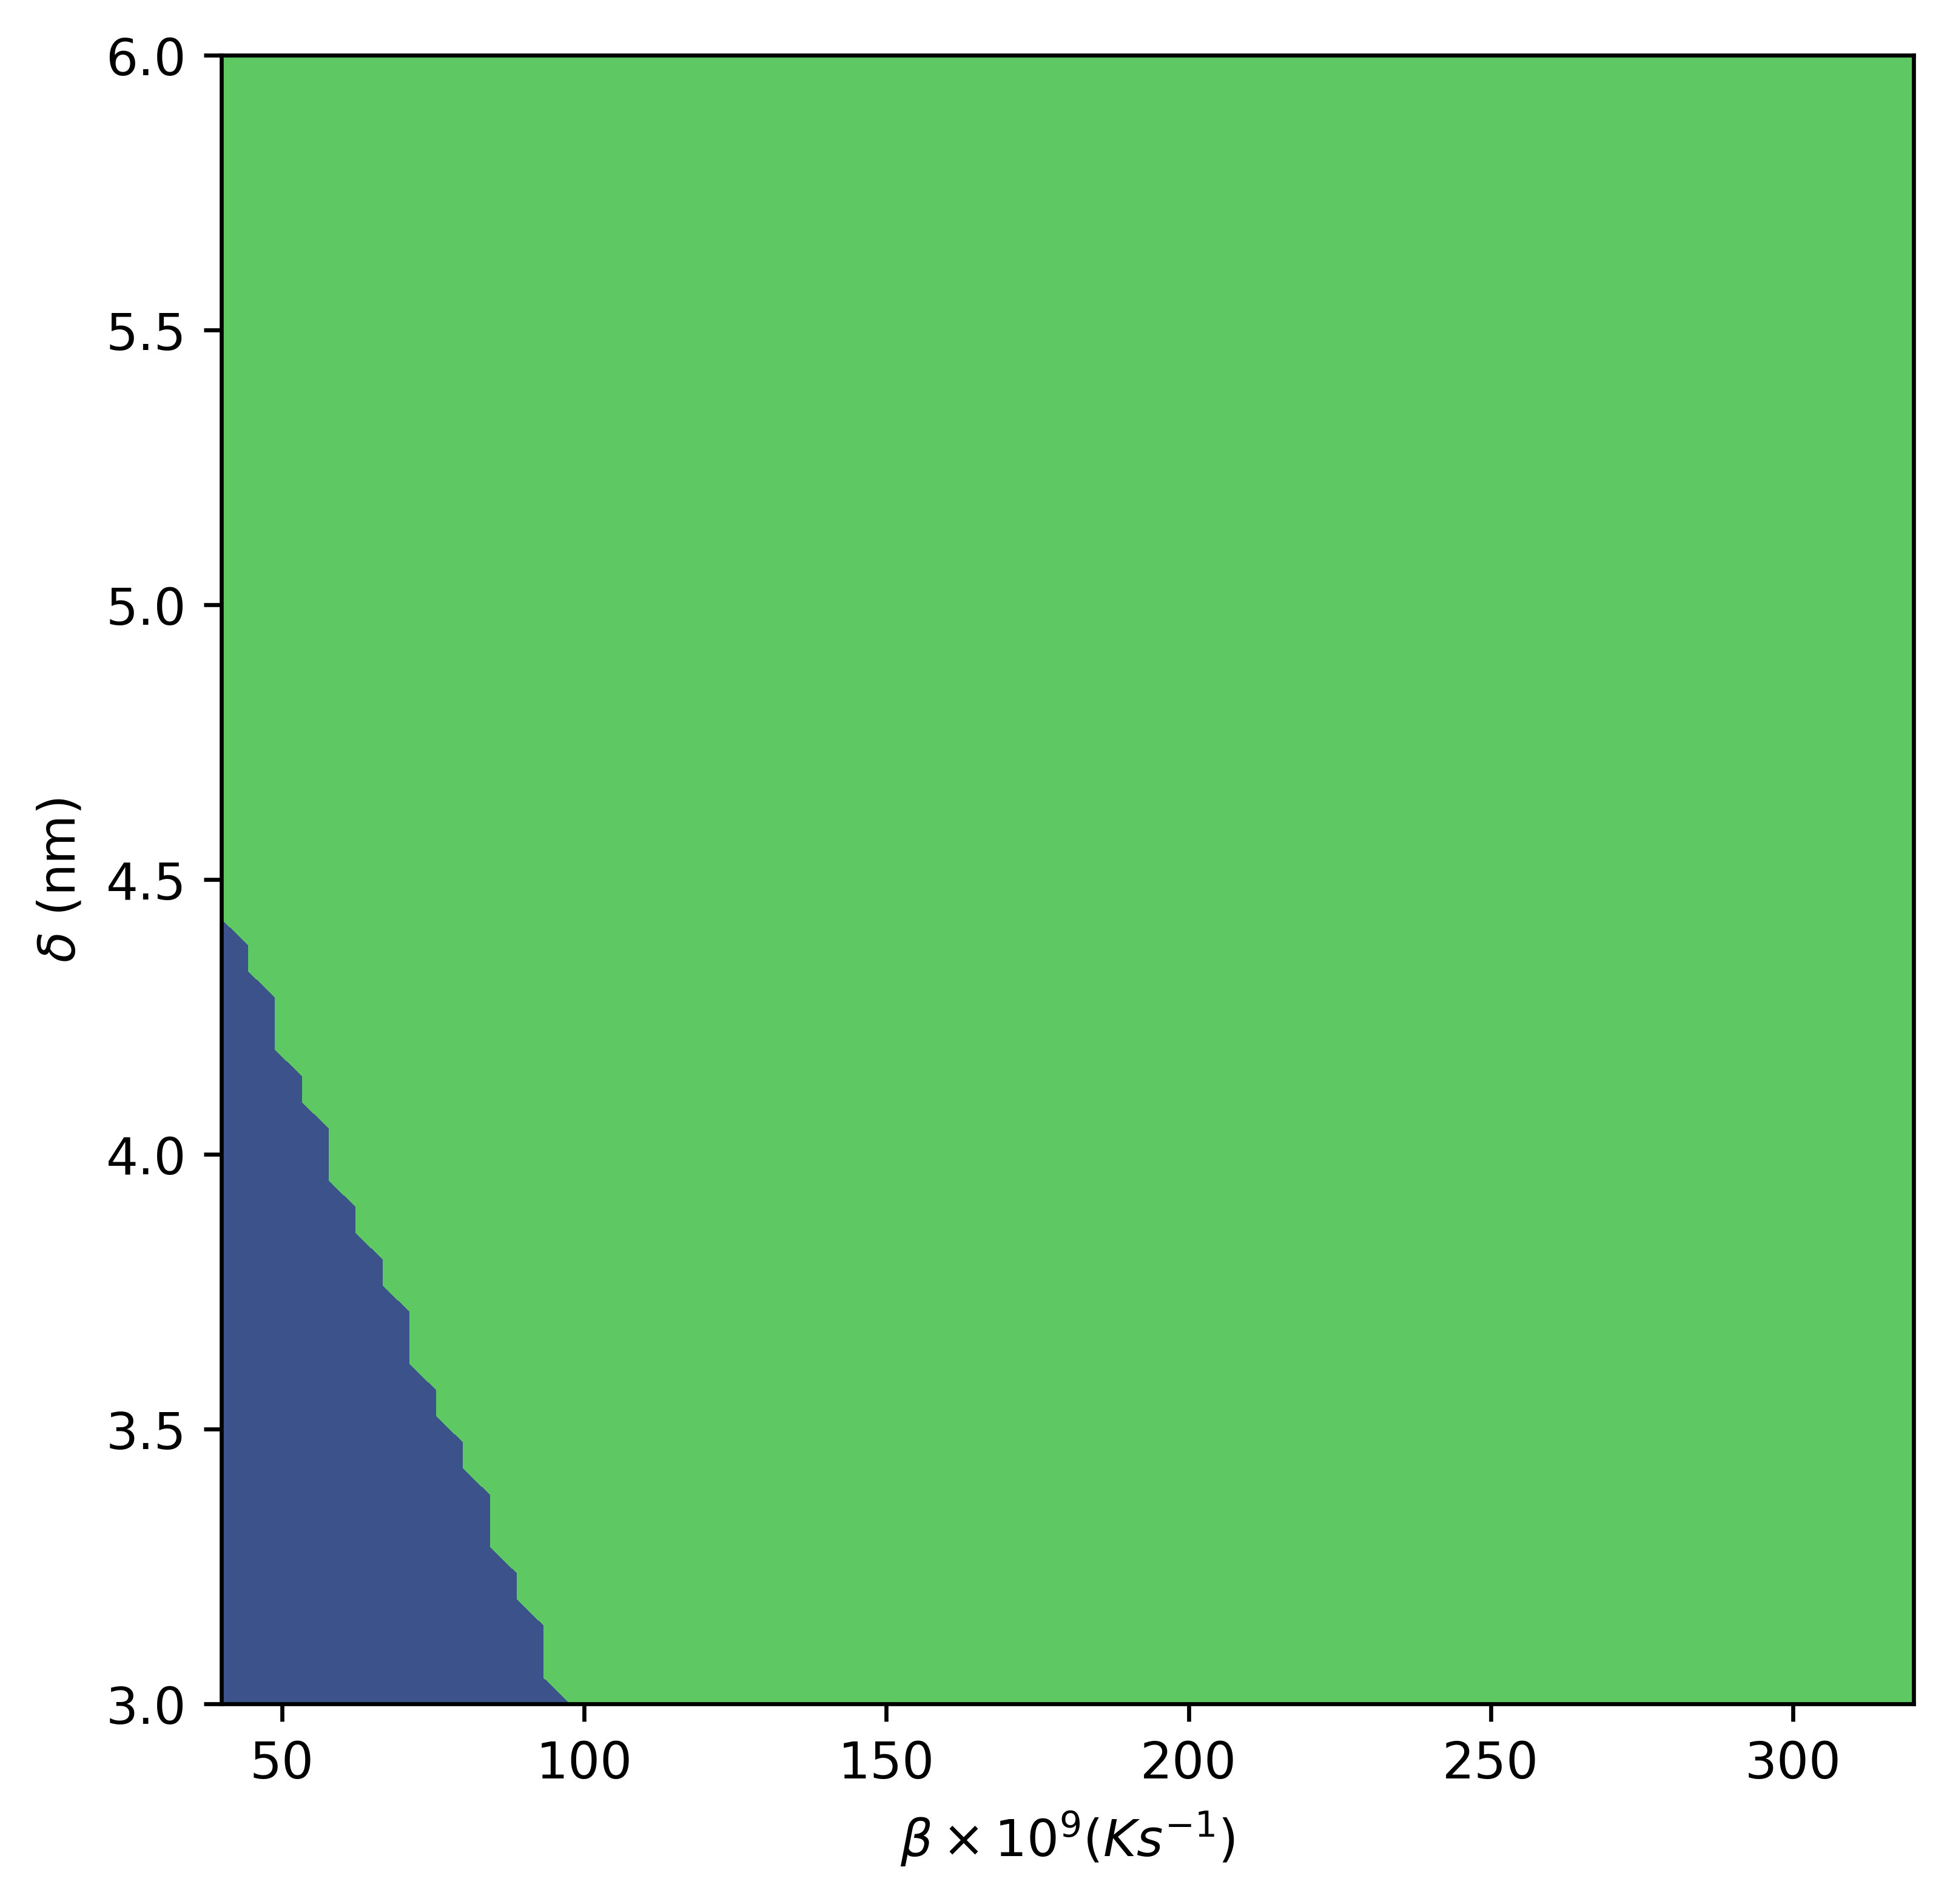

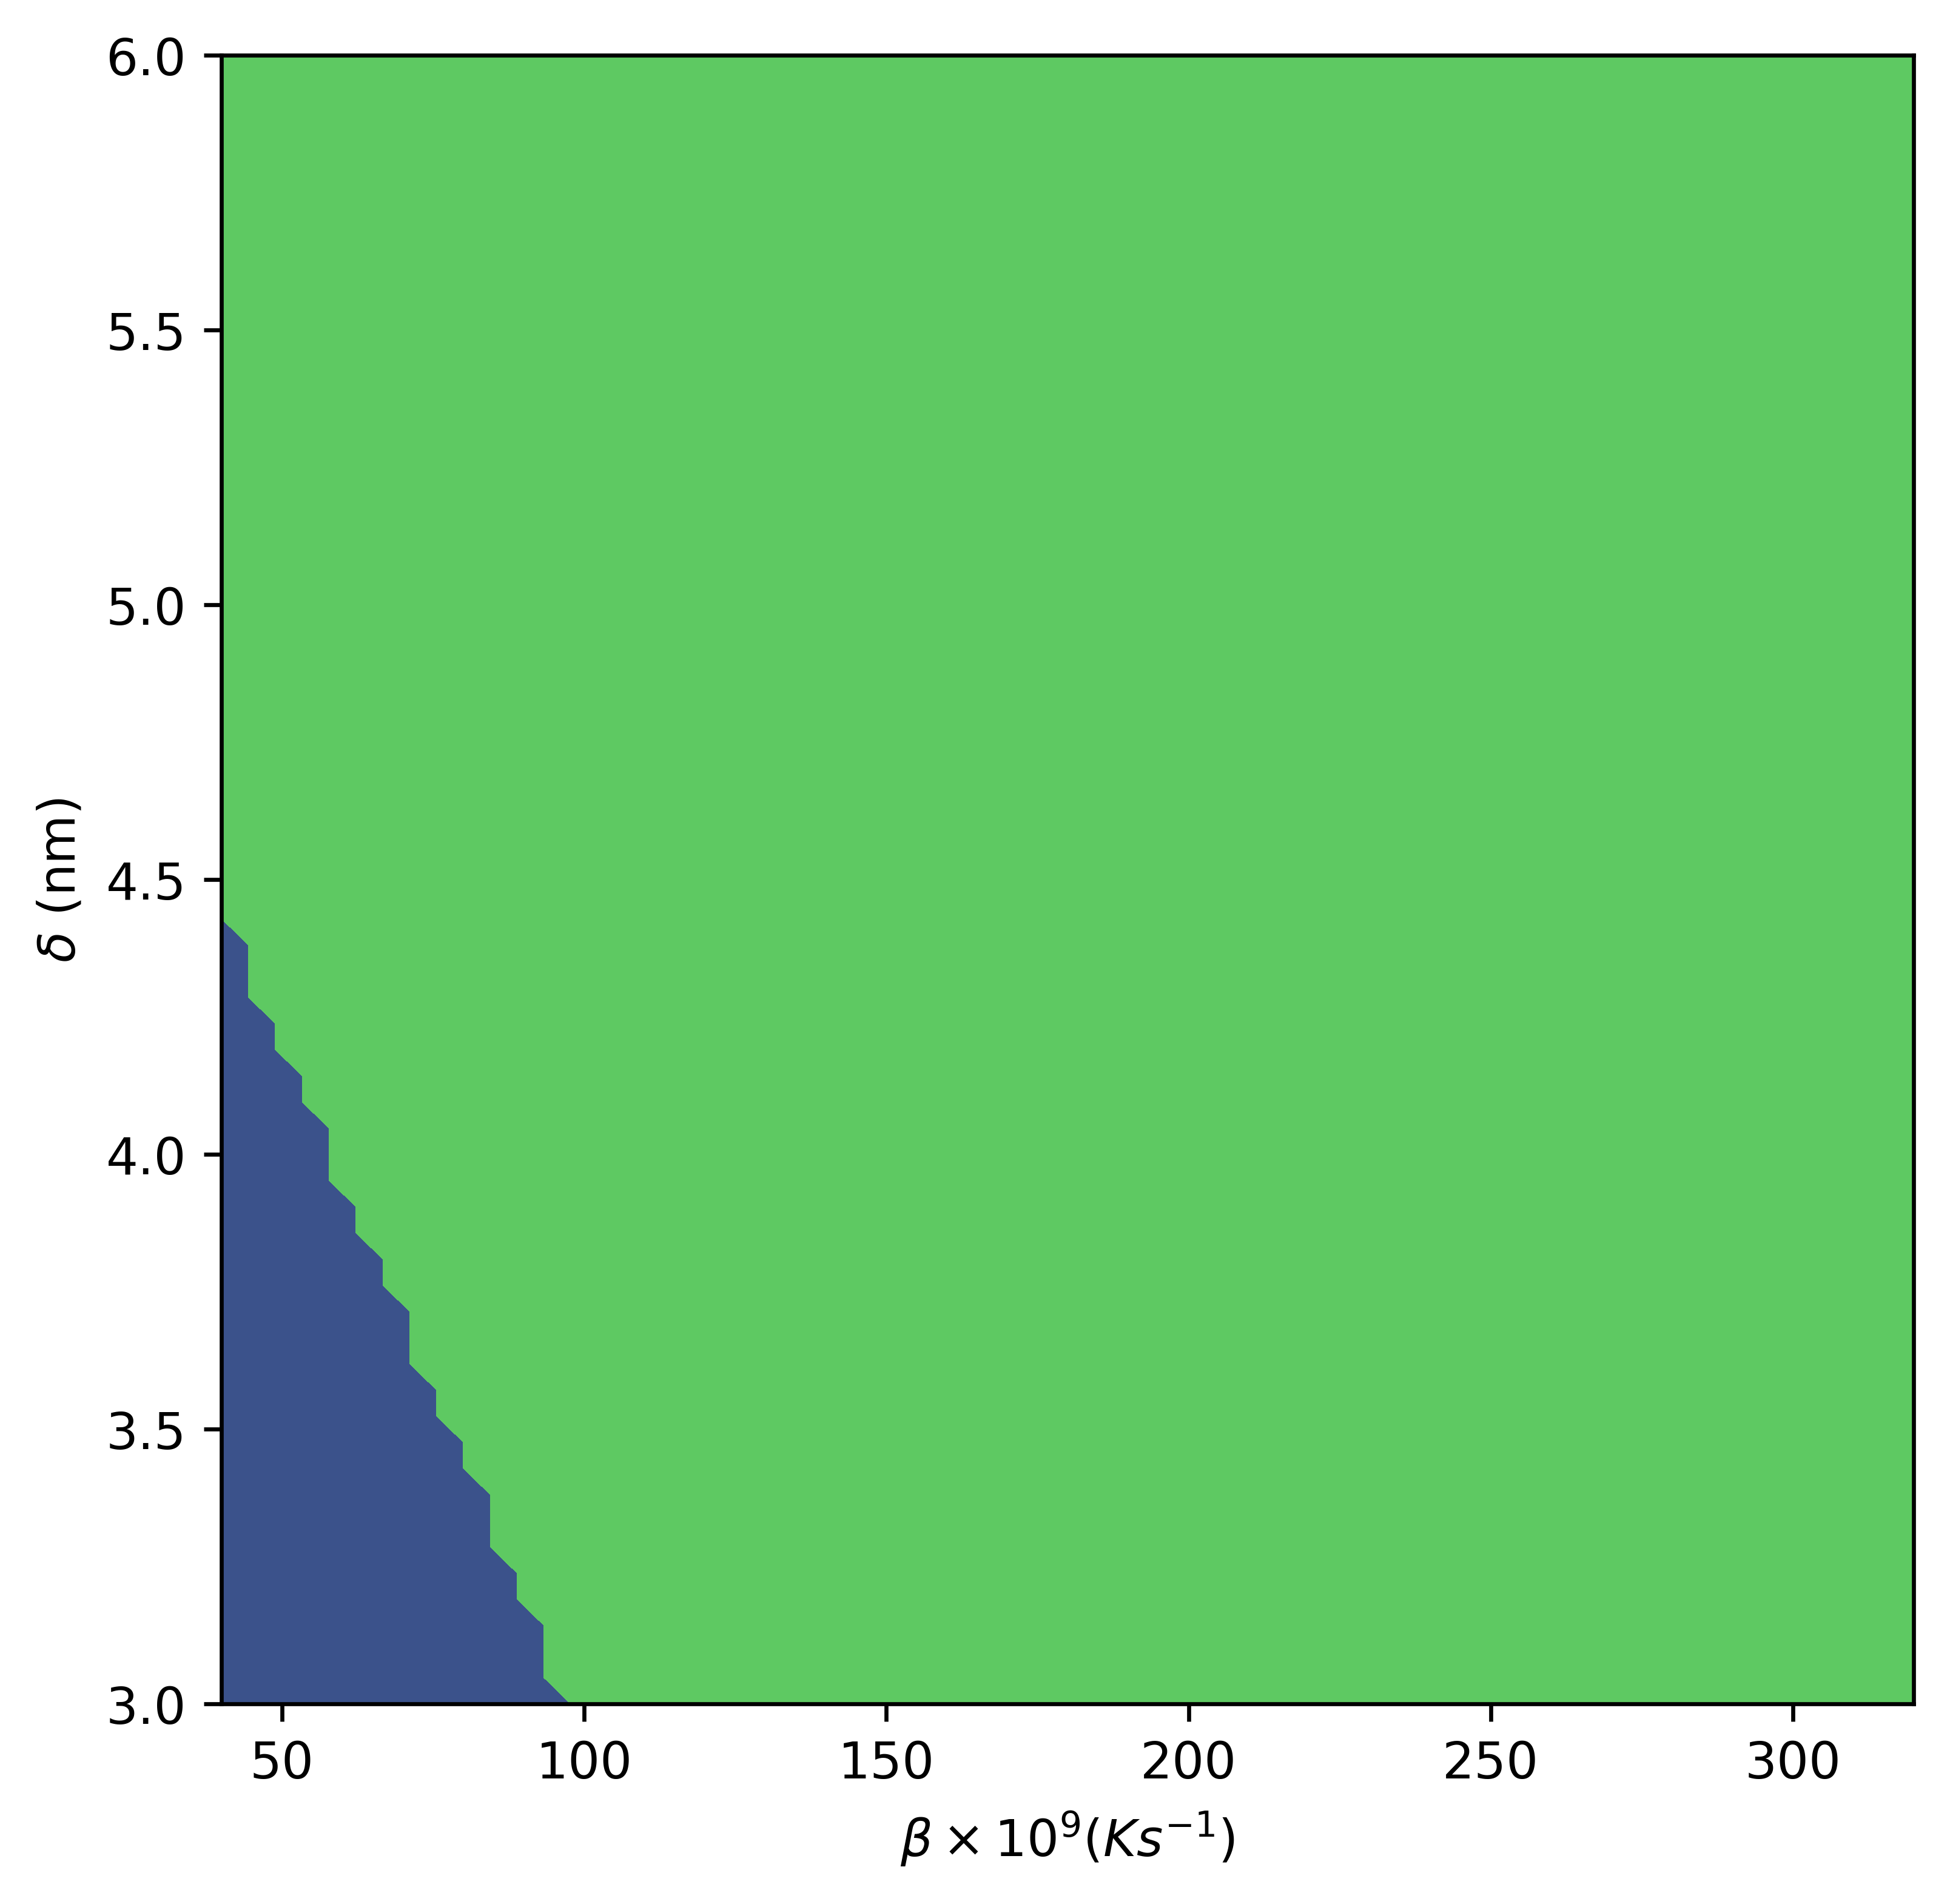

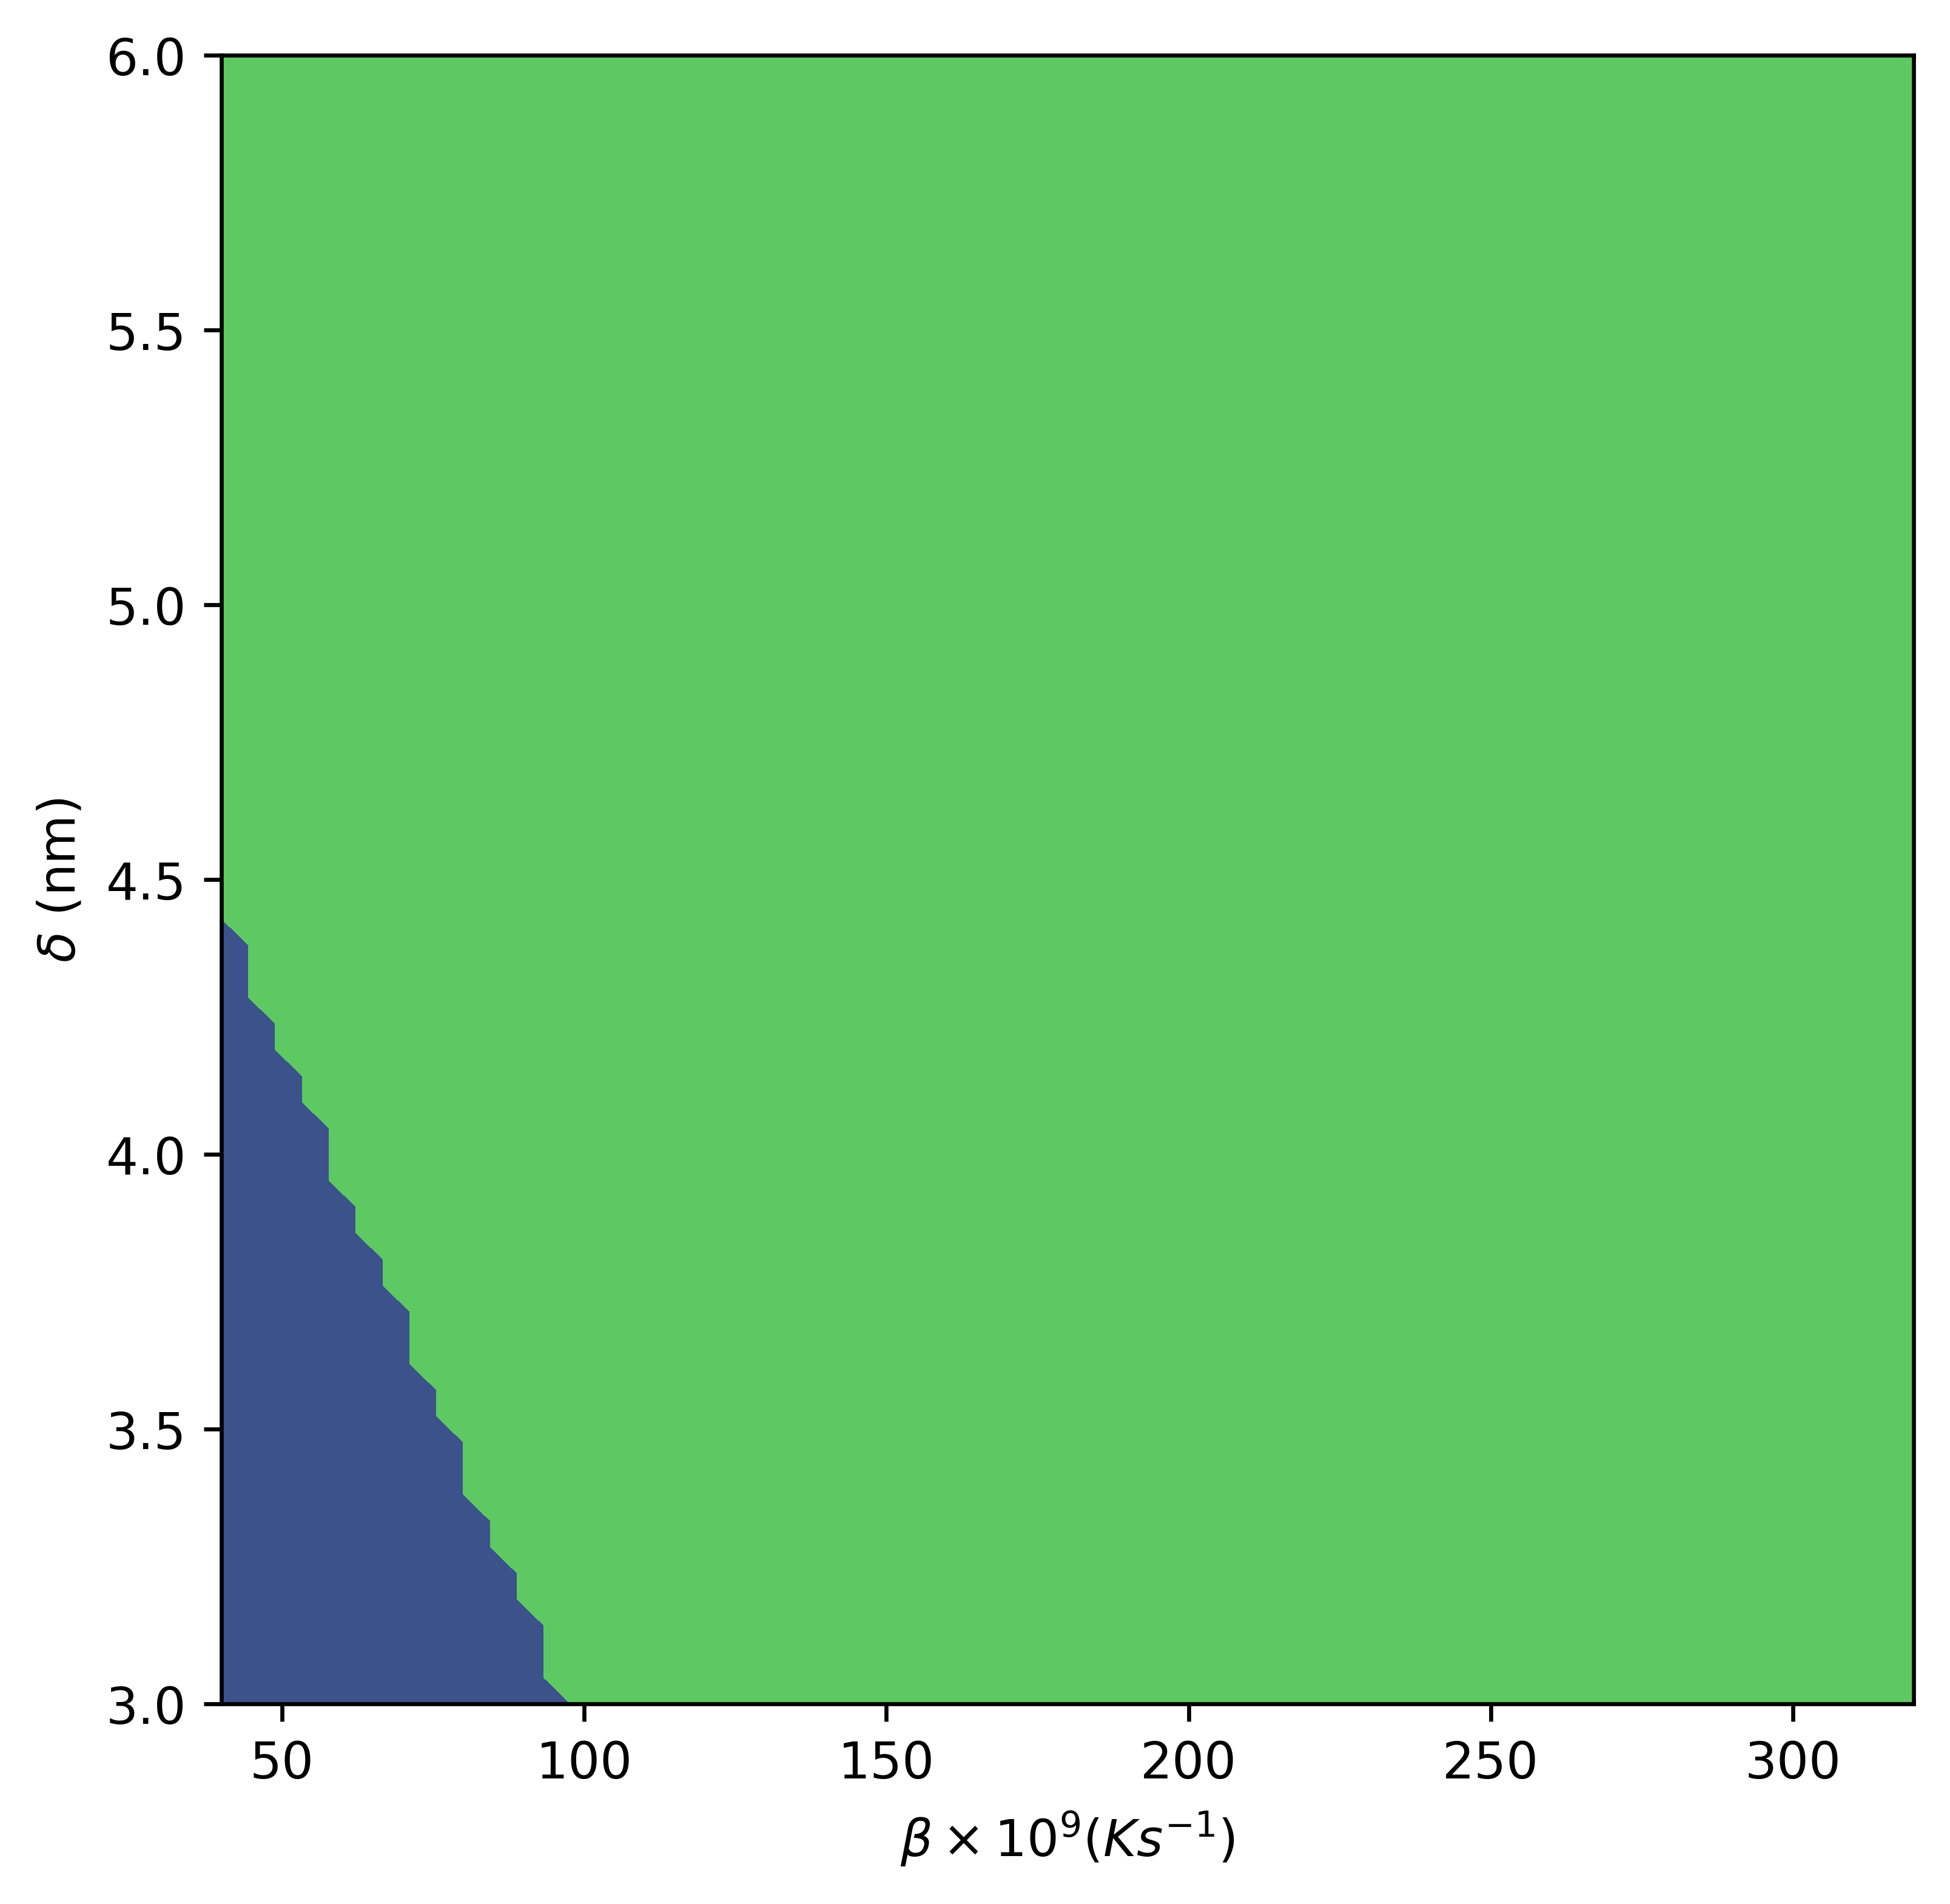

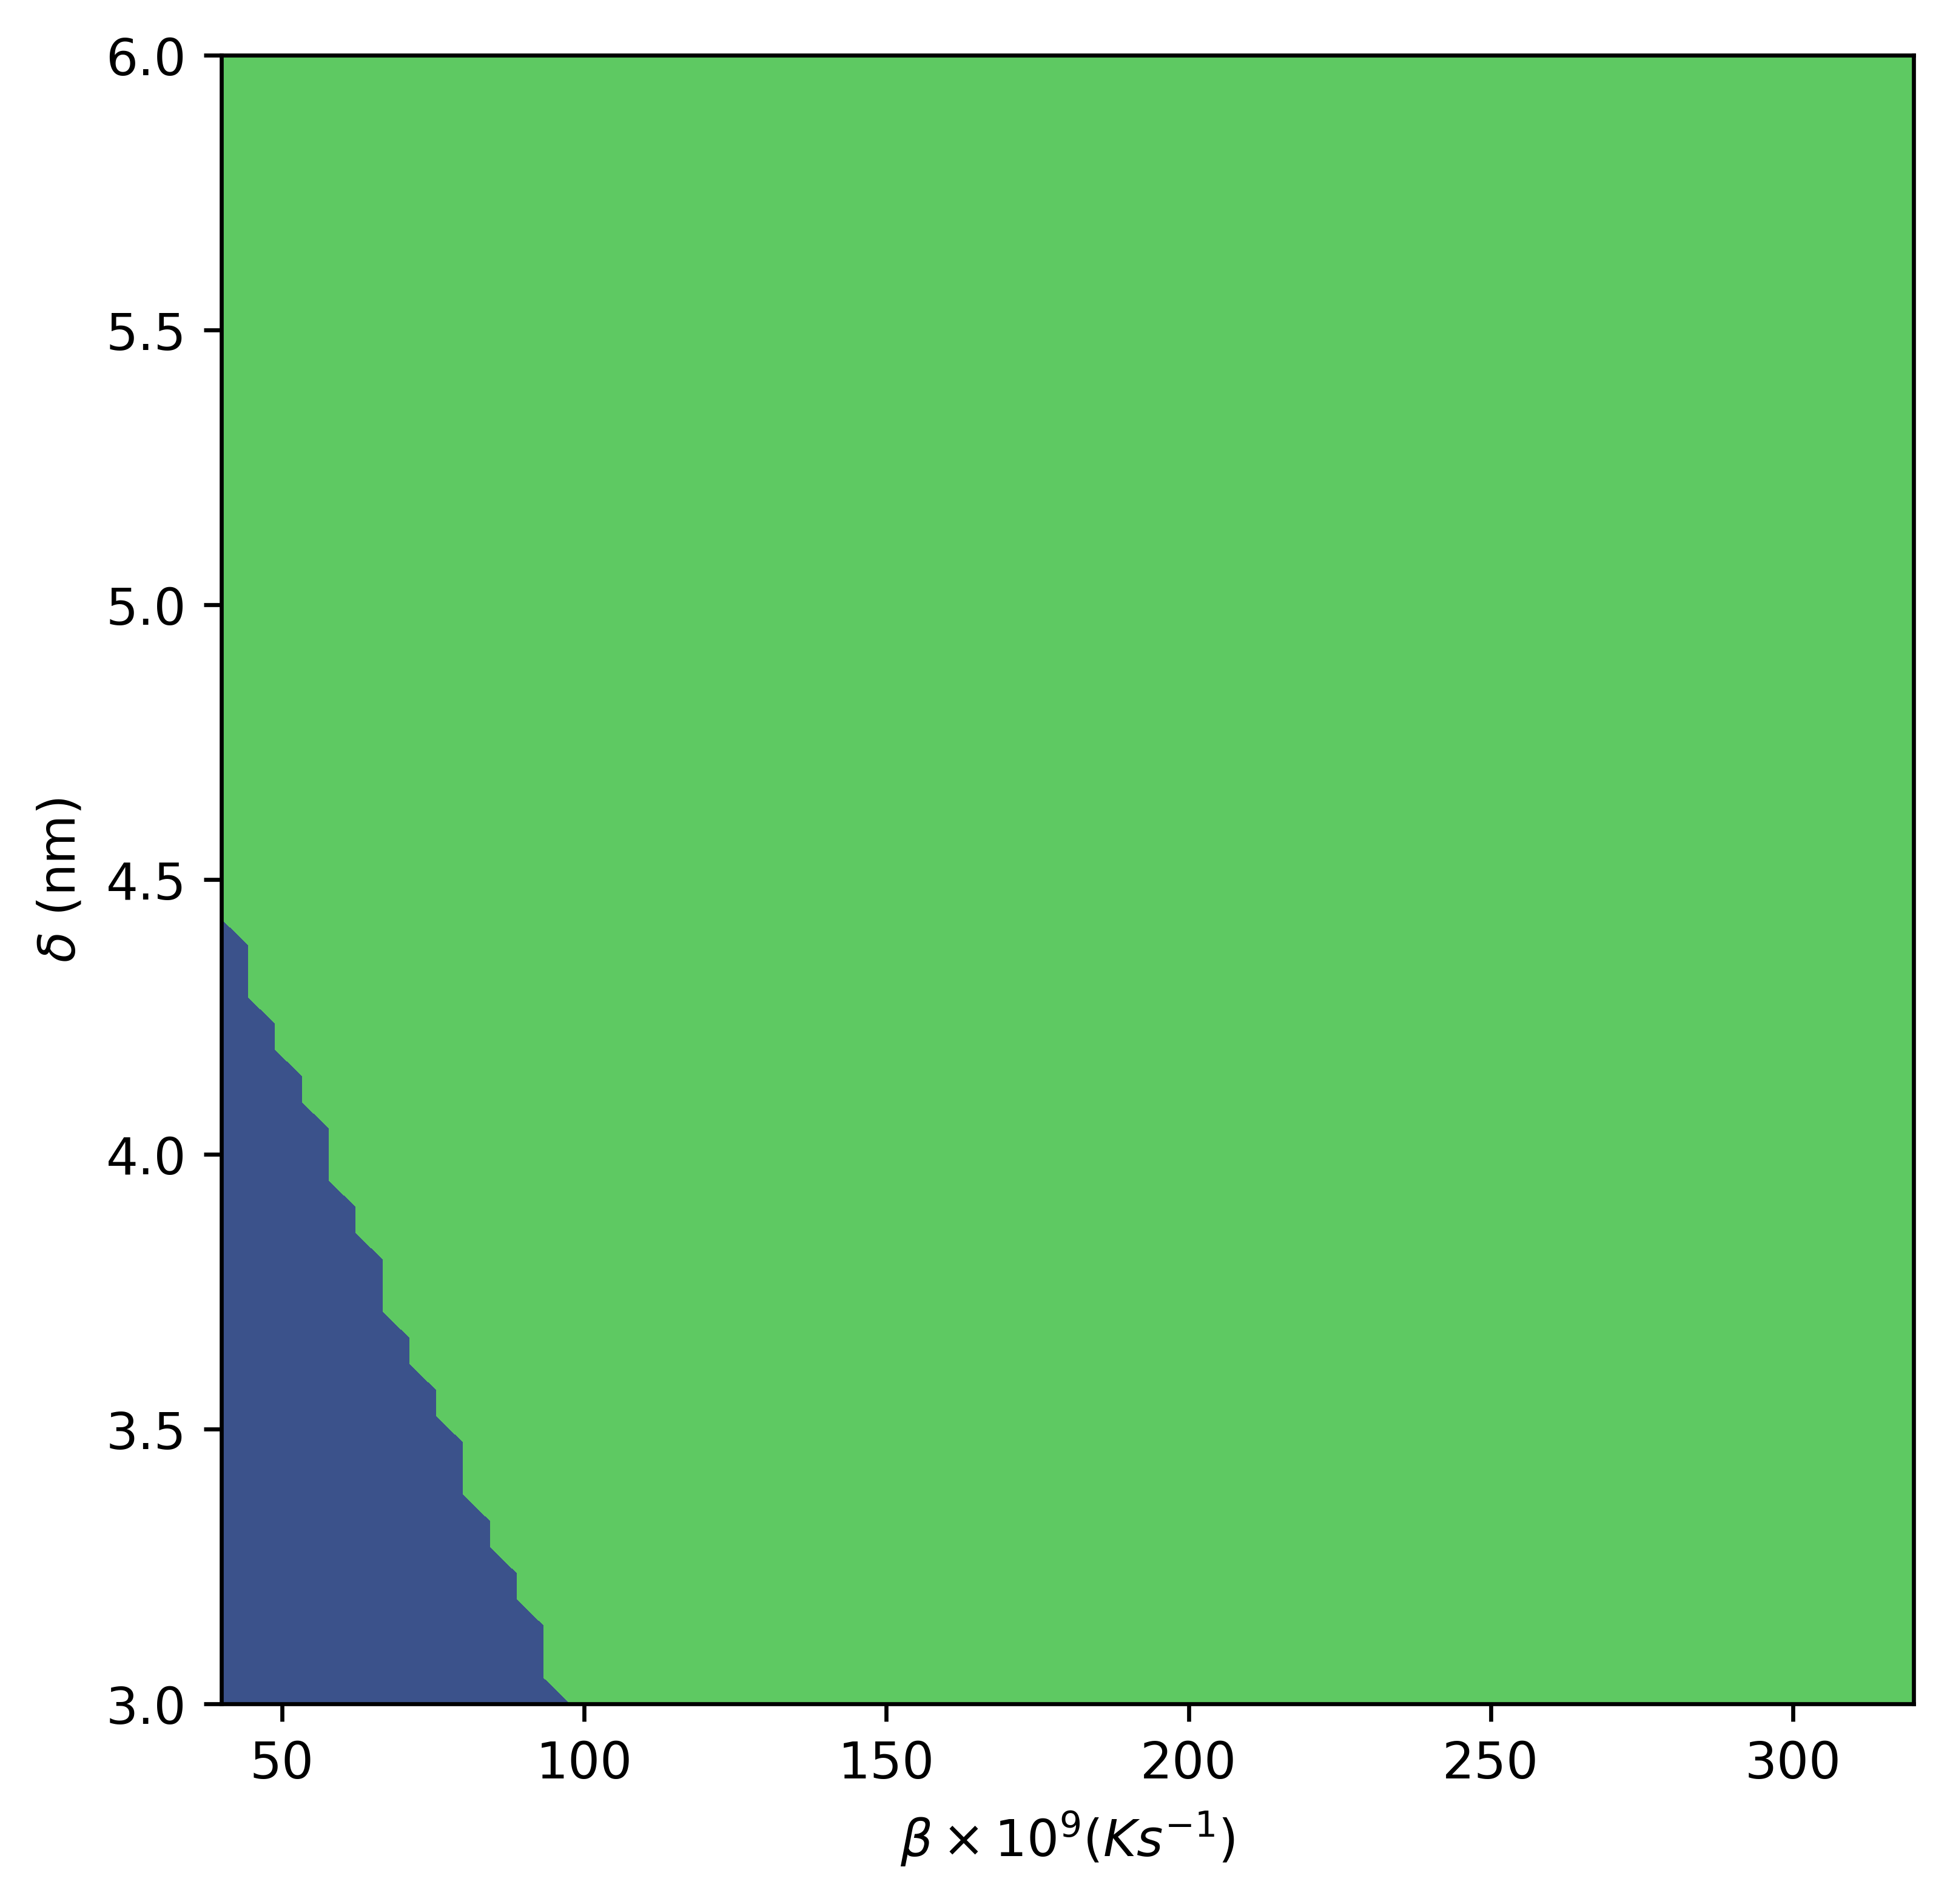

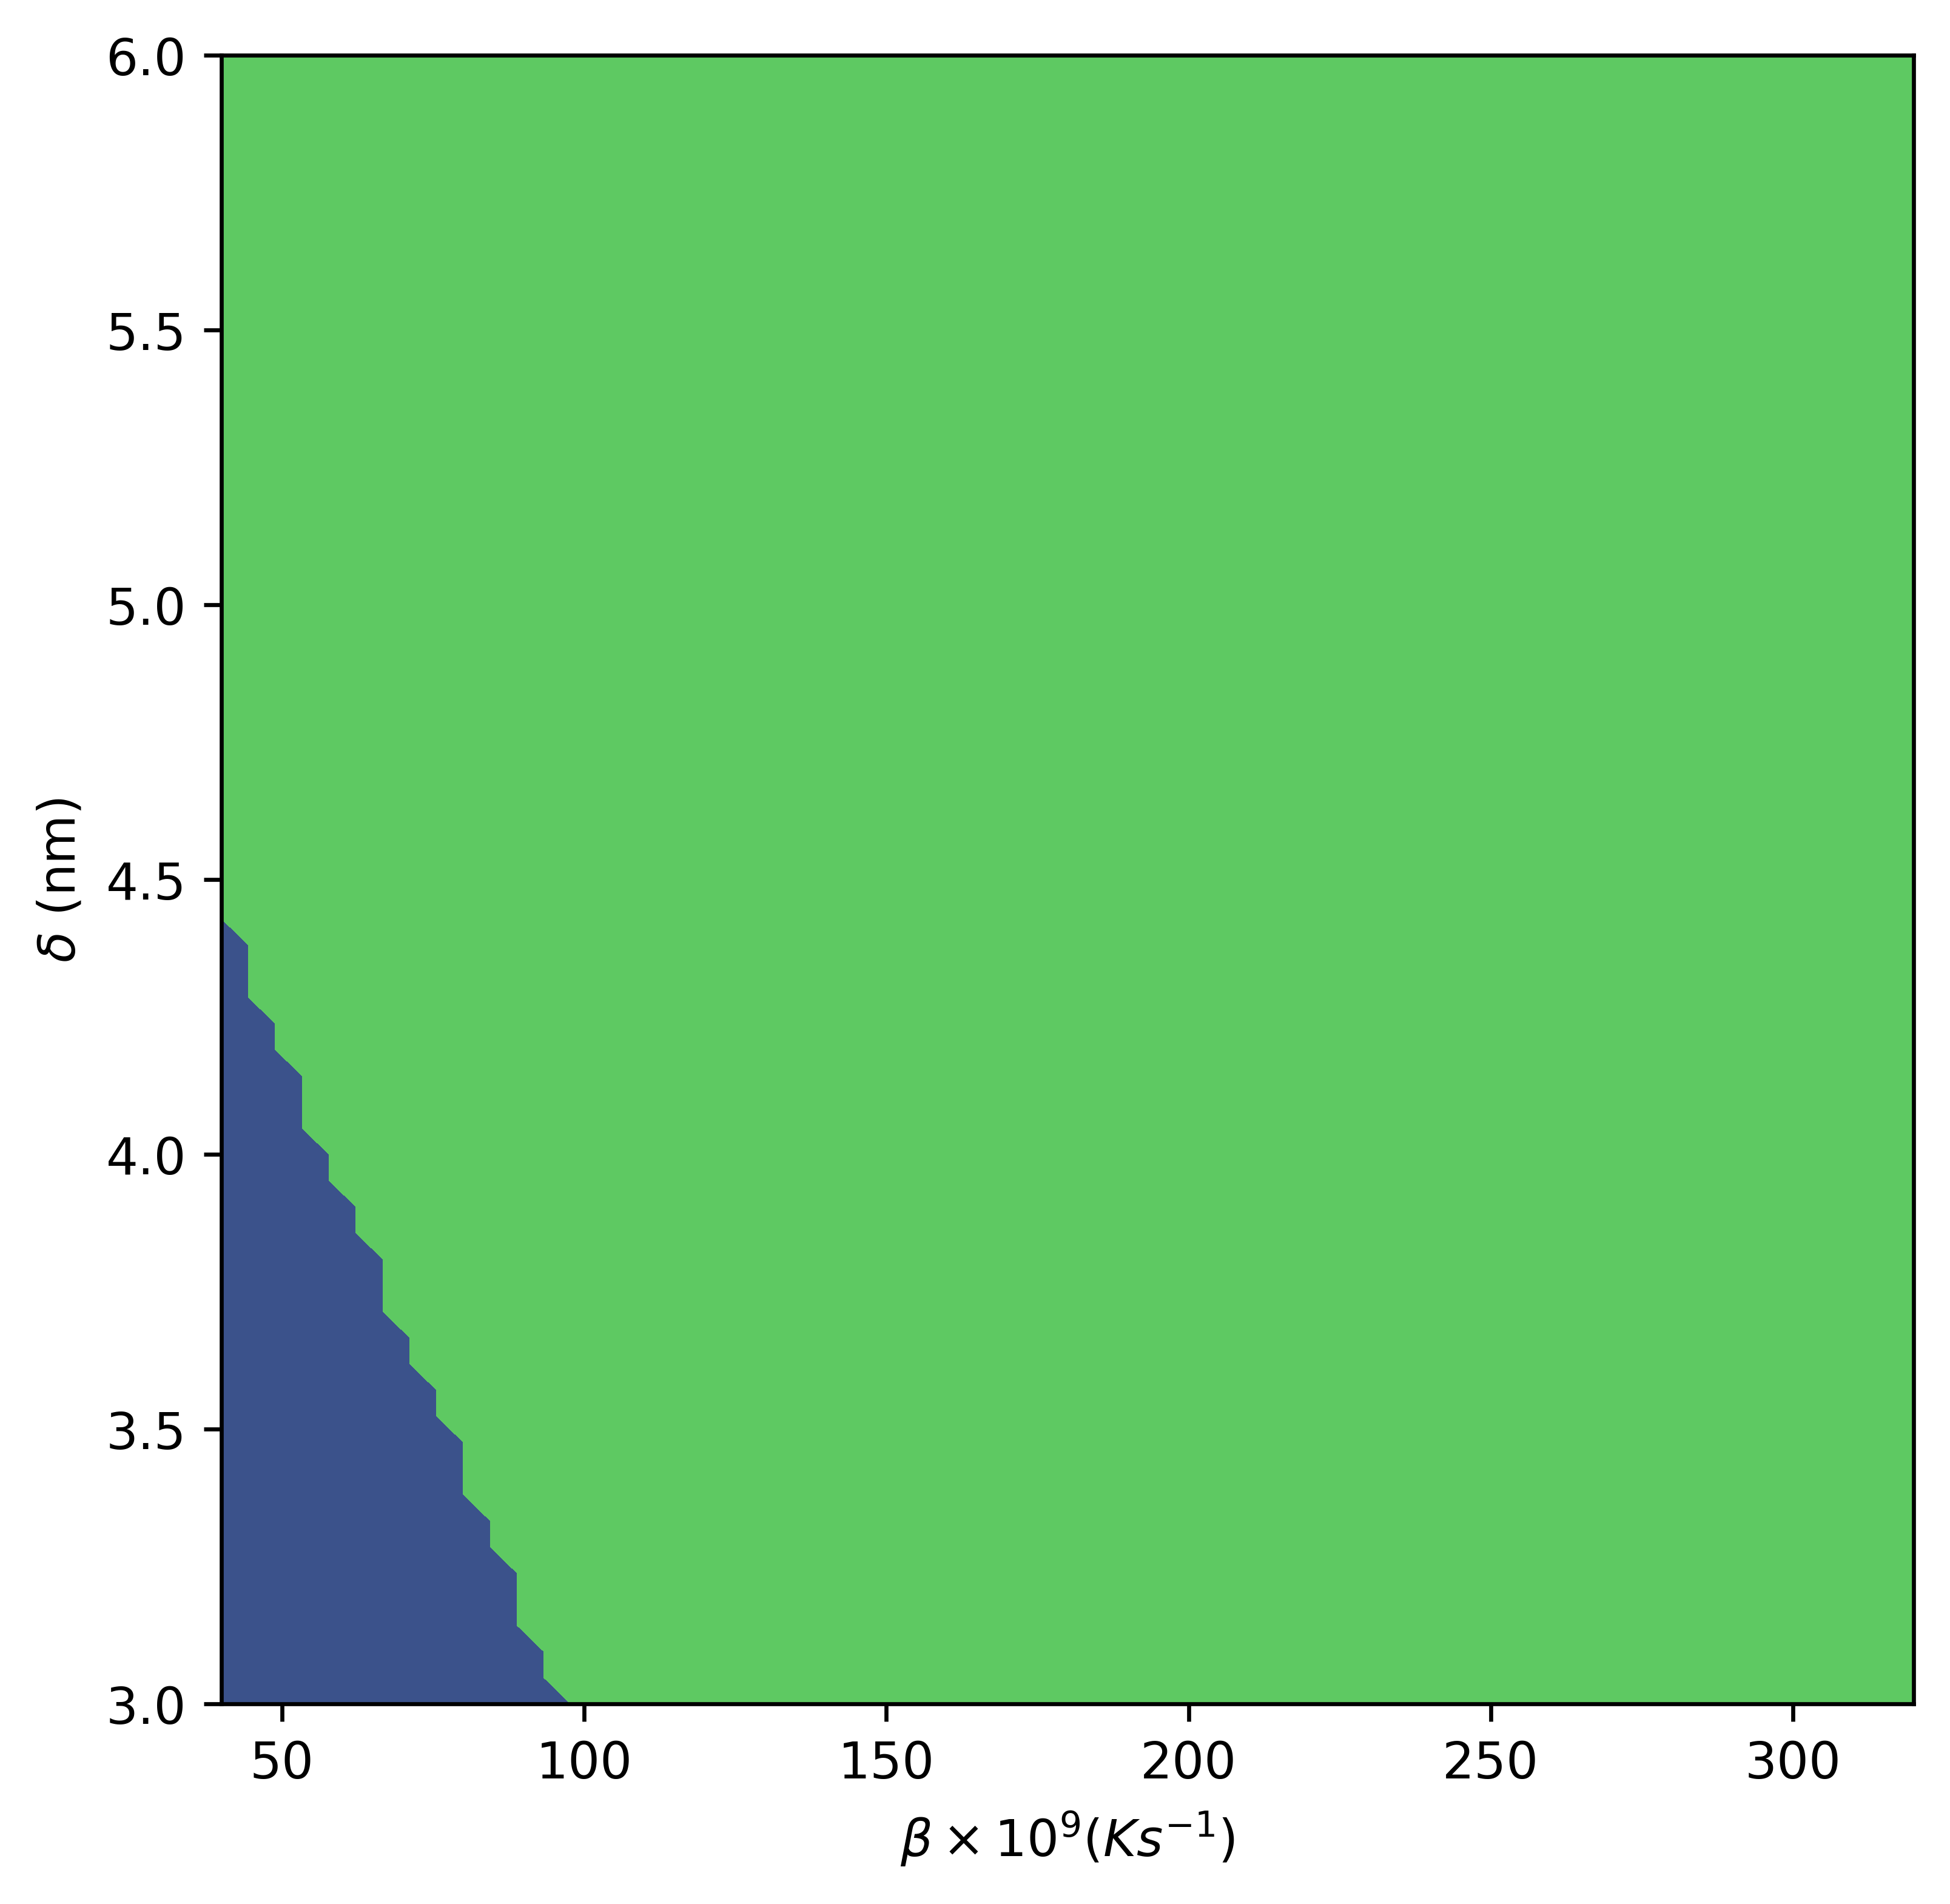

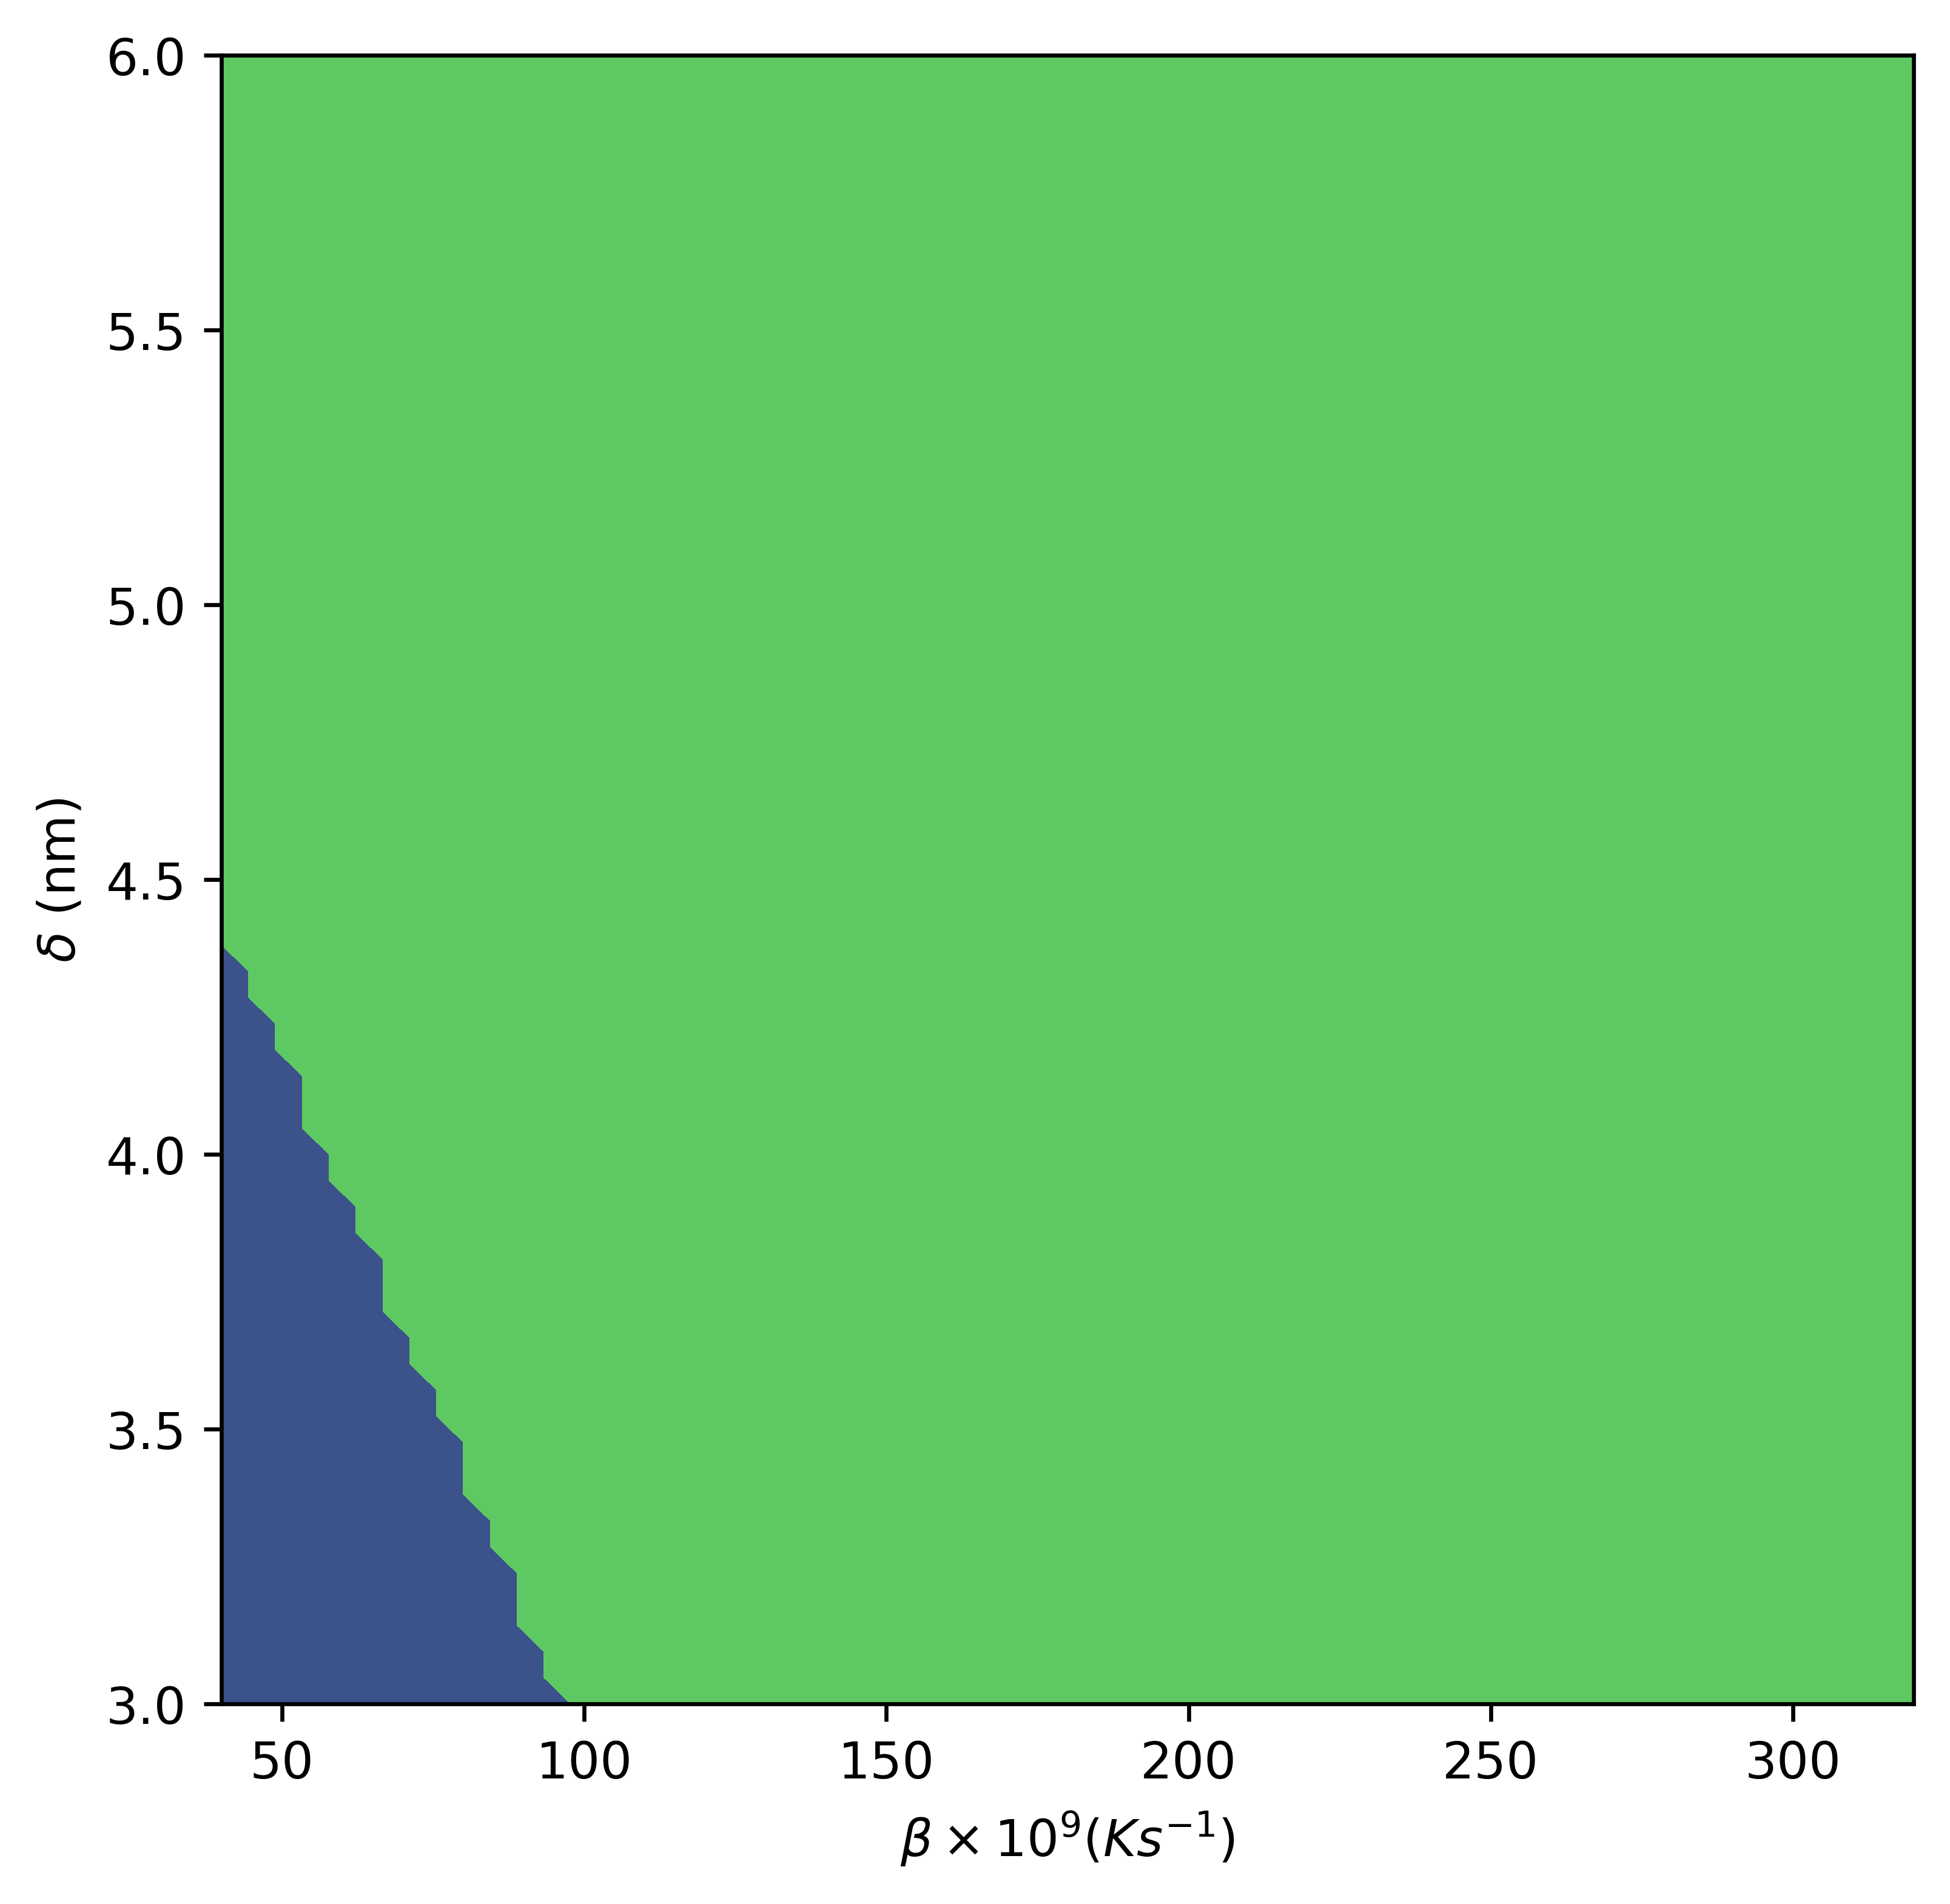

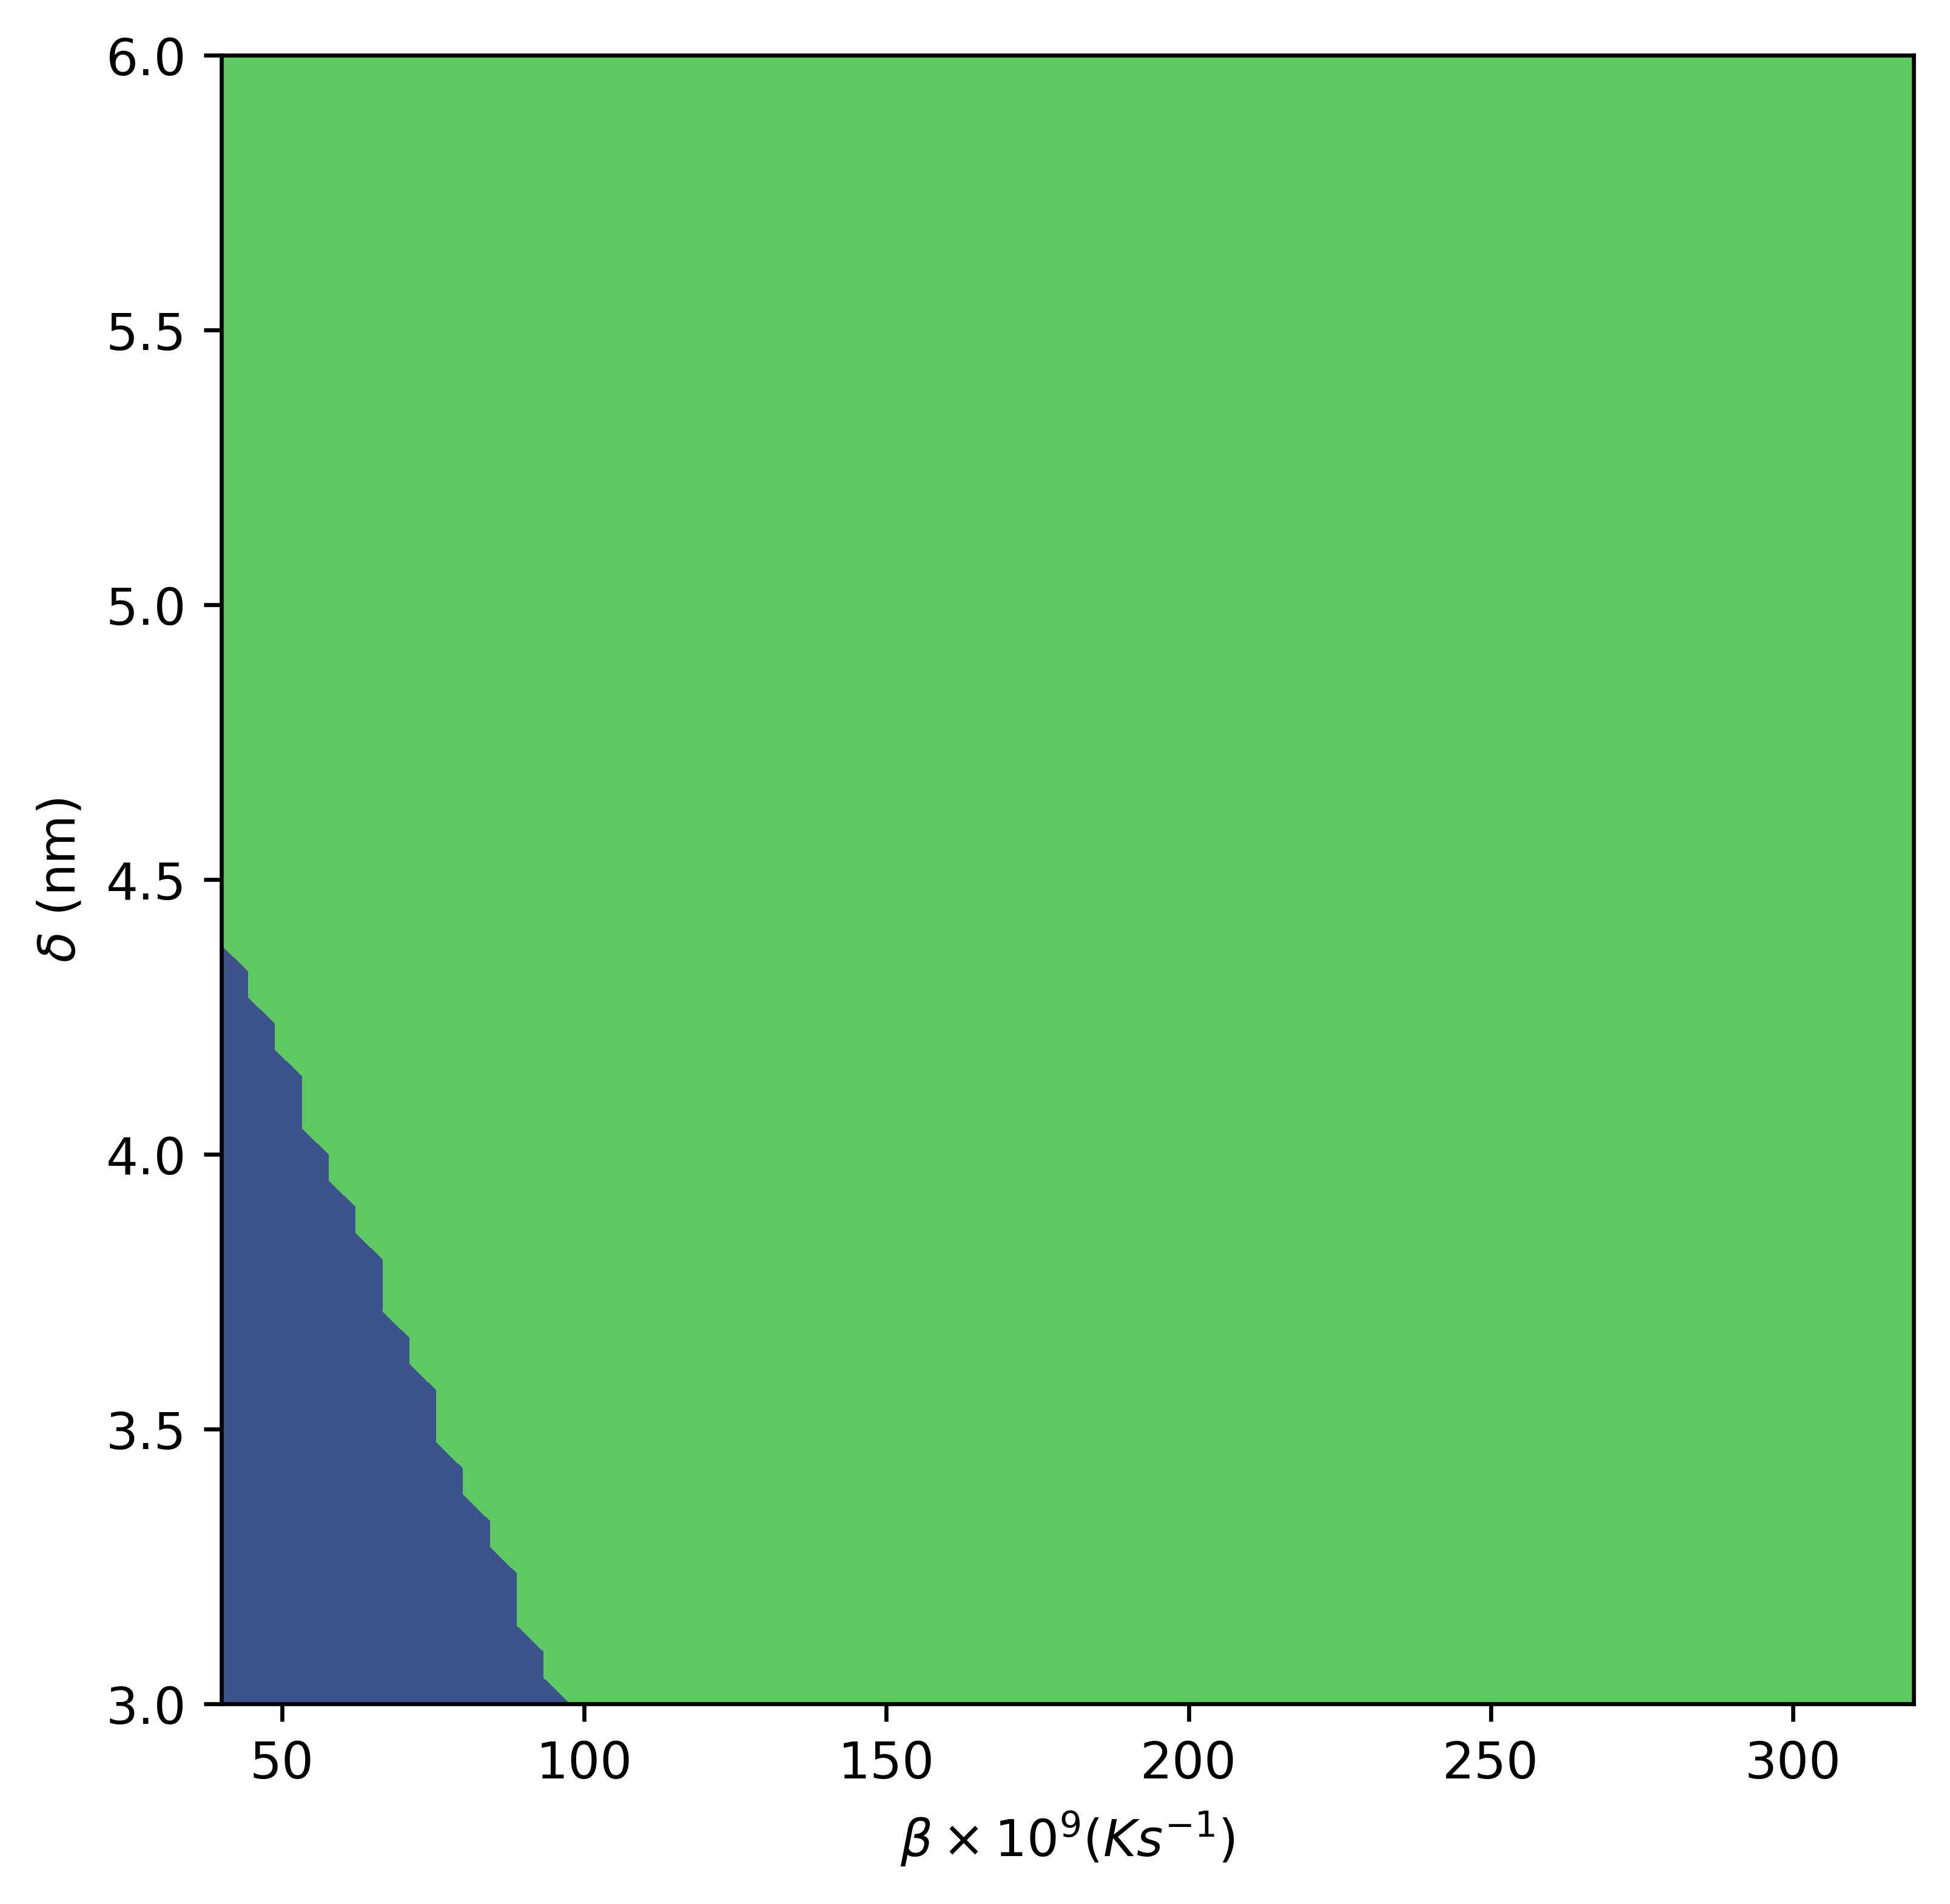

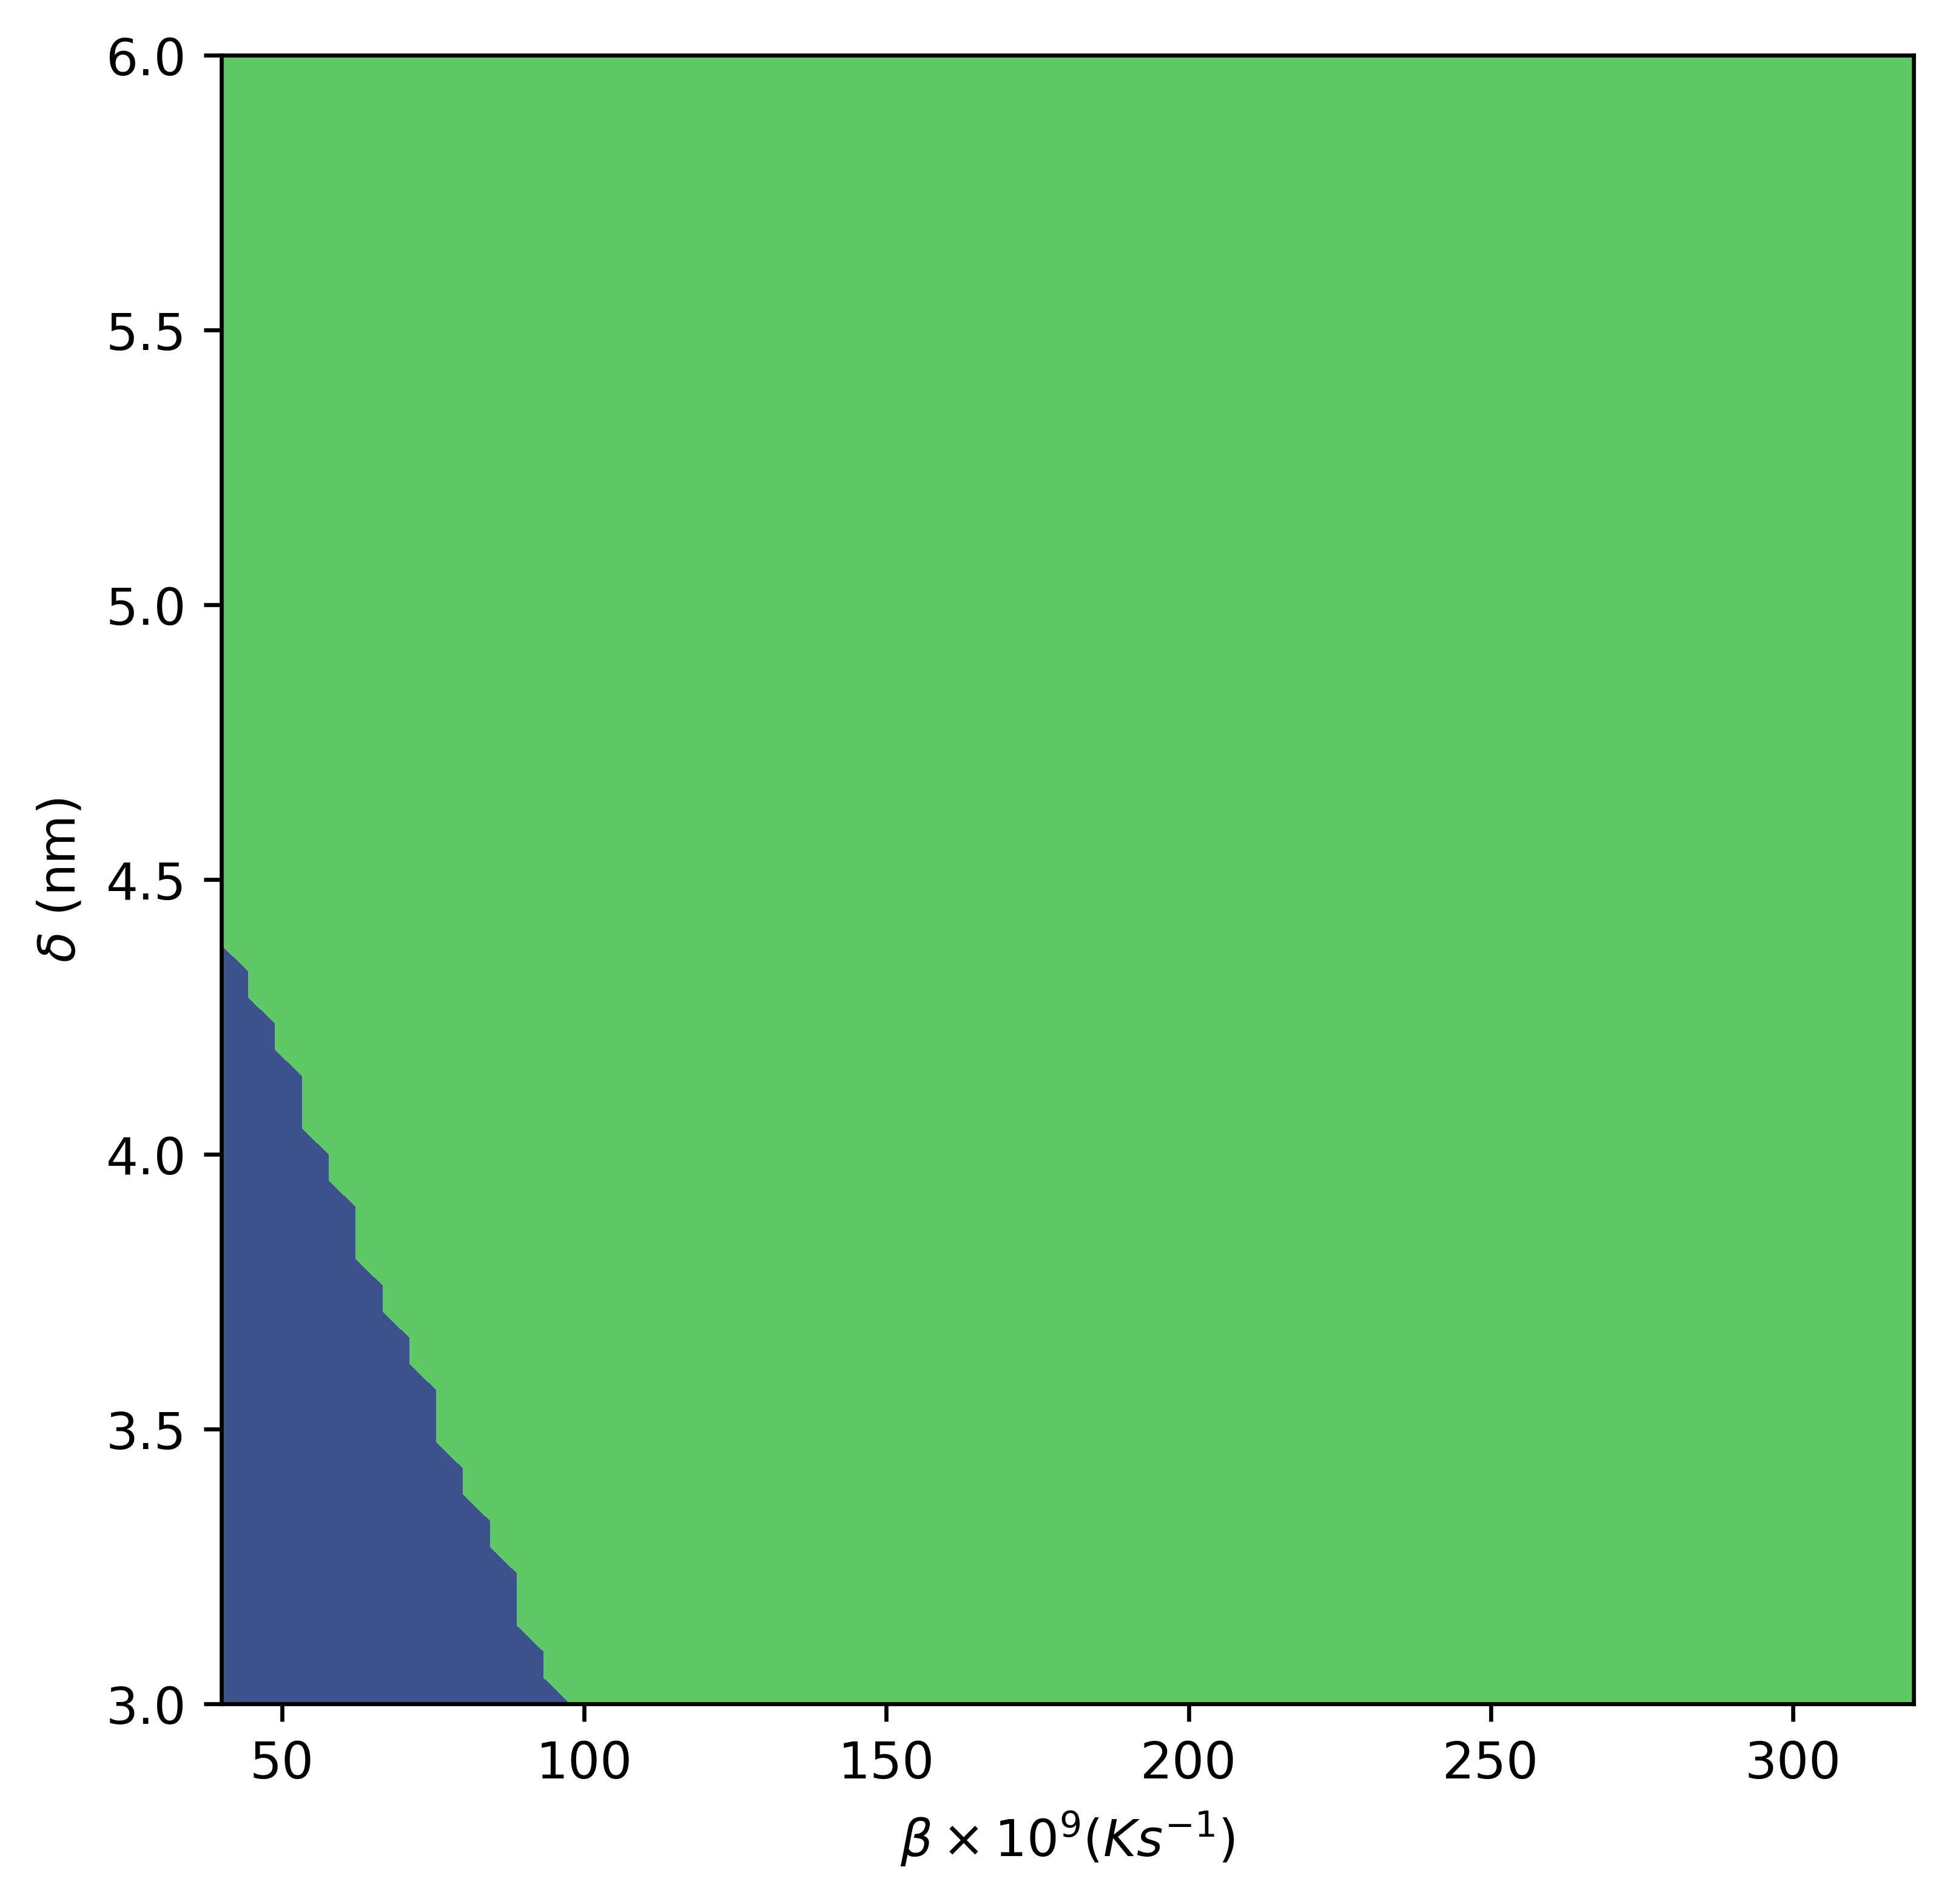

In [ ]:
for i in np.arange(0.5,4.5,0.5):
  pltNe = i
  pltX = X_grid[Ne_grid==pltNe].reshape(64,64)
  pltY = Y_grid[Ne_grid==pltNe].reshape(64,64)
  pltZ = logit_Z[Ne_grid==pltNe].reshape(64,64)
  image4 = plt.figure(figsize=(6,6), dpi = 600)
  cp = plt.contourf(pltX, pltY, pltZ,np.linspace(-1,1,3))
  #plt.colorbar(cp)
  plt.xlabel(r'$\beta \times 10^9 (Ks^{-1})$')
  plt.ylabel(r'$\delta$ (nm)')
  plt.show()
  image4.savefig('/content/drive/MyDrive/Rice Google Drive/Research/Misc/Leidenfrost_ML/Figures/classif_Ne='+str(pltNe)+'.png',  bbox_inches="tight")

**ANN**

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.models import load_model
from sklearn.metrics import r2_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
new_model = load_model('/content/drive/MyDrive/Rice Google Drive/Research/Misc/wall_ML_neural/model.h5')

**Model Checking**

In [ ]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/Rice Google Drive/Research/Misc/nasim_ML.csv', sep = ',')
raw_dataset.dropna(inplace=True)
Y = raw_dataset.iloc[:,3:5]
X = raw_dataset.iloc[:,0:3]

In [ ]:
scaler_X = scaler.fit(X)
Z = new_model.predict(scaler_X.transform(X))

In [ ]:
scaler_Y = scaler.fit(Y)
Z = scaler_Y.inverse_transform(Z)

0.97172195667889

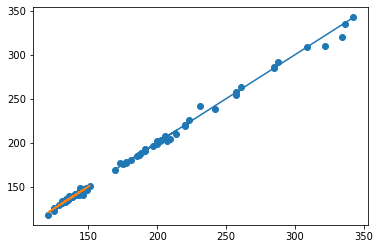

In [ ]:
plt.scatter(Y,Z)
plt.plot(Y,Y)
r2_score(Y, Z)

**Main work**

In [ ]:
sum(sum(sum(logit_Z)))

247299

In [ ]:
logit_Z[logit_Z==0].shape

(14845,)

**Back to main work**

In [ ]:
scaler_X_grid = scaler.fit(X_grid_df)
scaled_X_grid = scaler_X_grid.transform(X_grid_df)

In [ ]:
scaled_Z = new_model.predict(scaled_X_grid)

In [ ]:
scaler_Y = scaler.fit(Y)
Z = scaler_Y.inverse_transform(scaled_Z)

In [ ]:
Z_wall = Z[:,0].reshape(X_grid.shape)

In [ ]:
Z_liquid = Z[:,1].reshape(X_grid.shape)

In [ ]:
np.linspace(0.25,0.25,64)

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

In [ ]:
pltNe = 0.5
pltX = X_grid[Ne_grid==pltNe].reshape(64,64)
pltY = Y_grid[Ne_grid==pltNe].reshape(64,64)

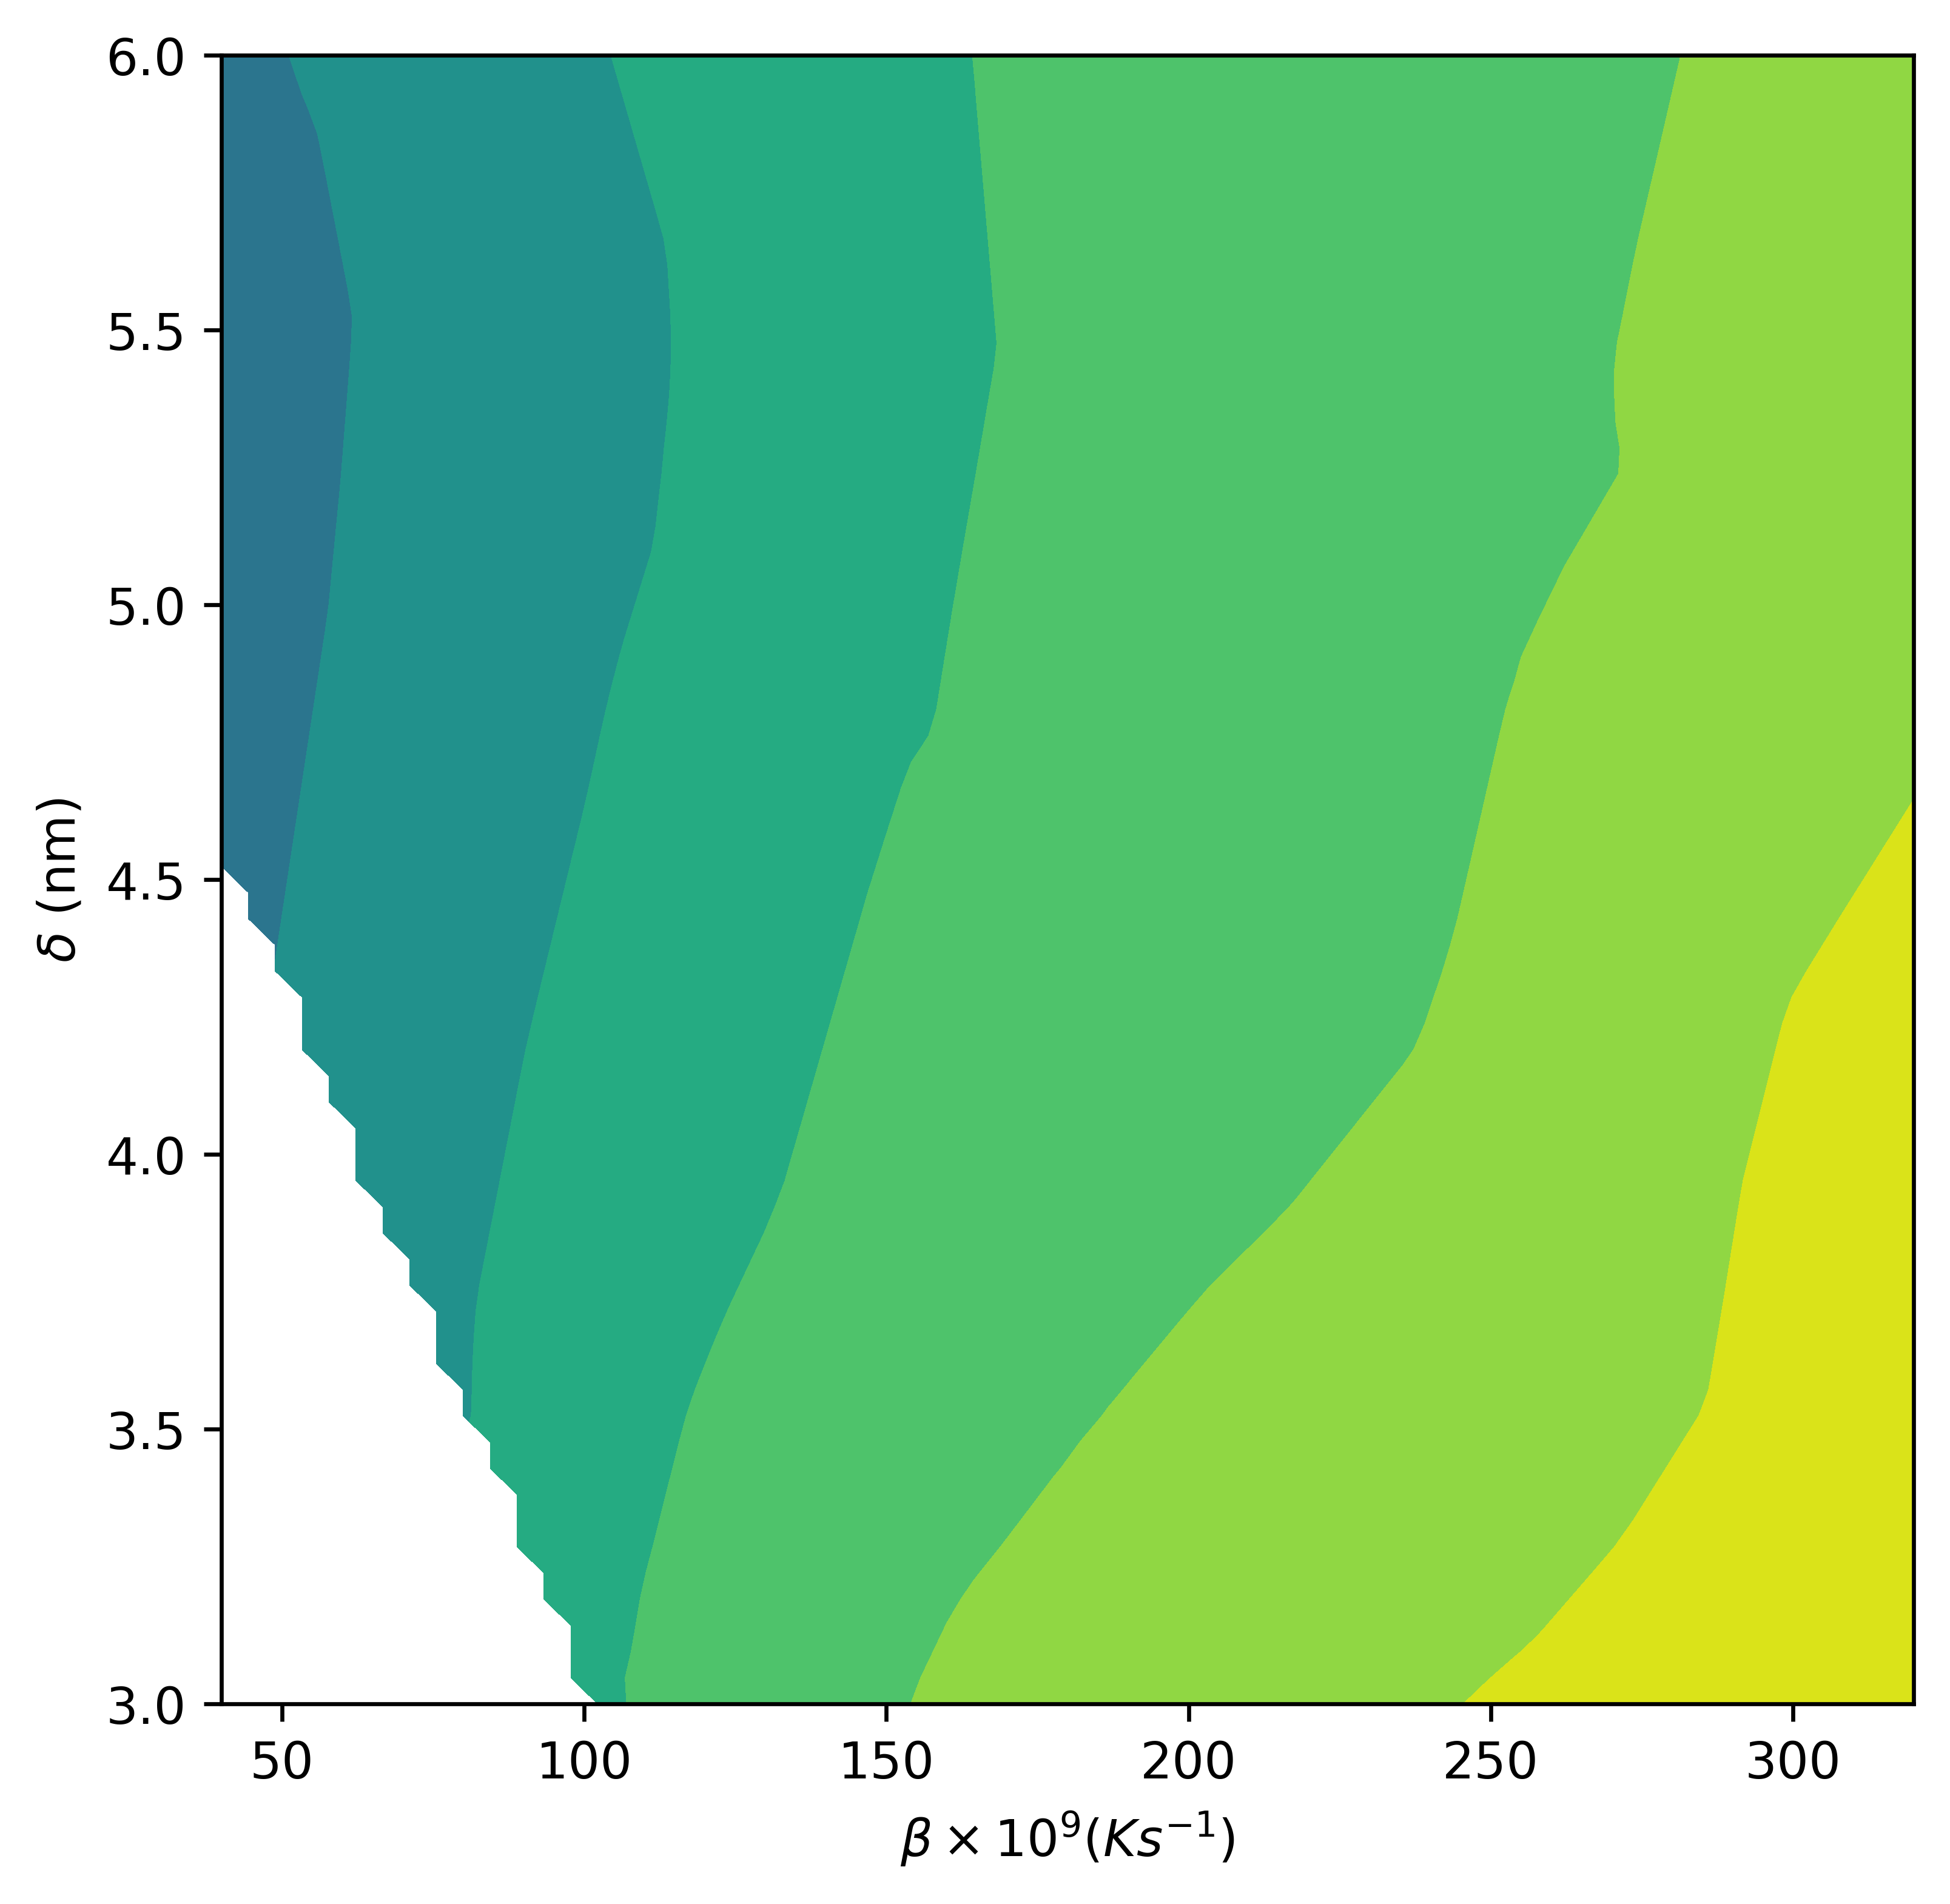

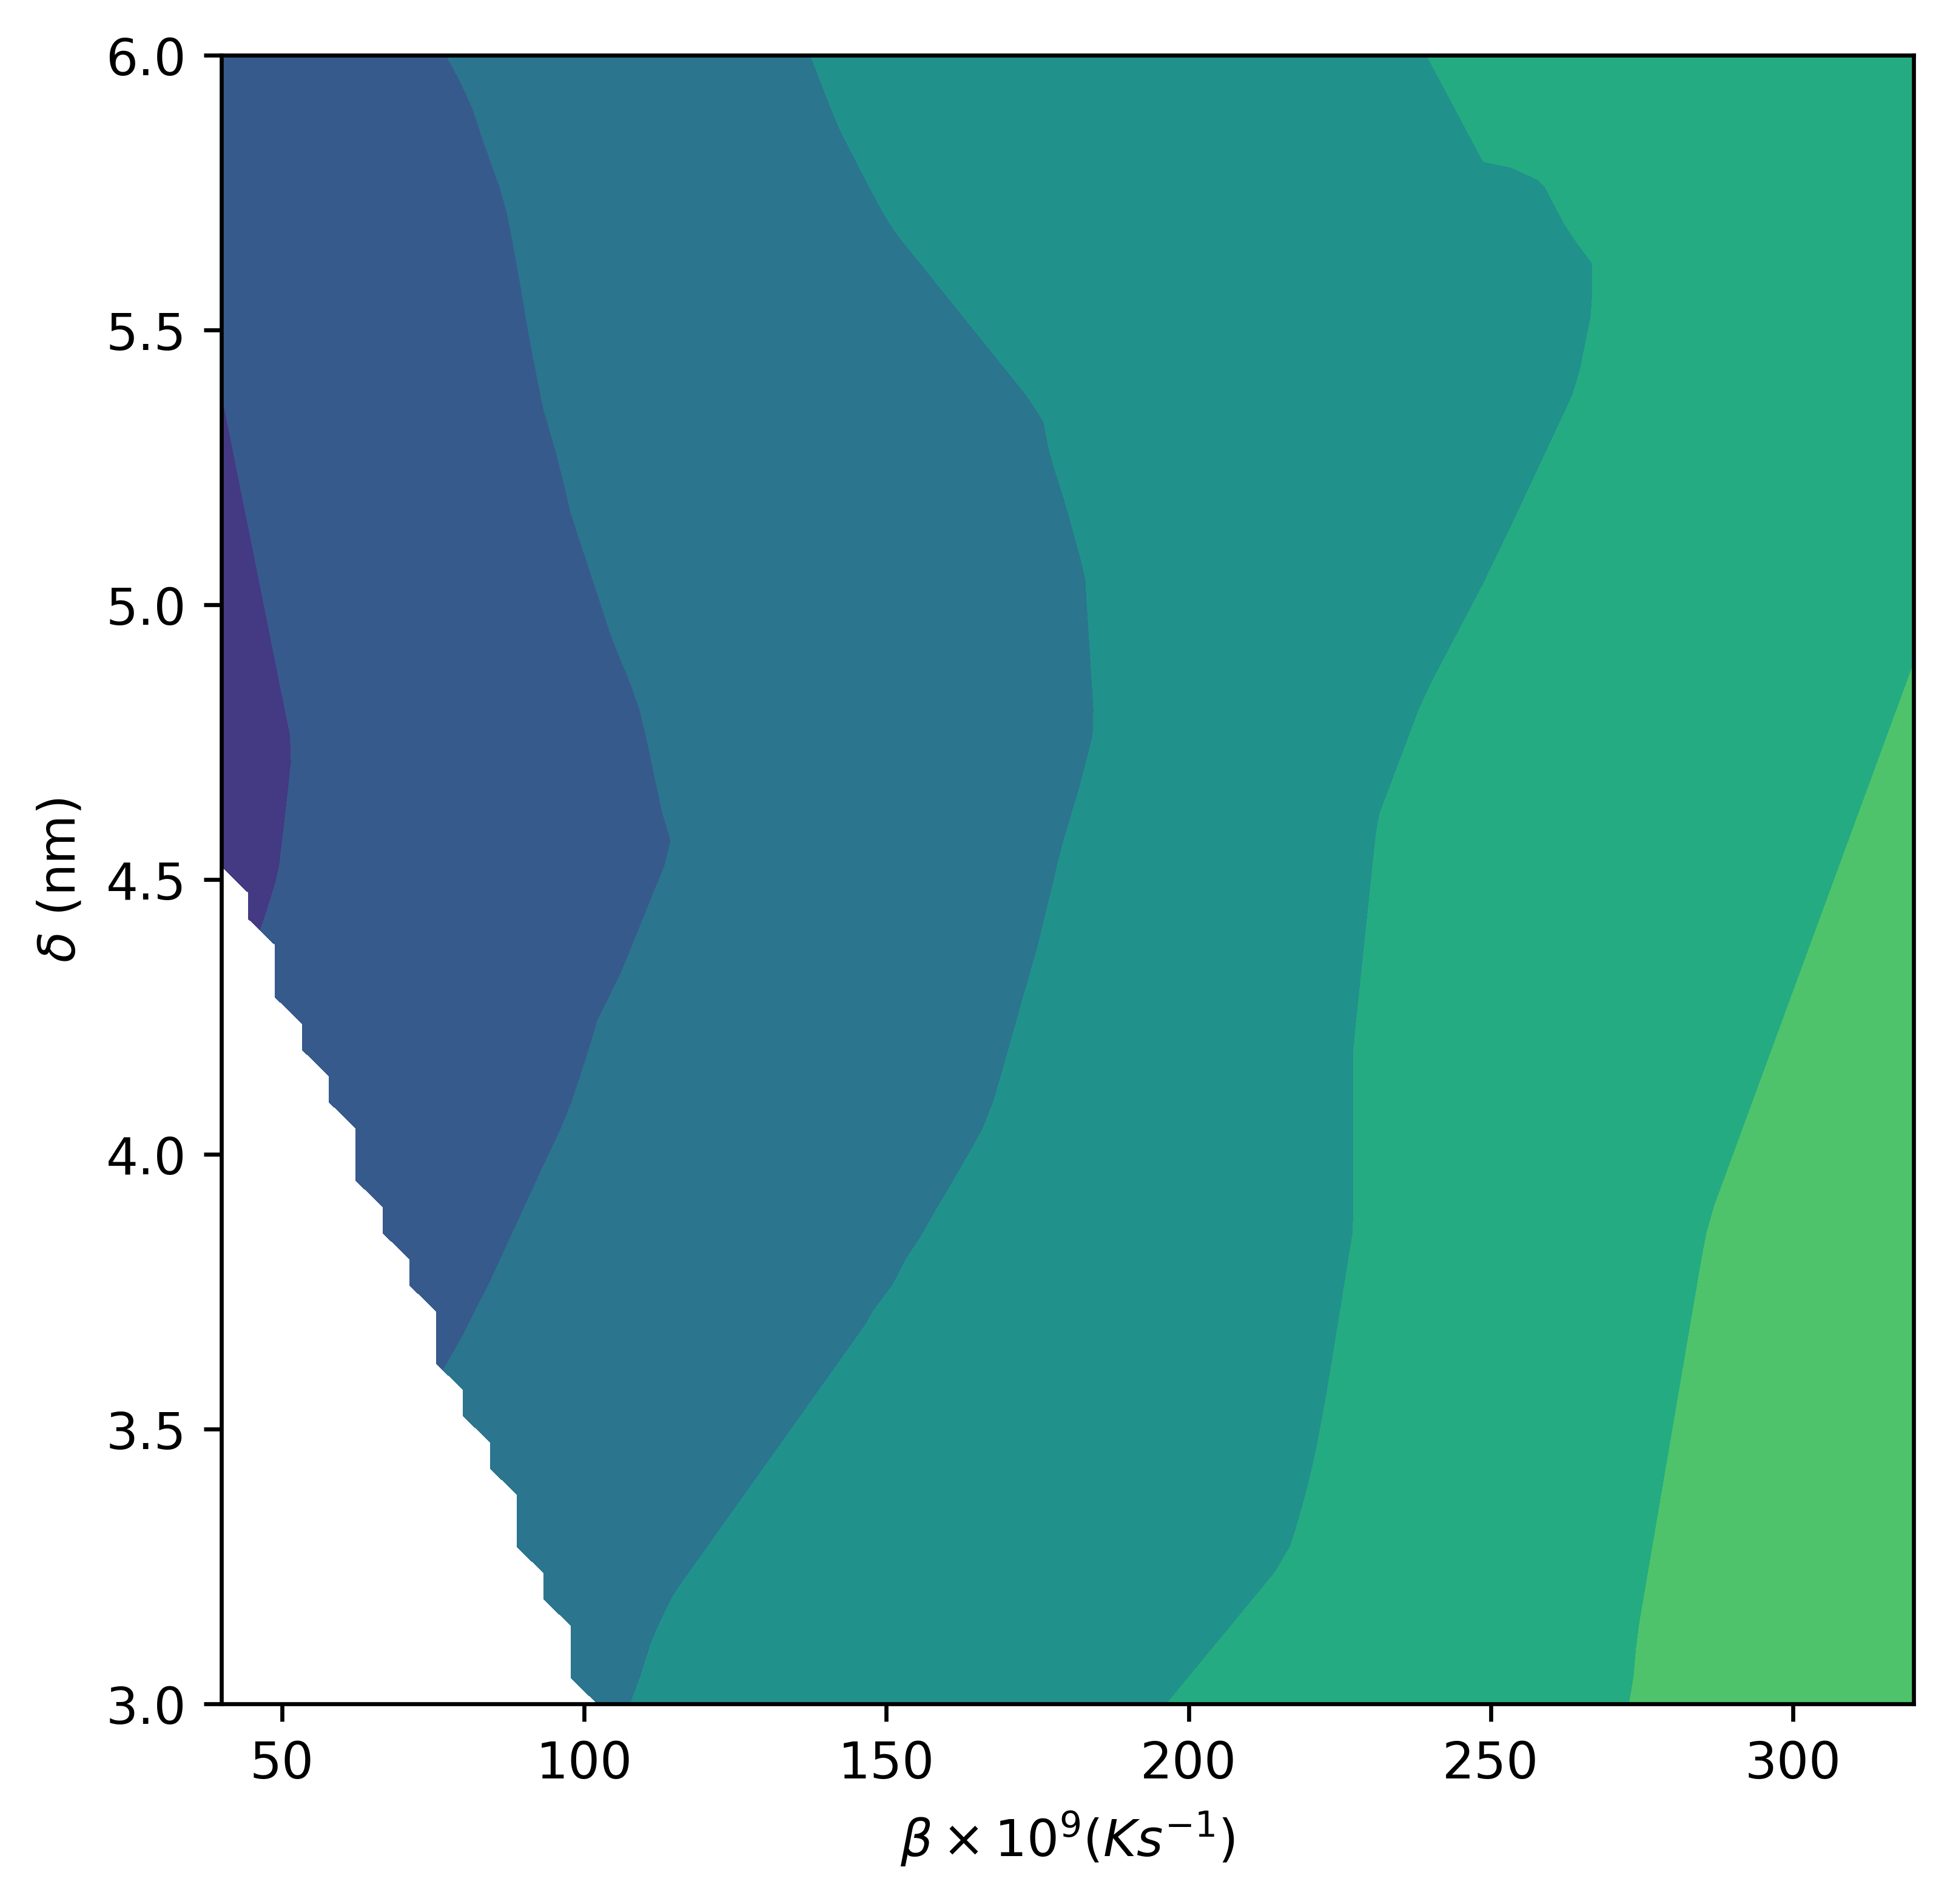

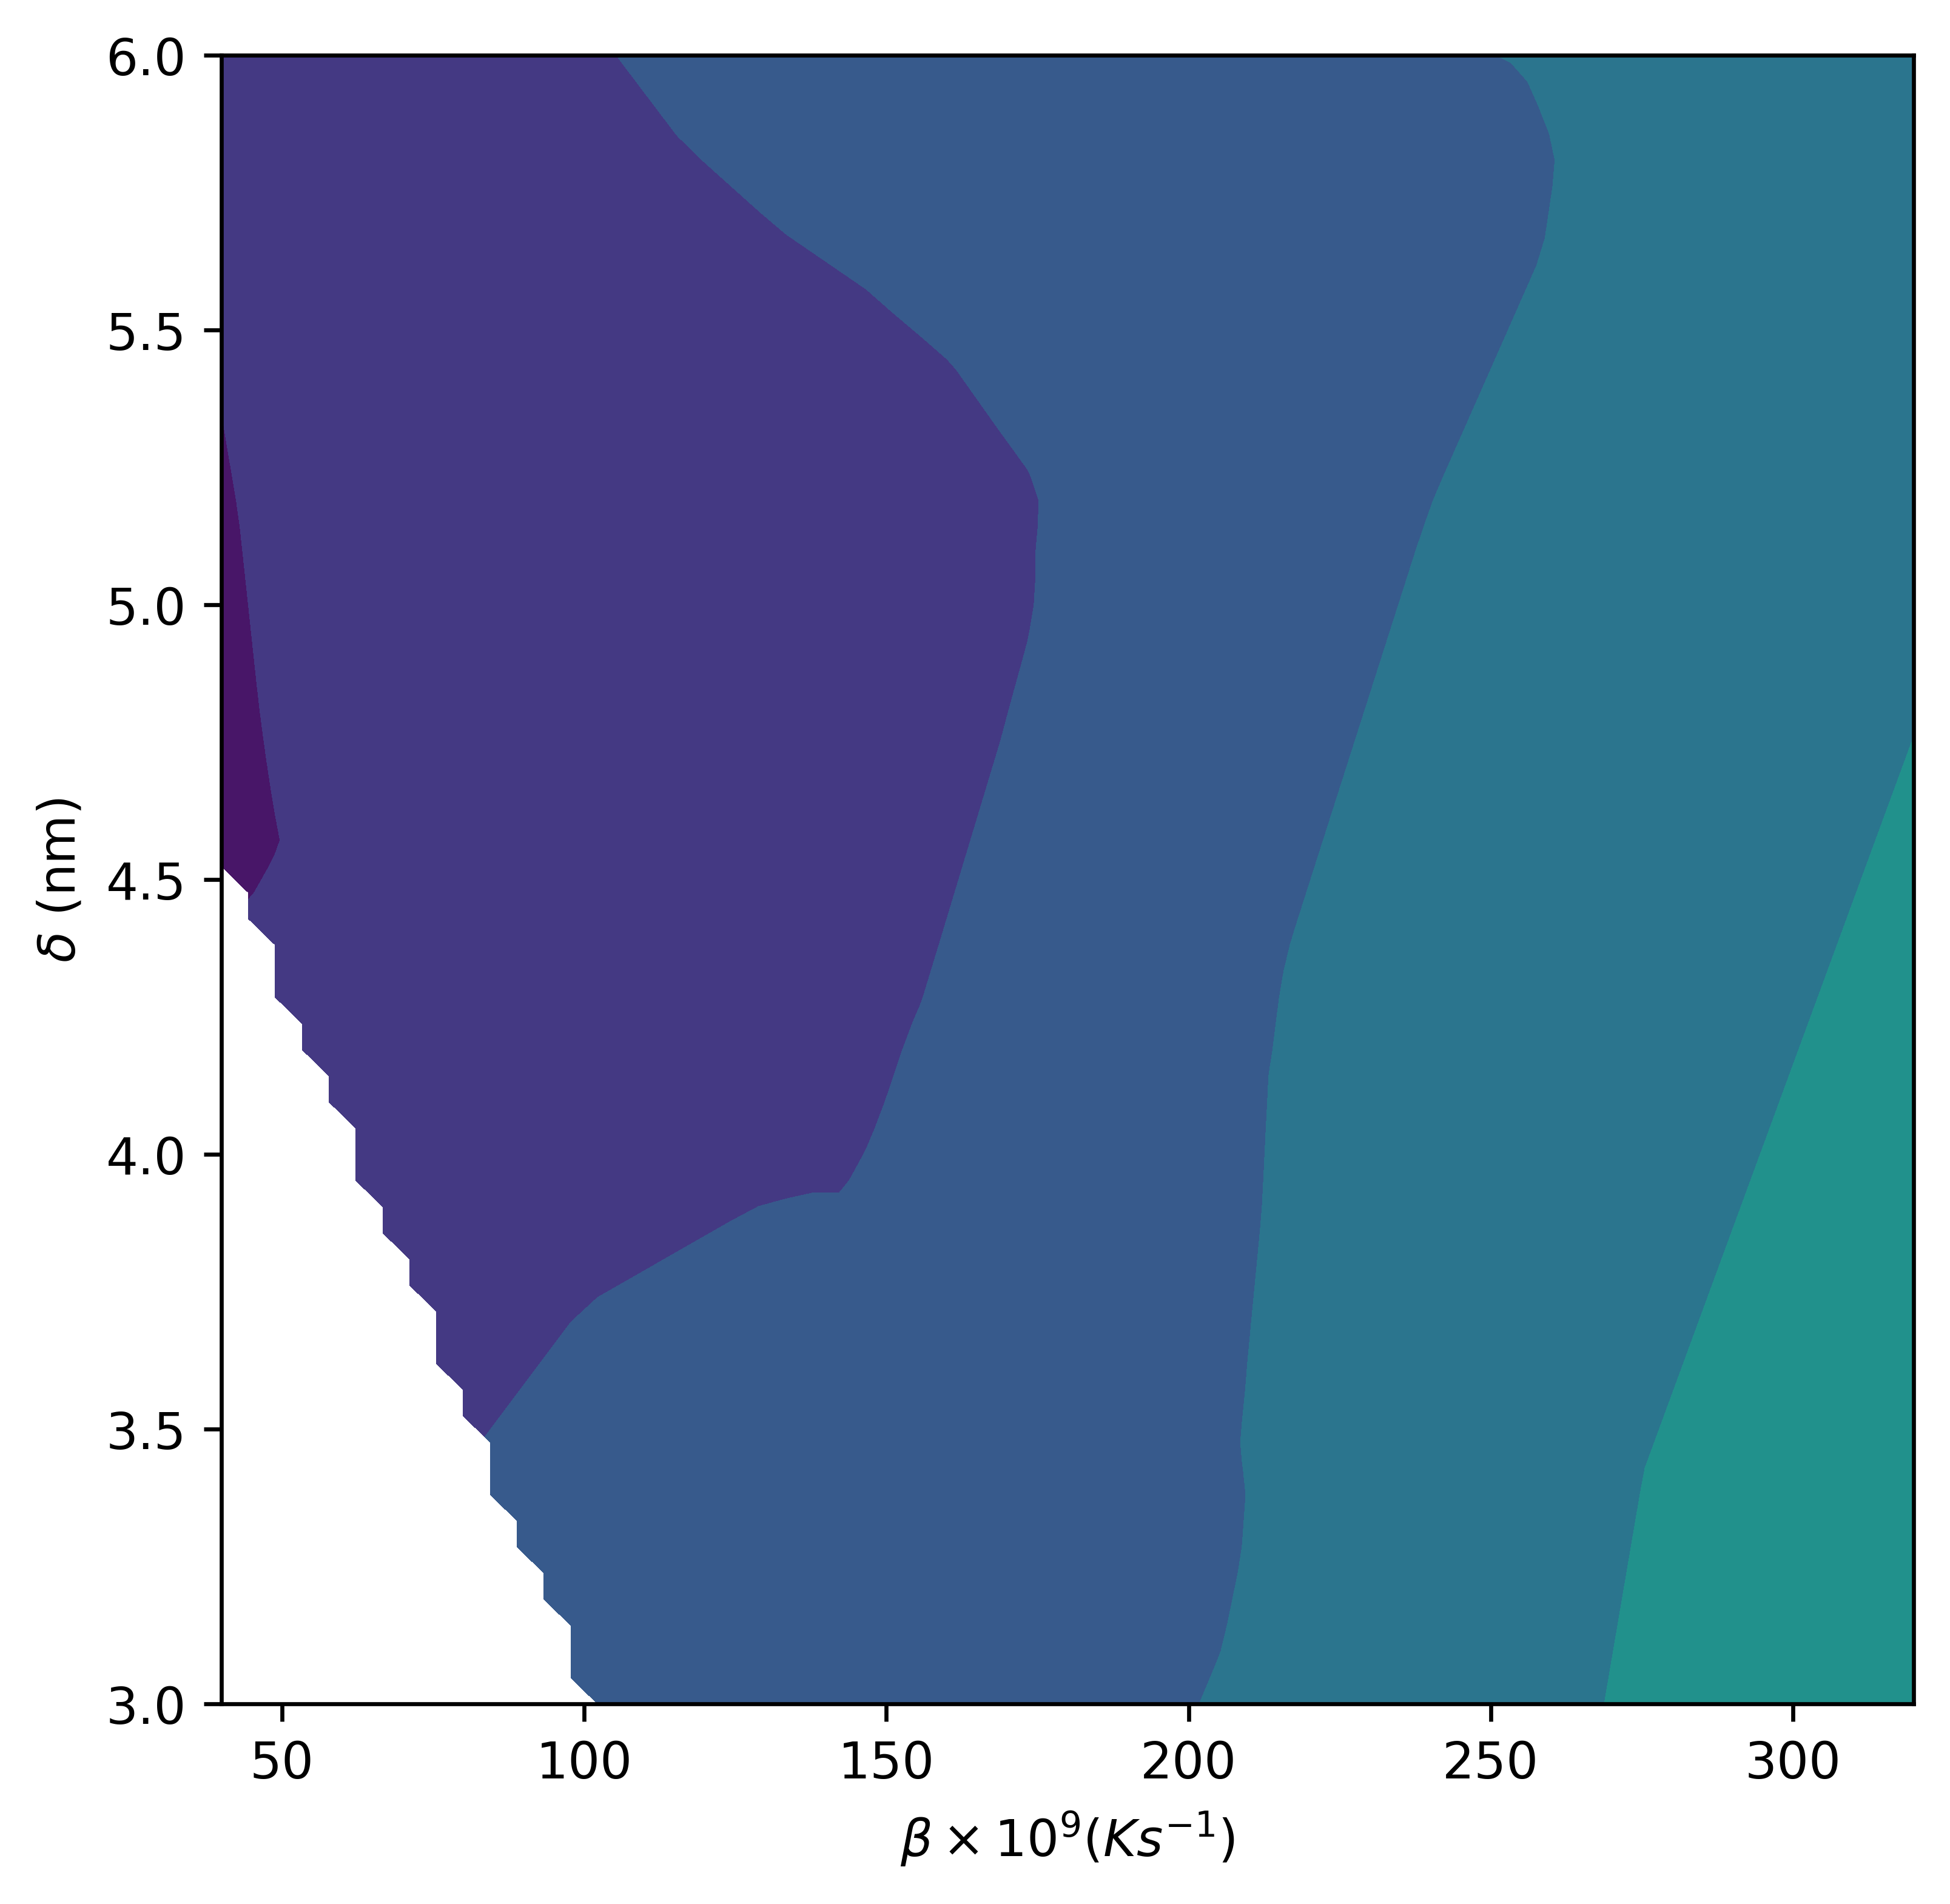

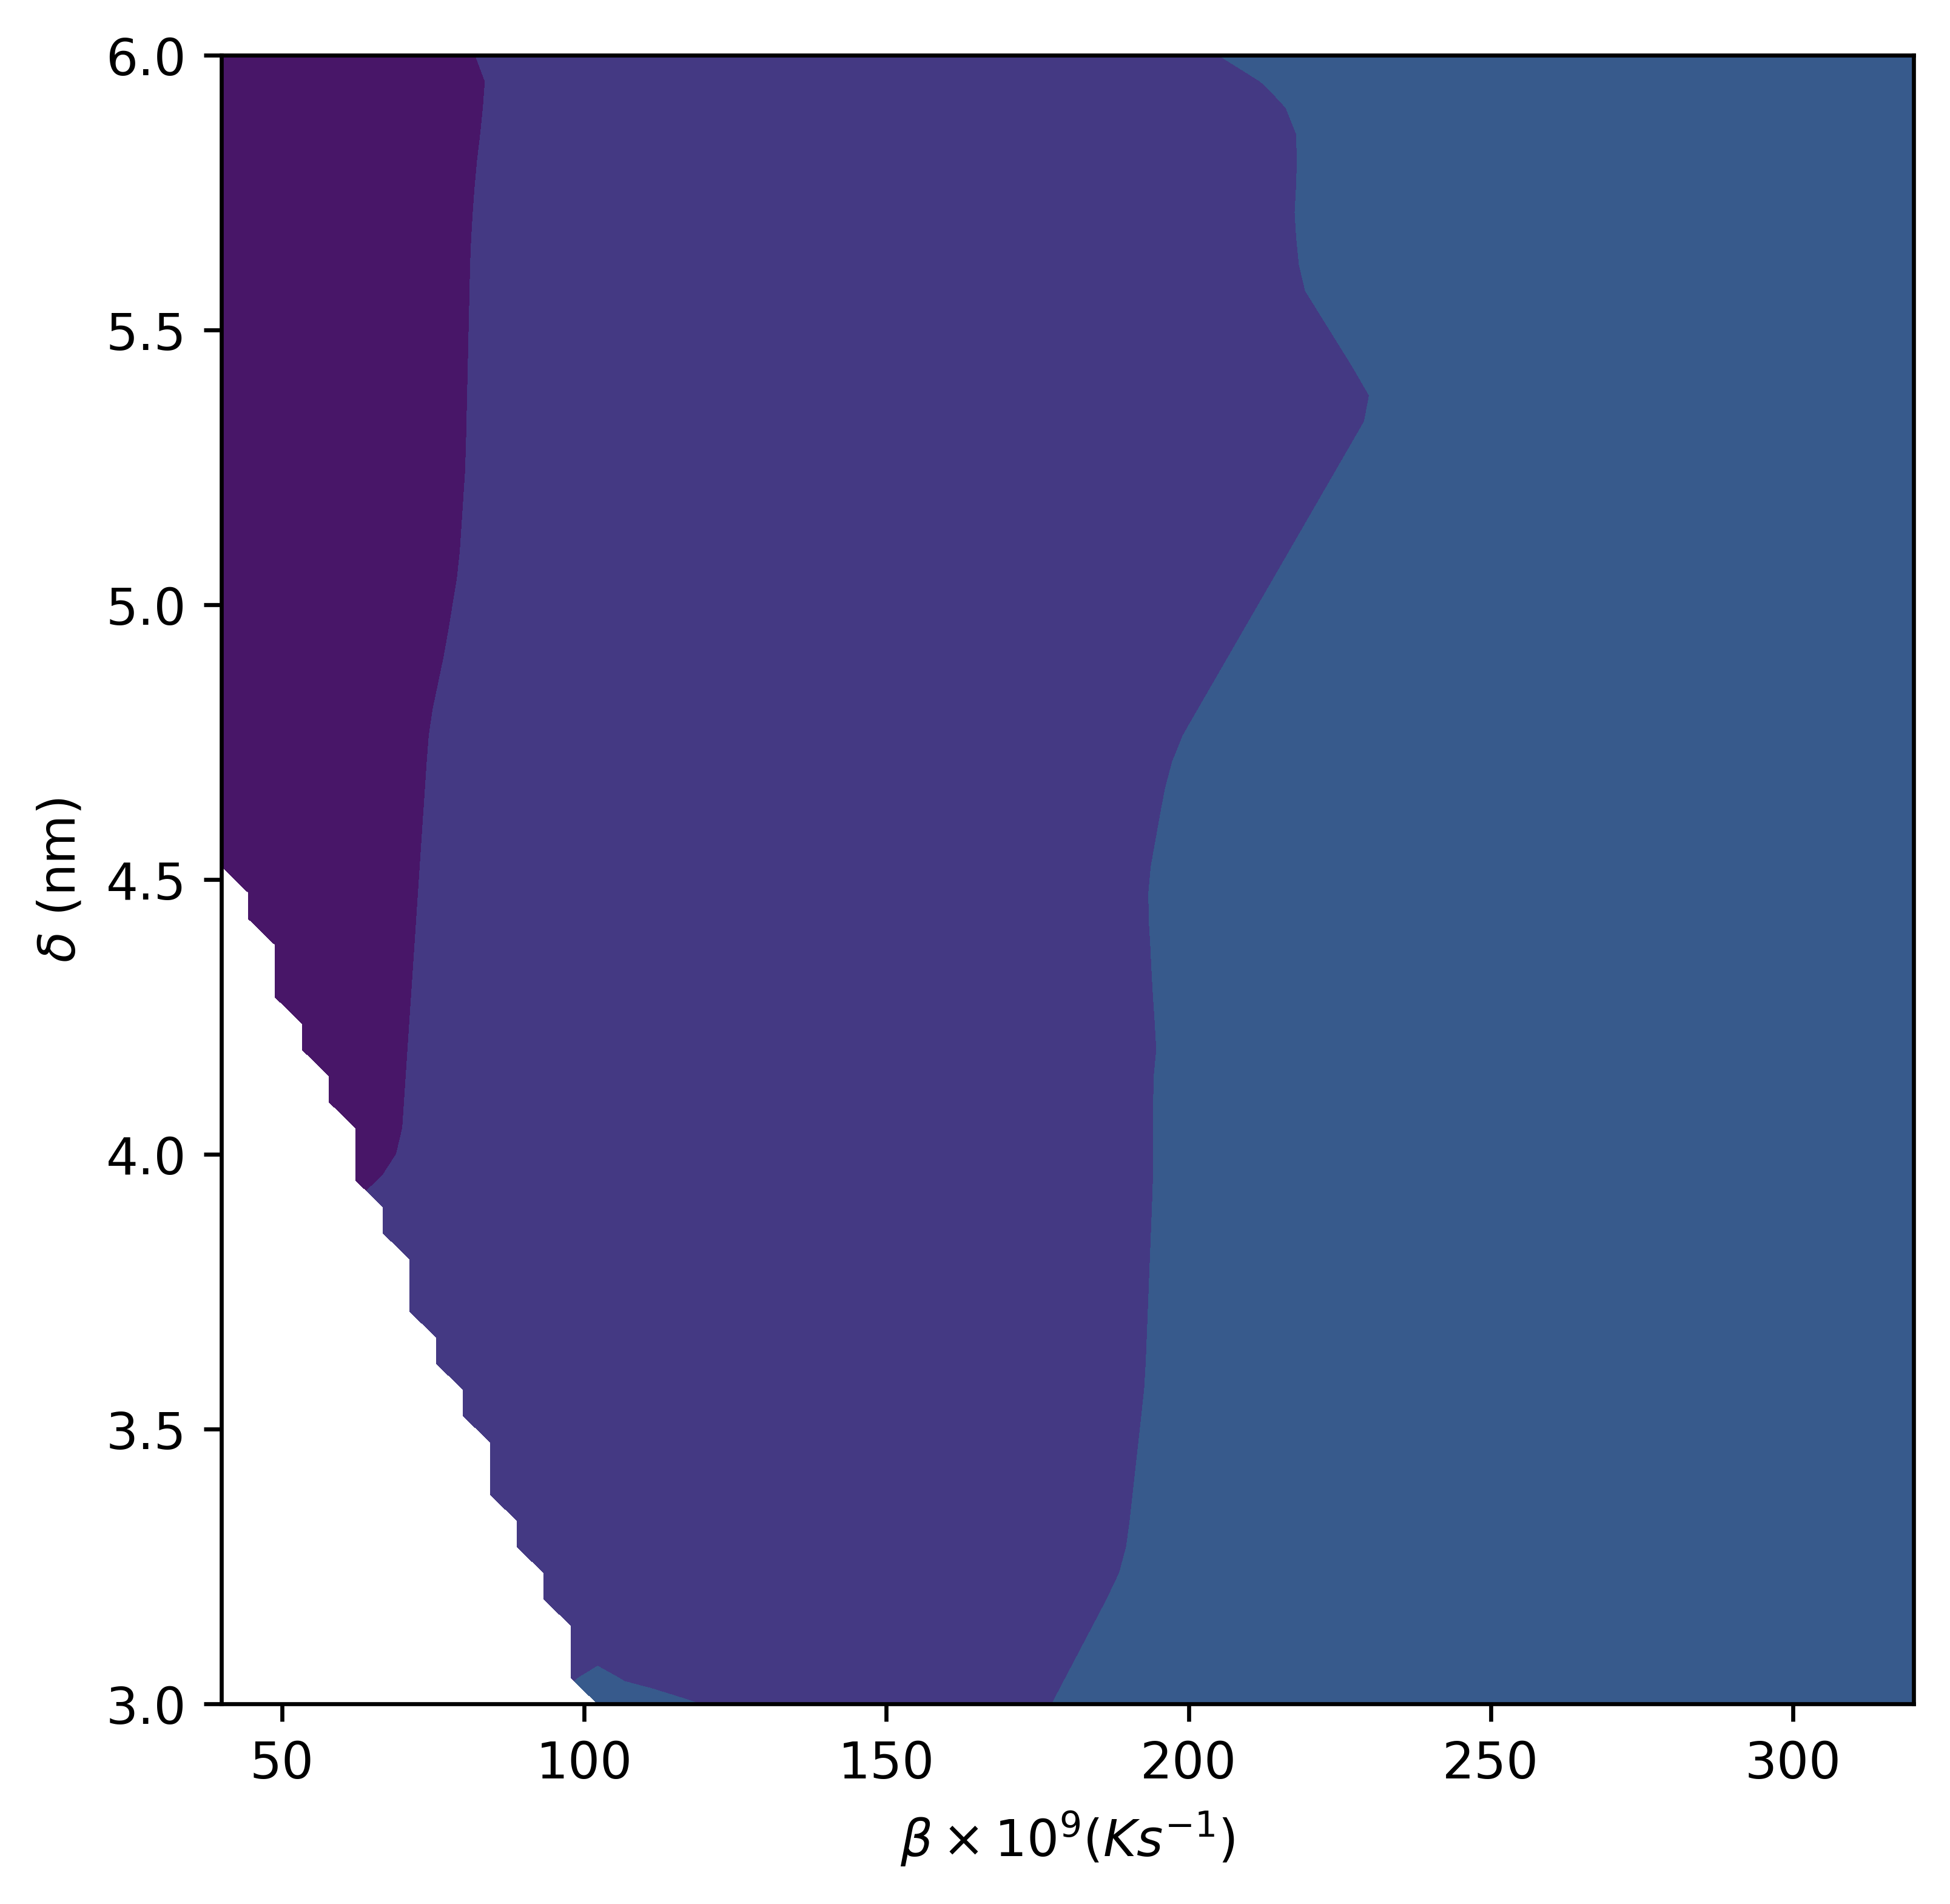

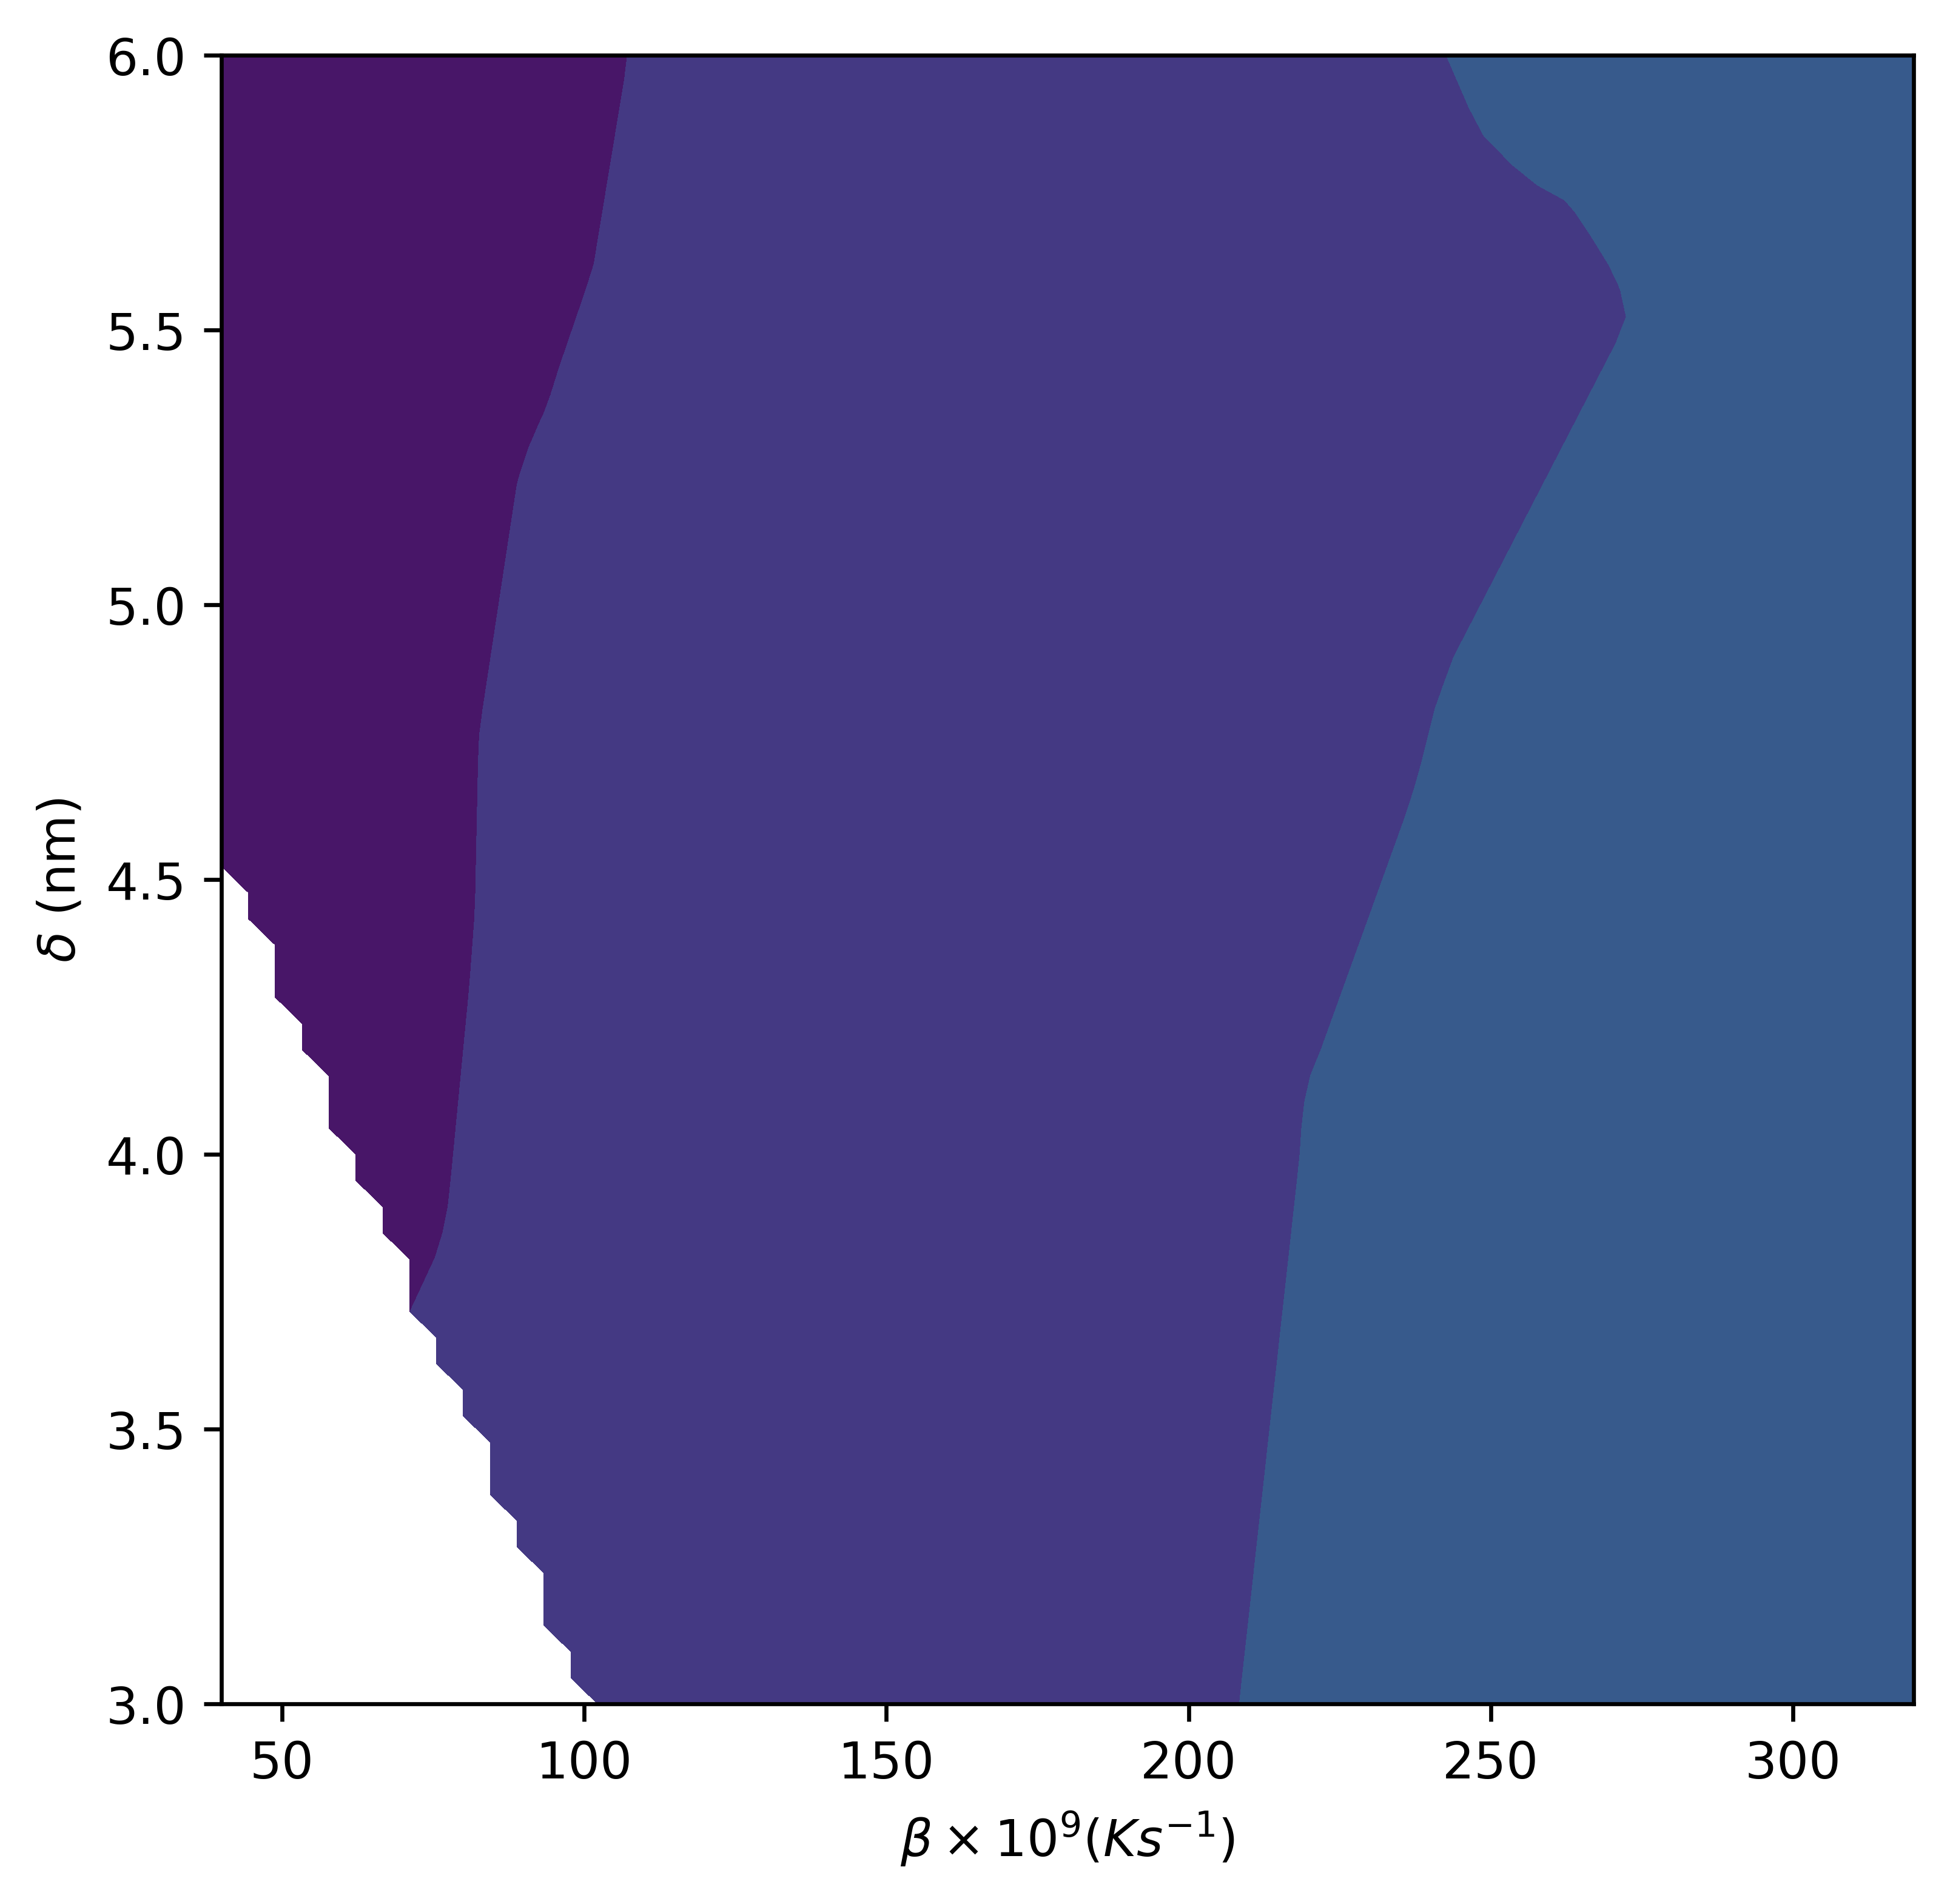

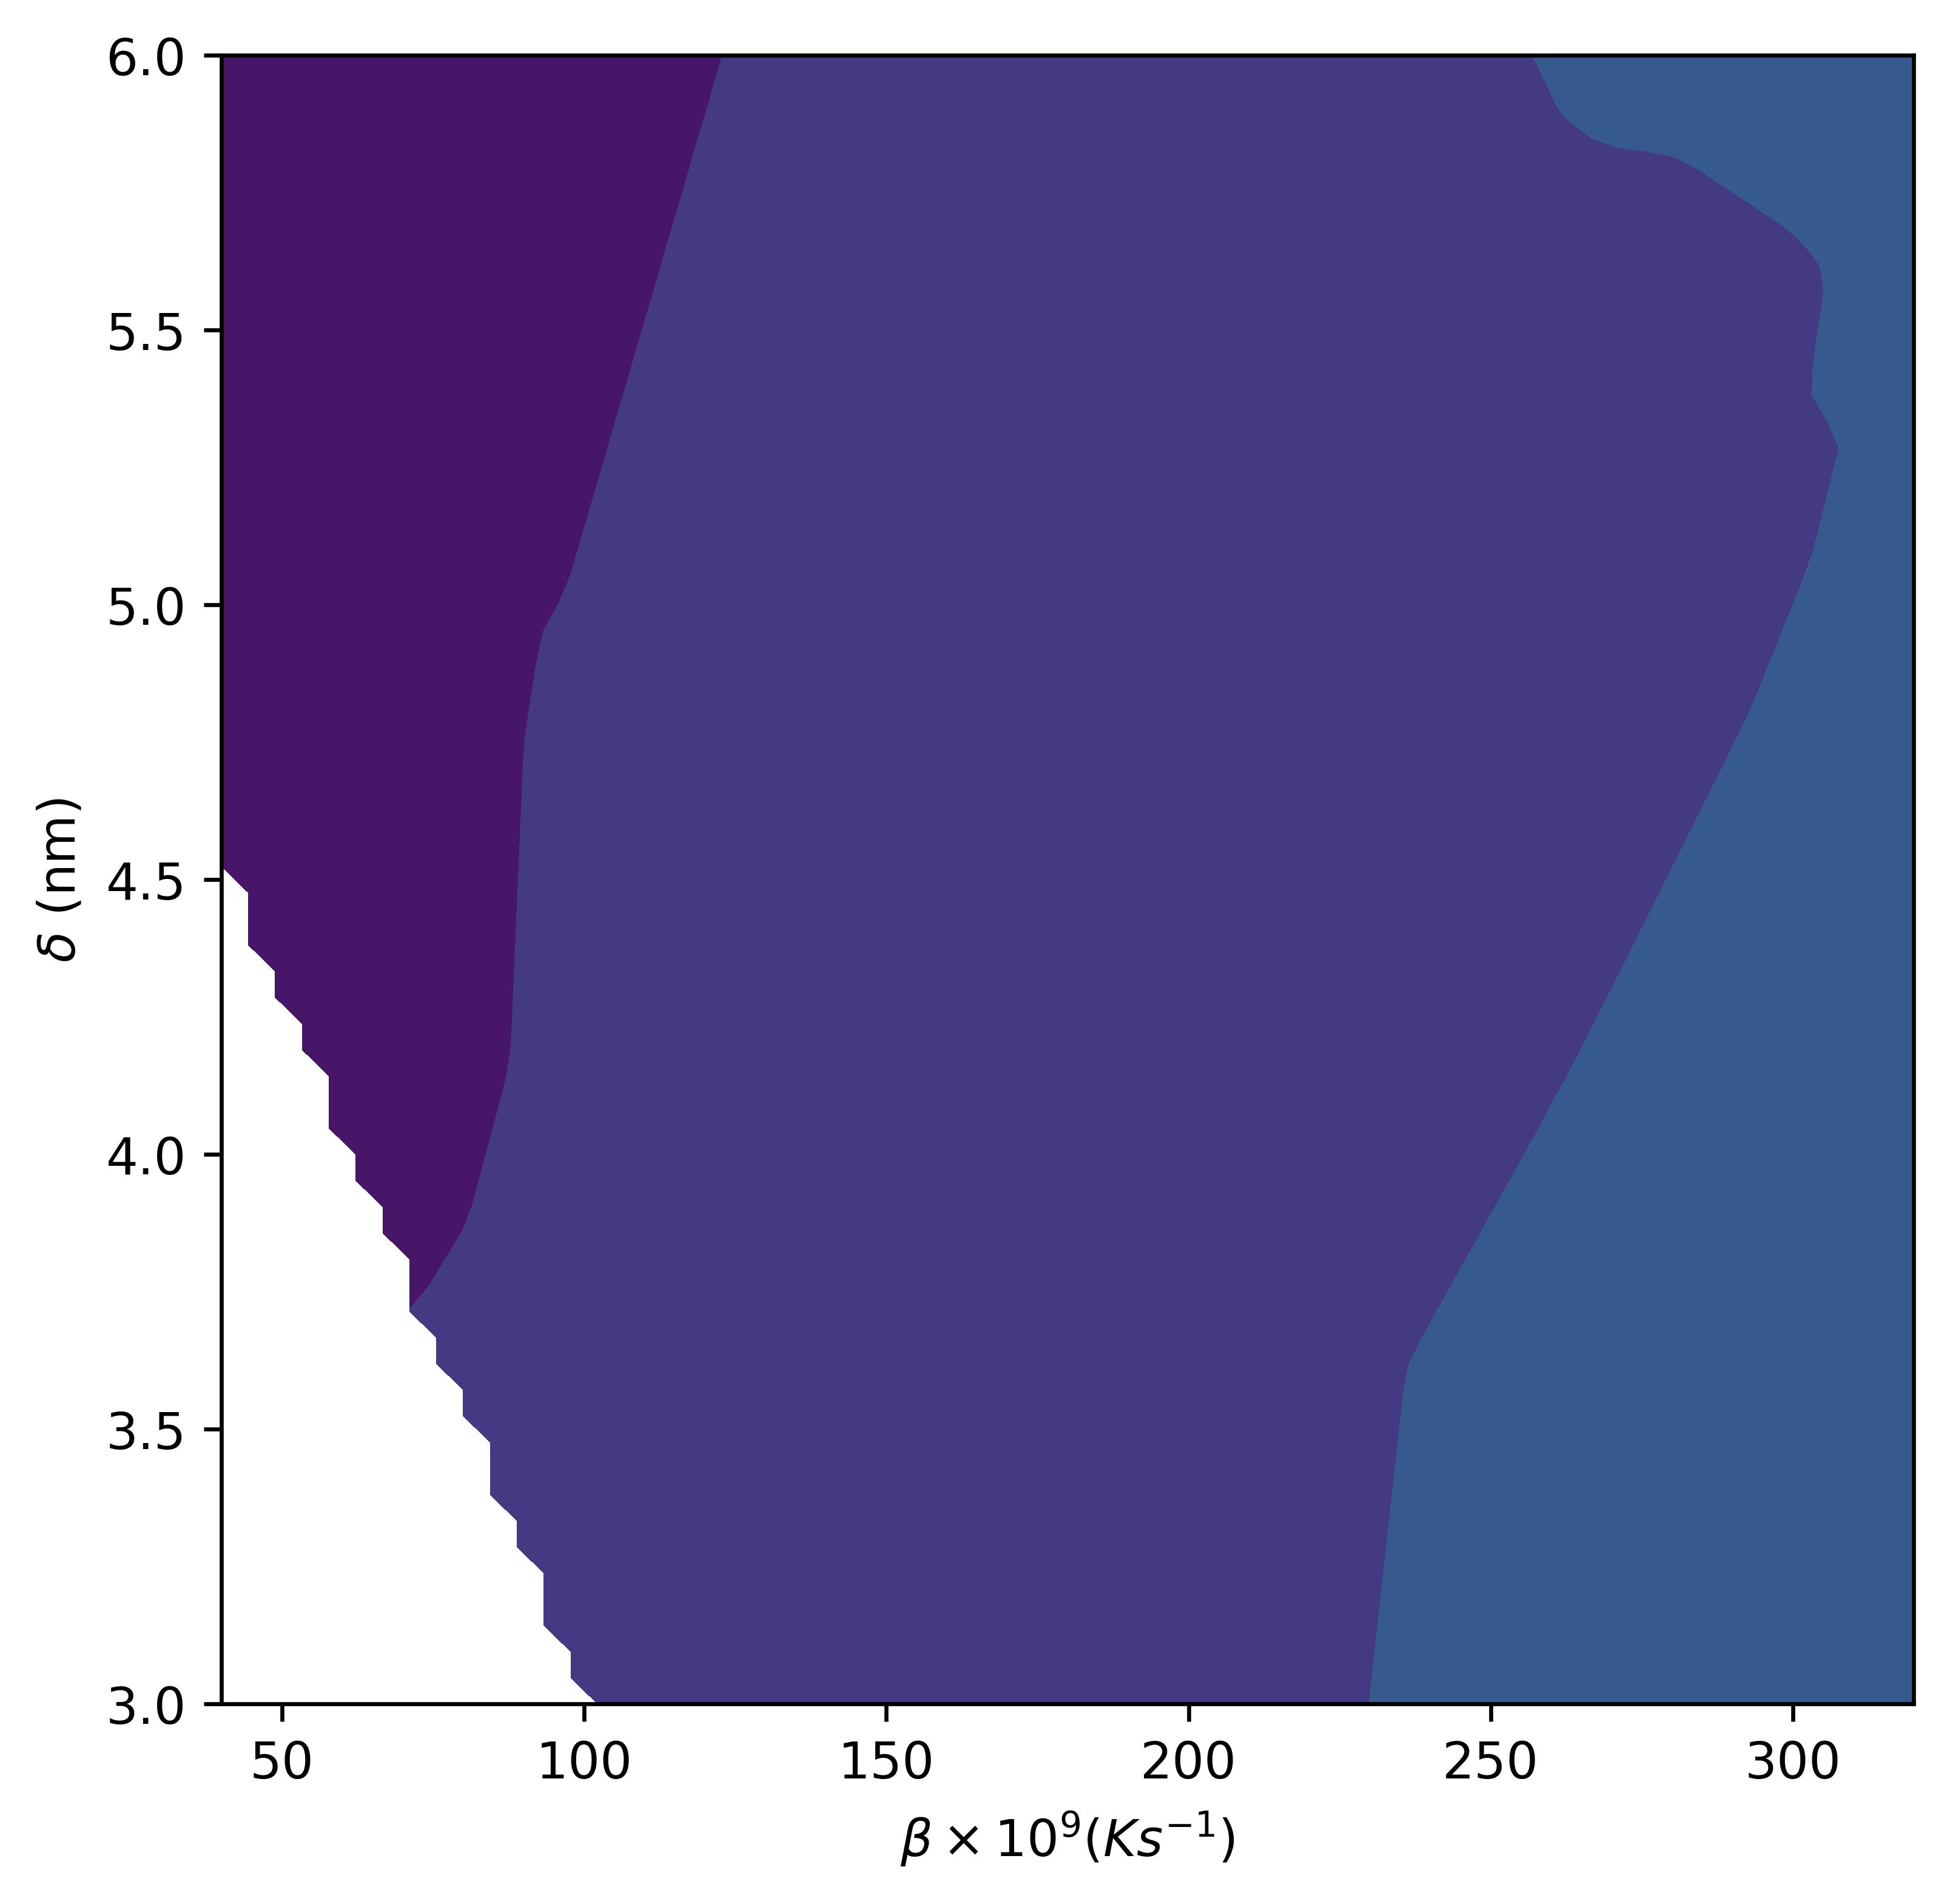

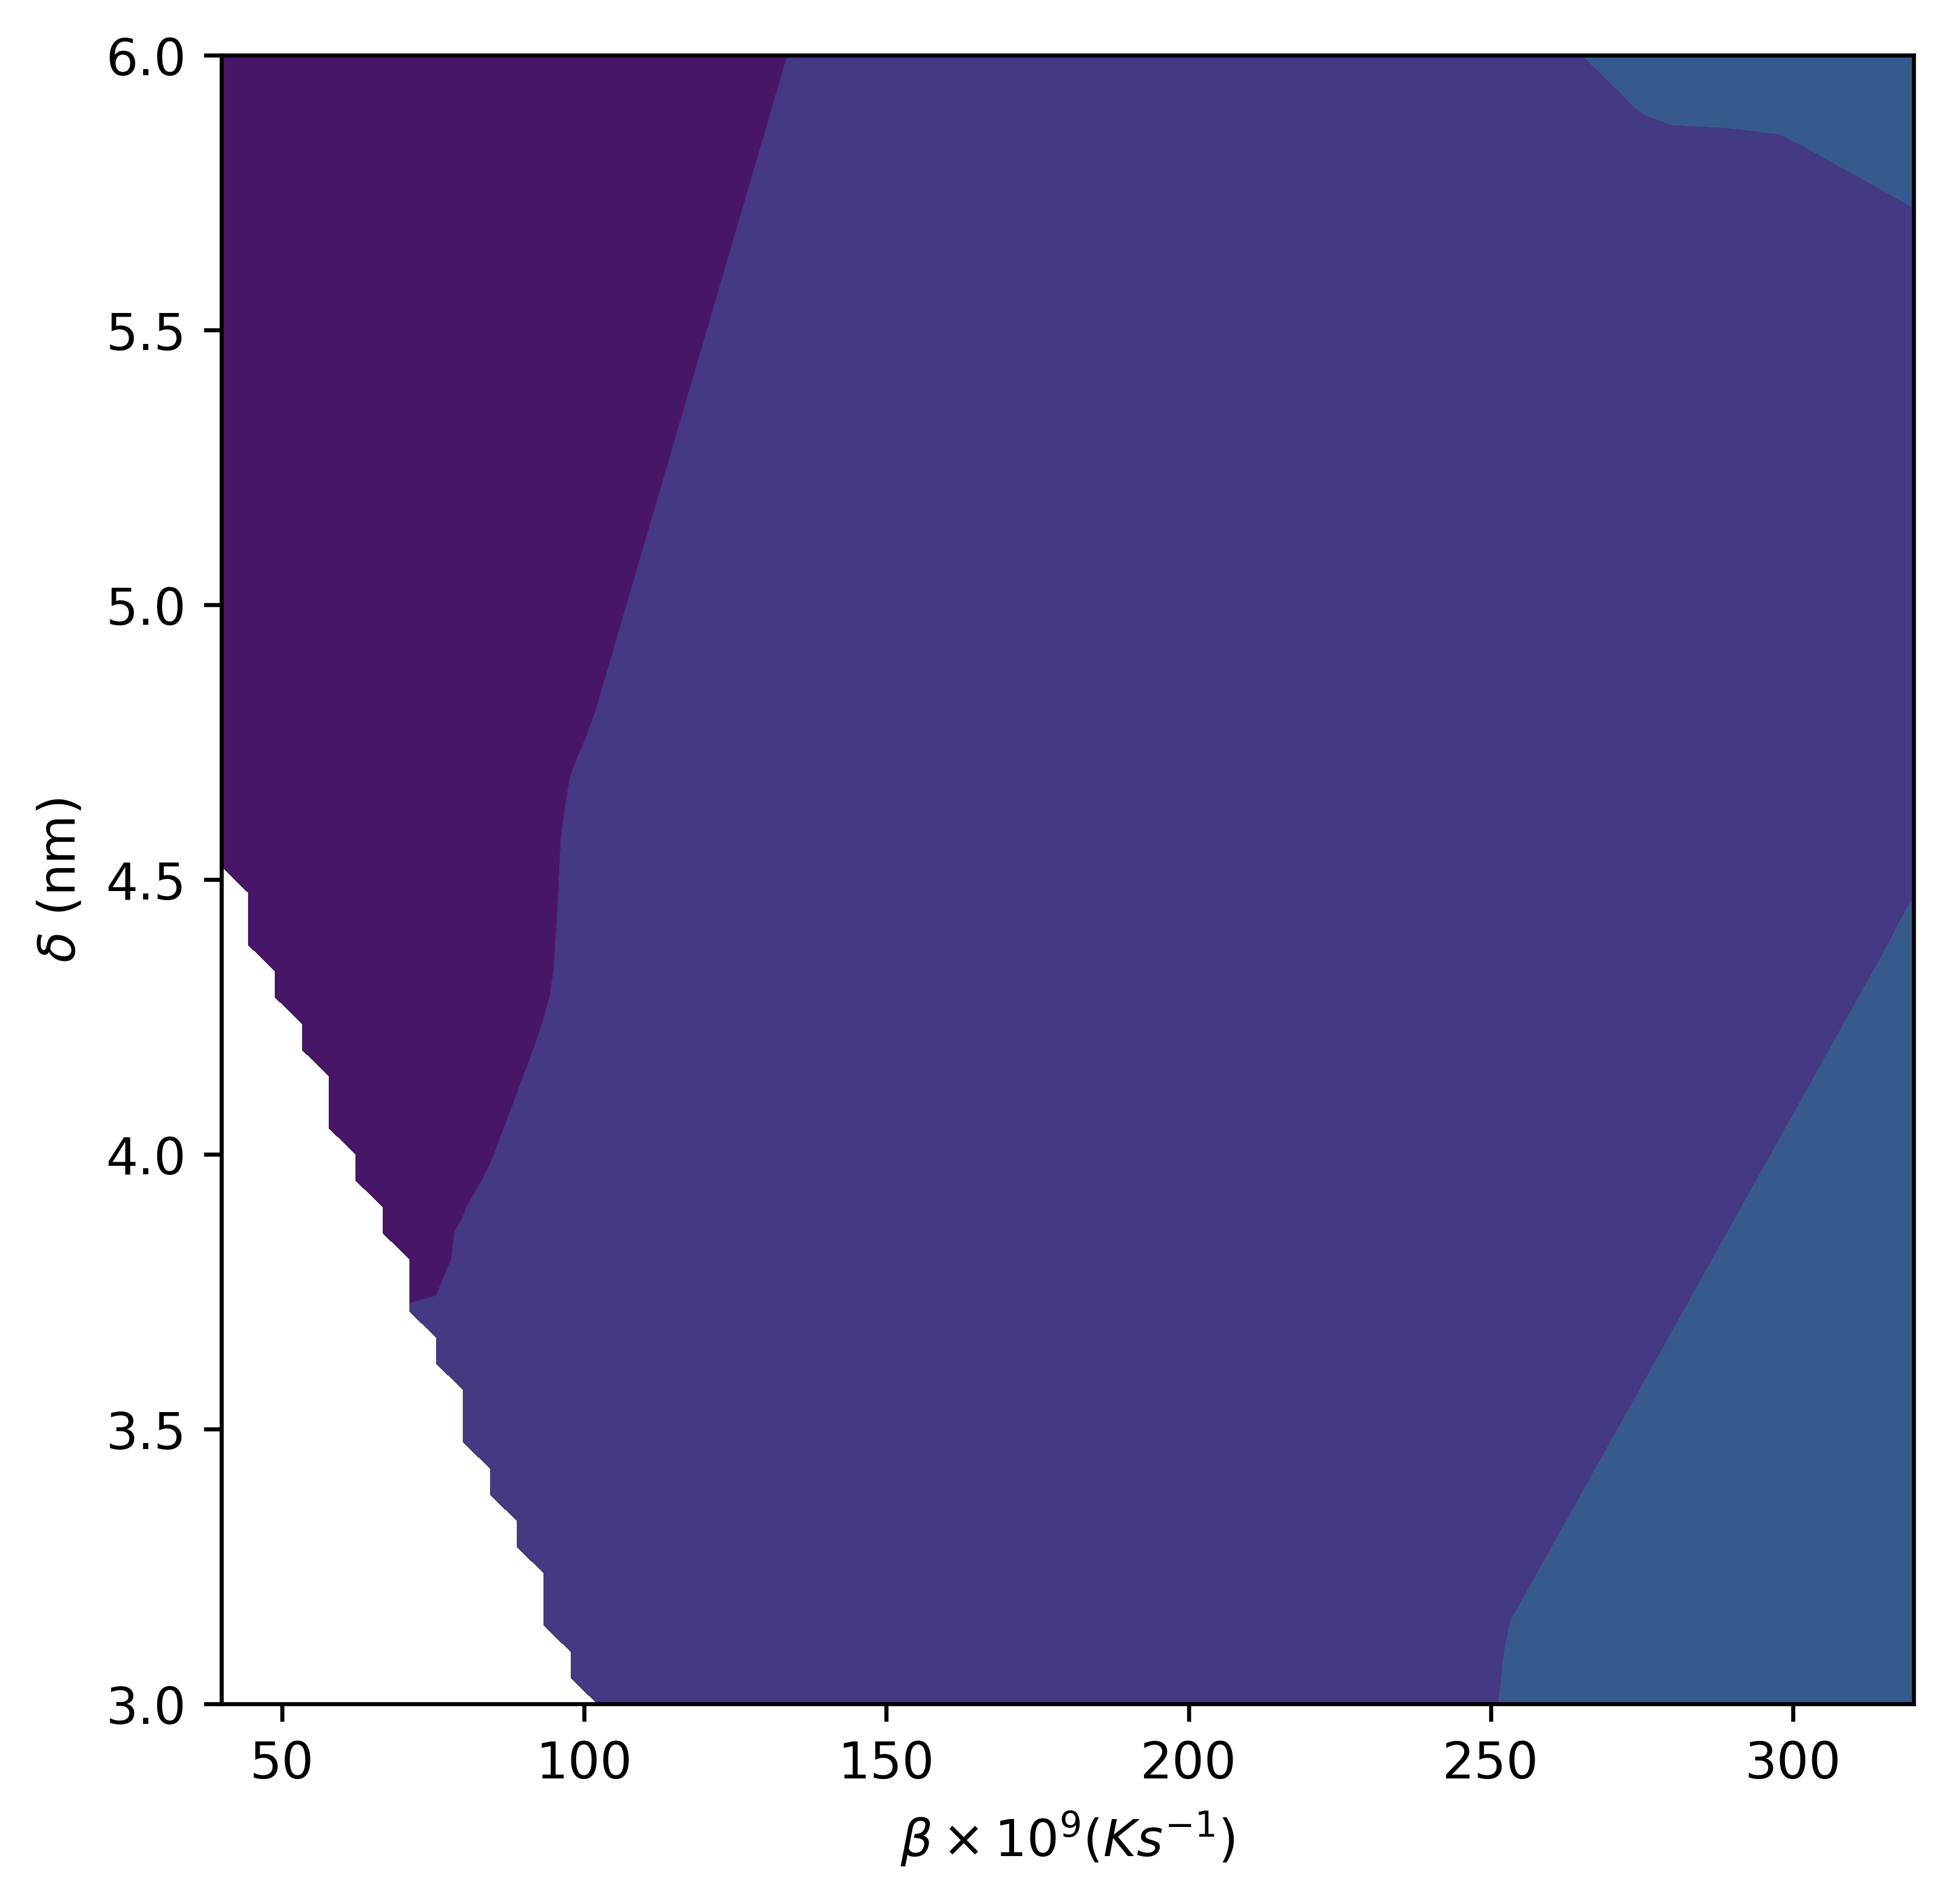

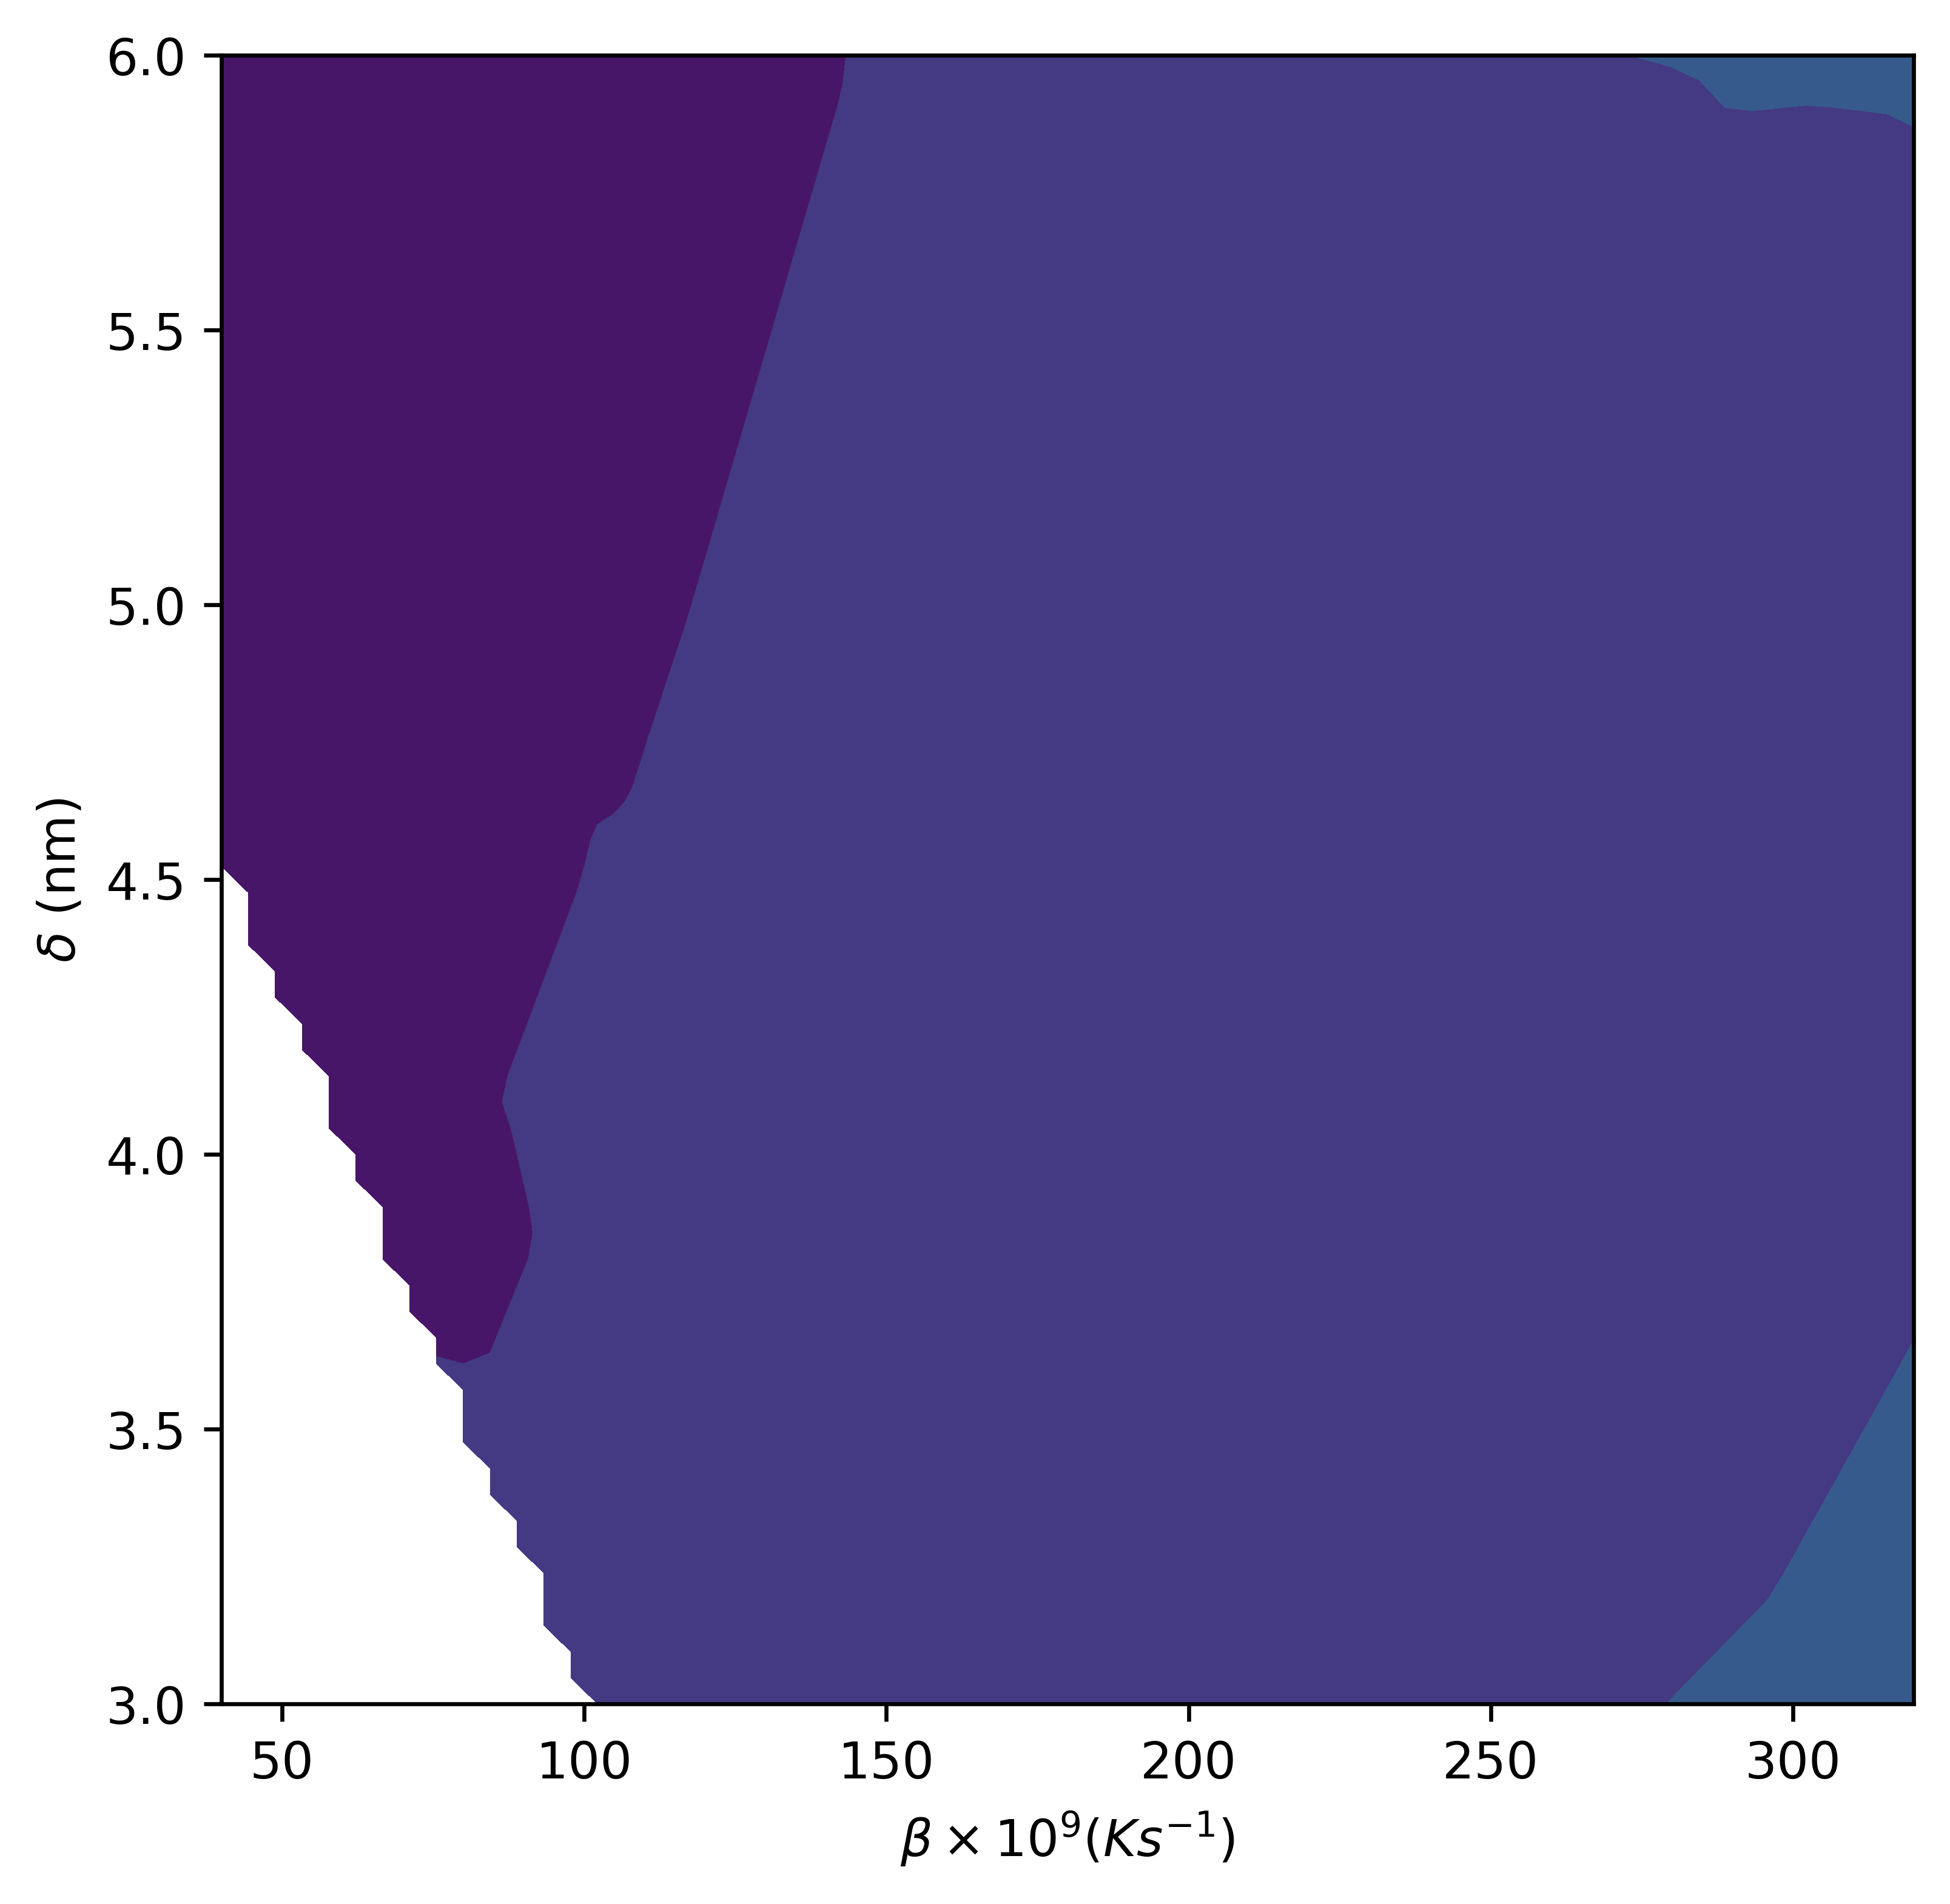

In [ ]:
for i in np.arange(0.5,4.5,0.5):
  pltNe = i
  pltX = X_grid[Ne_grid==pltNe].reshape(64,64)
  pltY = Y_grid[Ne_grid==pltNe].reshape(64,64)
  Z_wall[logit_Z==0] = np.nan
  pltZ = Z_wall[Ne_grid==pltNe].reshape(64,64)
  image4 = plt.figure(figsize=(6,6), dpi = 600)
  cp = plt.contourf(pltX, pltY, pltZ,np.linspace(166,346,10))
  #plt.colorbar(cp)
  plt.xlabel(r'$\beta \times 10^9 (Ks^{-1})$')
  plt.ylabel(r'$\delta$ (nm)')
  plt.show()
  image4.savefig('/content/drive/MyDrive/Rice Google Drive/Research/Misc/Leidenfrost_ML/Figures/Twall_Ne='+str(pltNe)+'.png',  bbox_inches="tight")

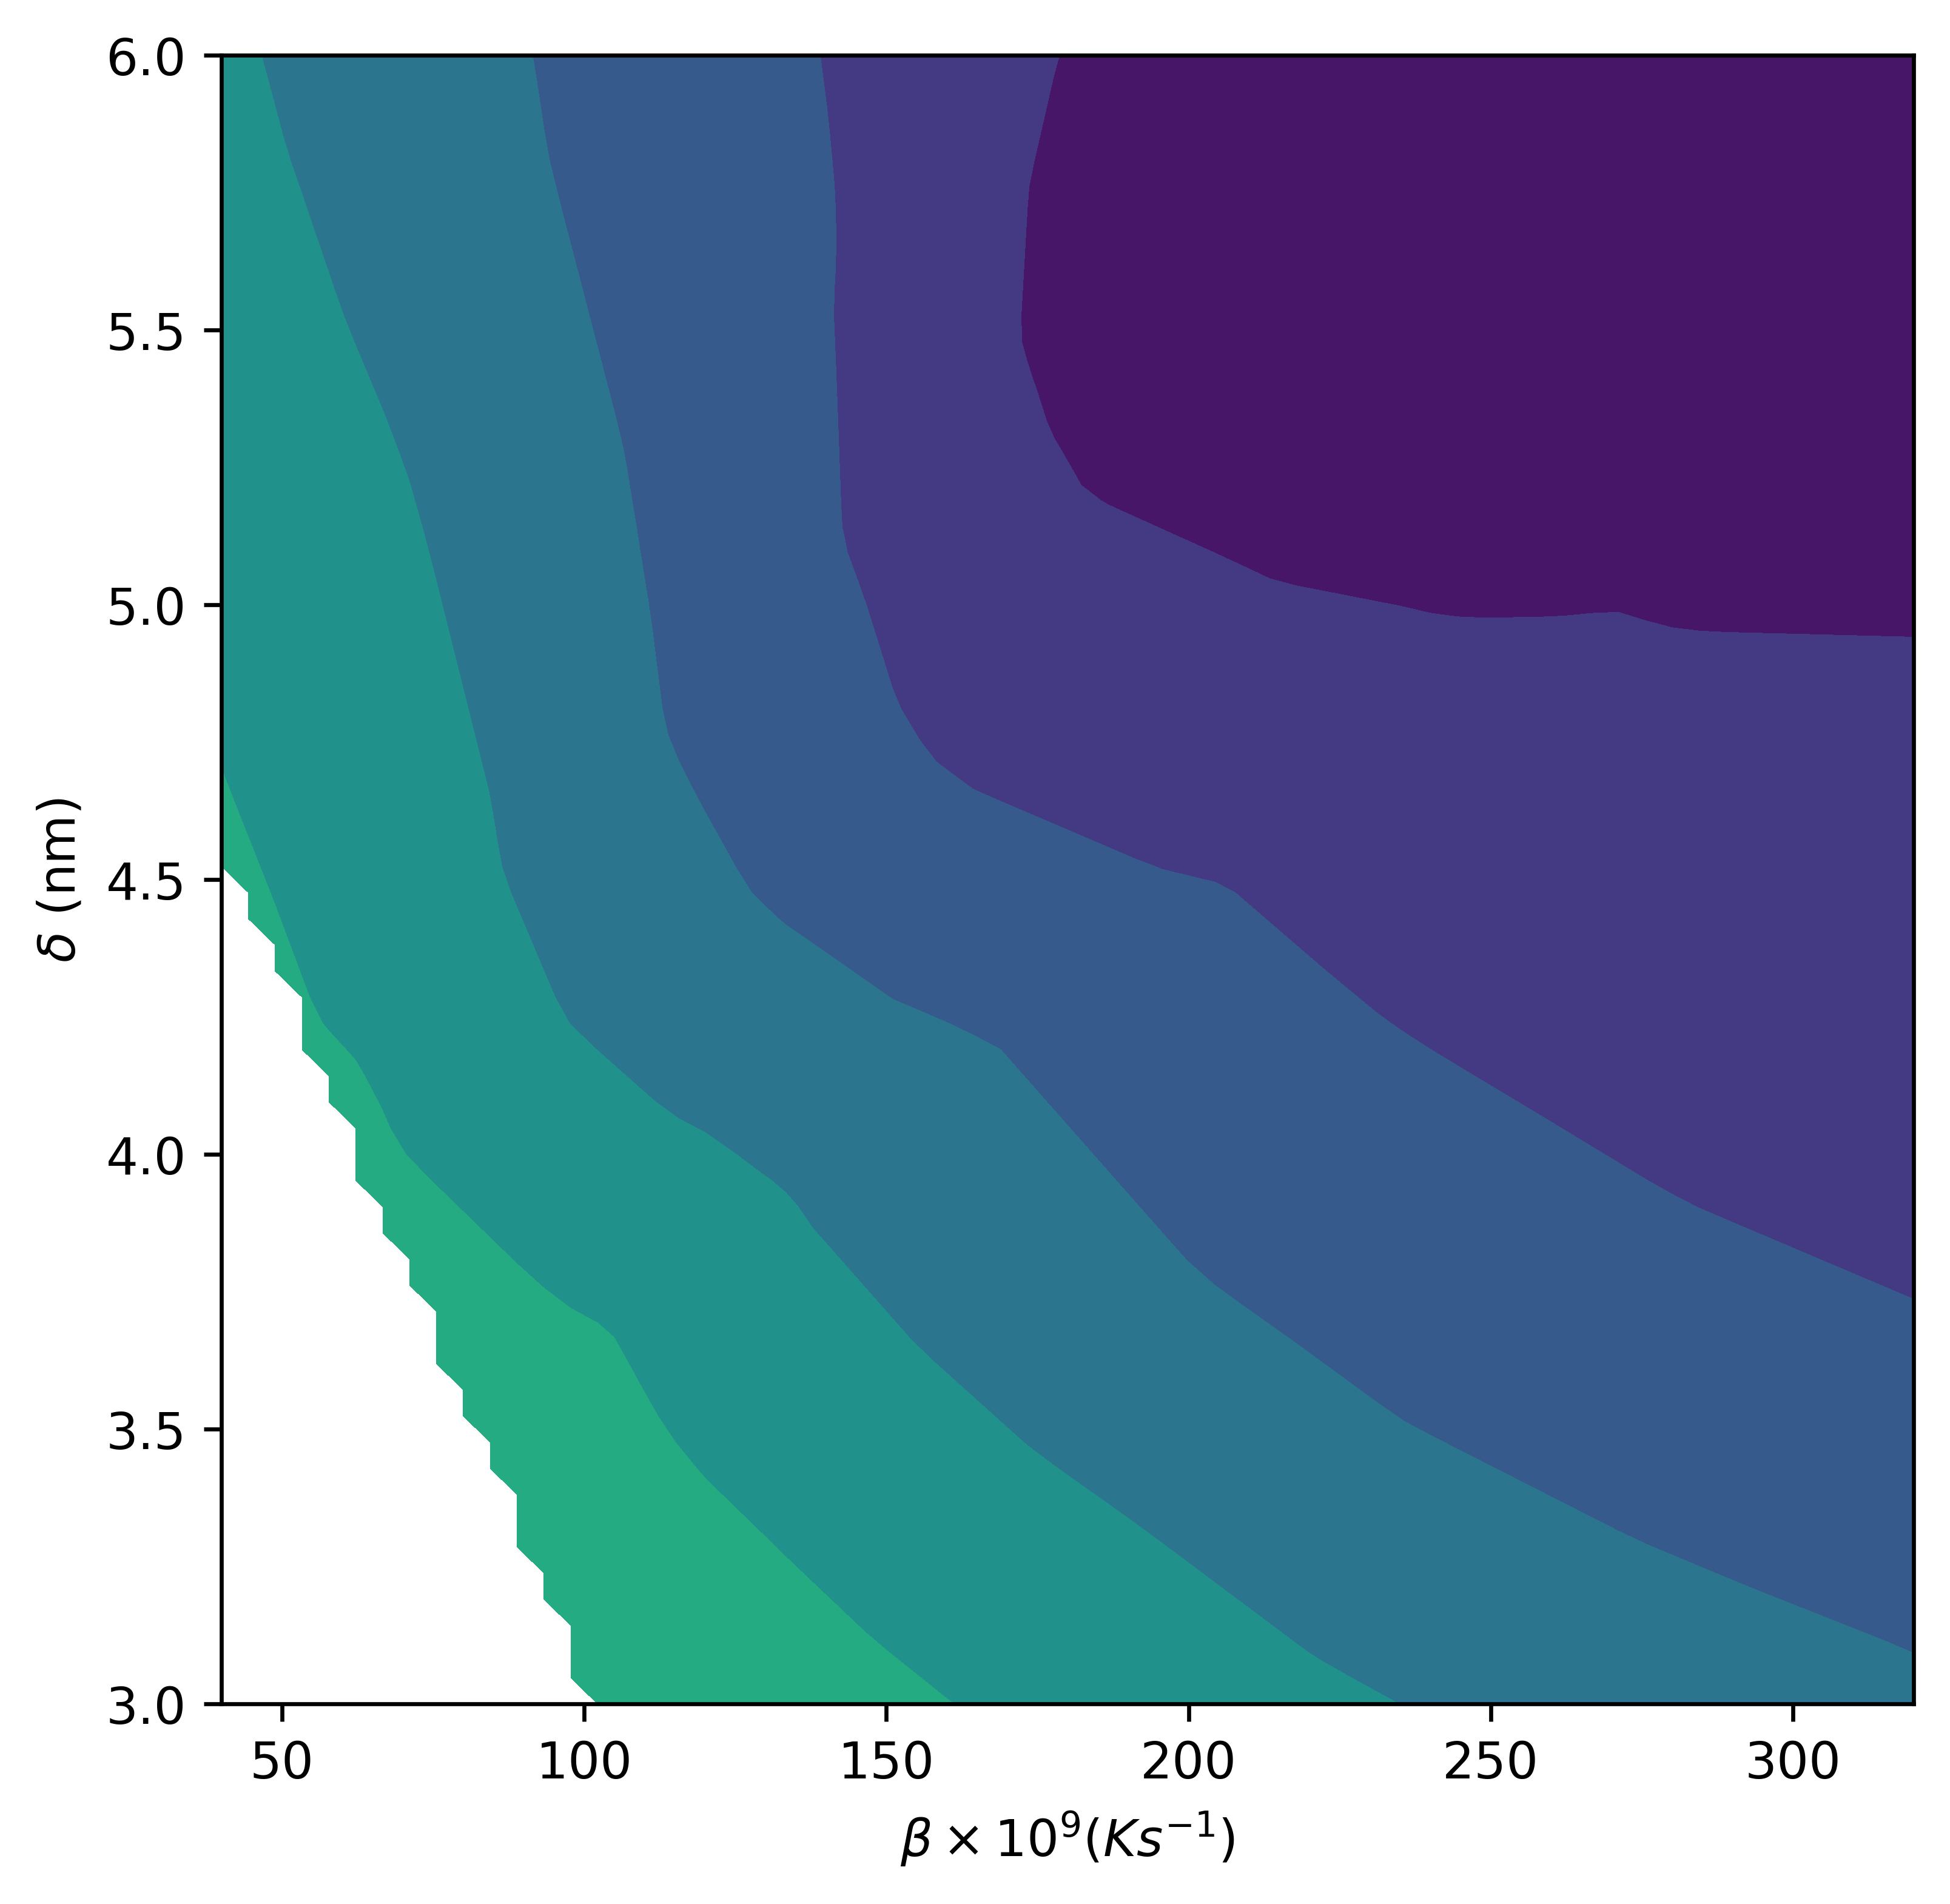

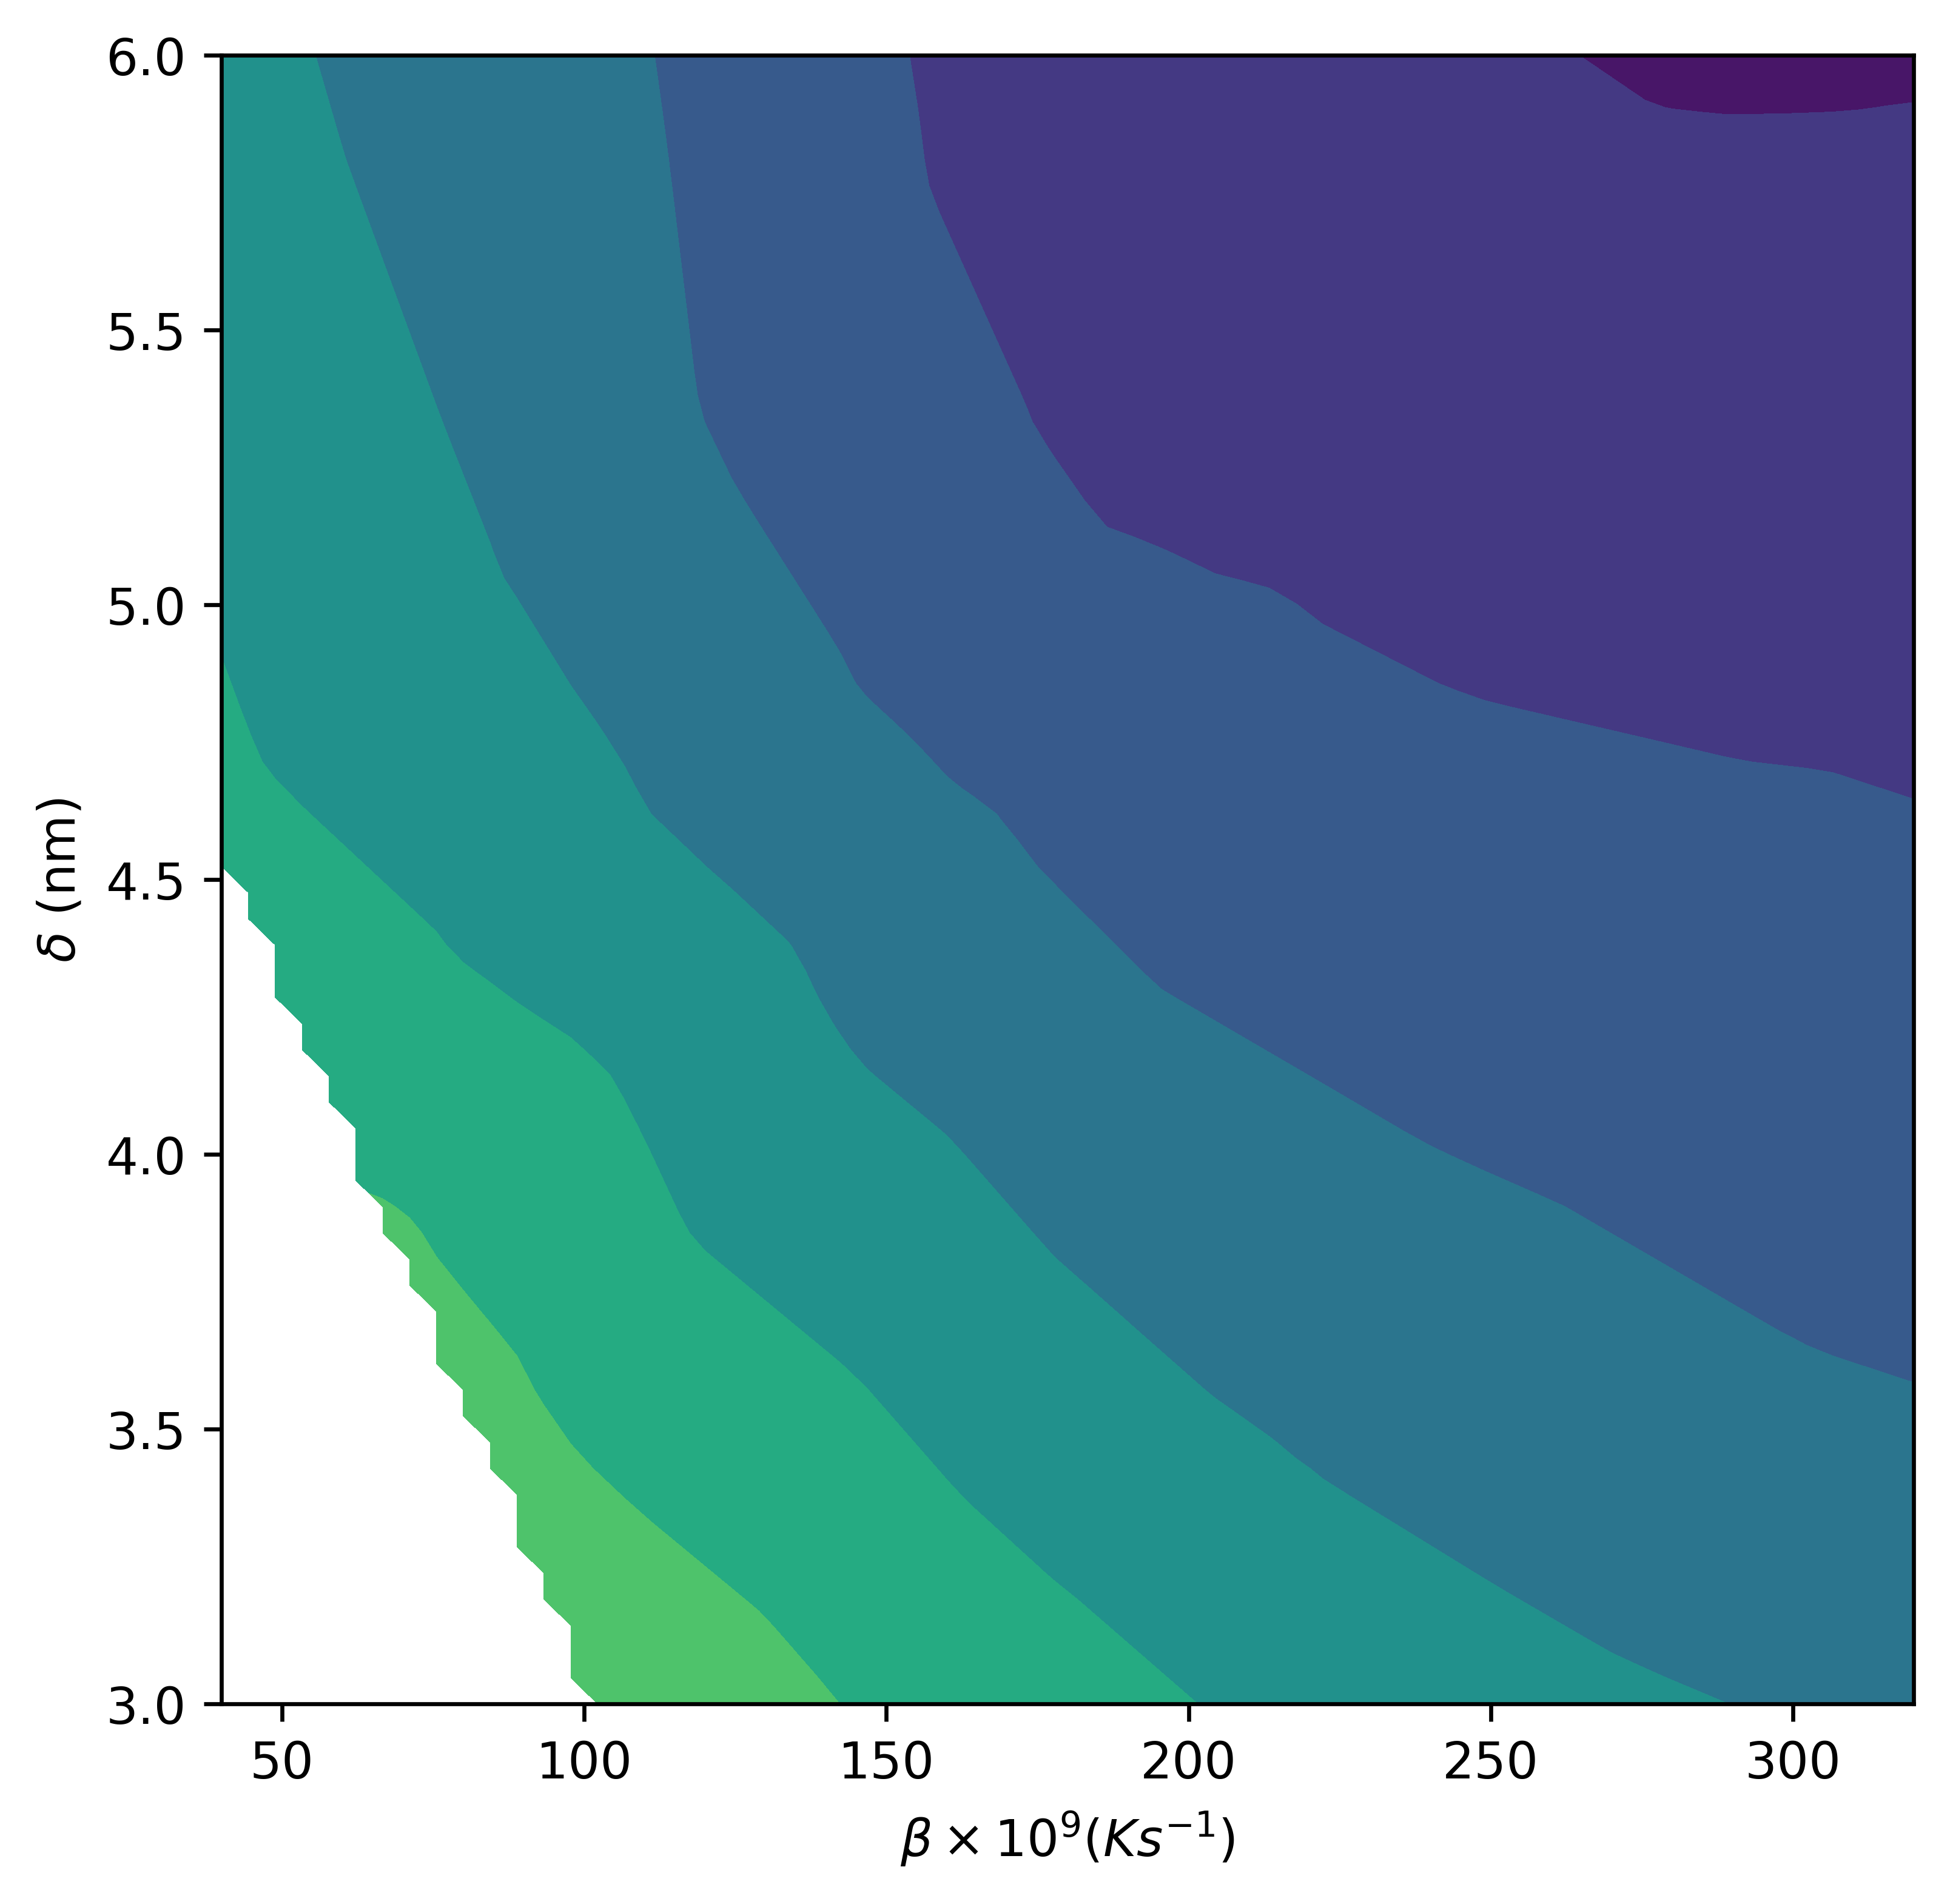

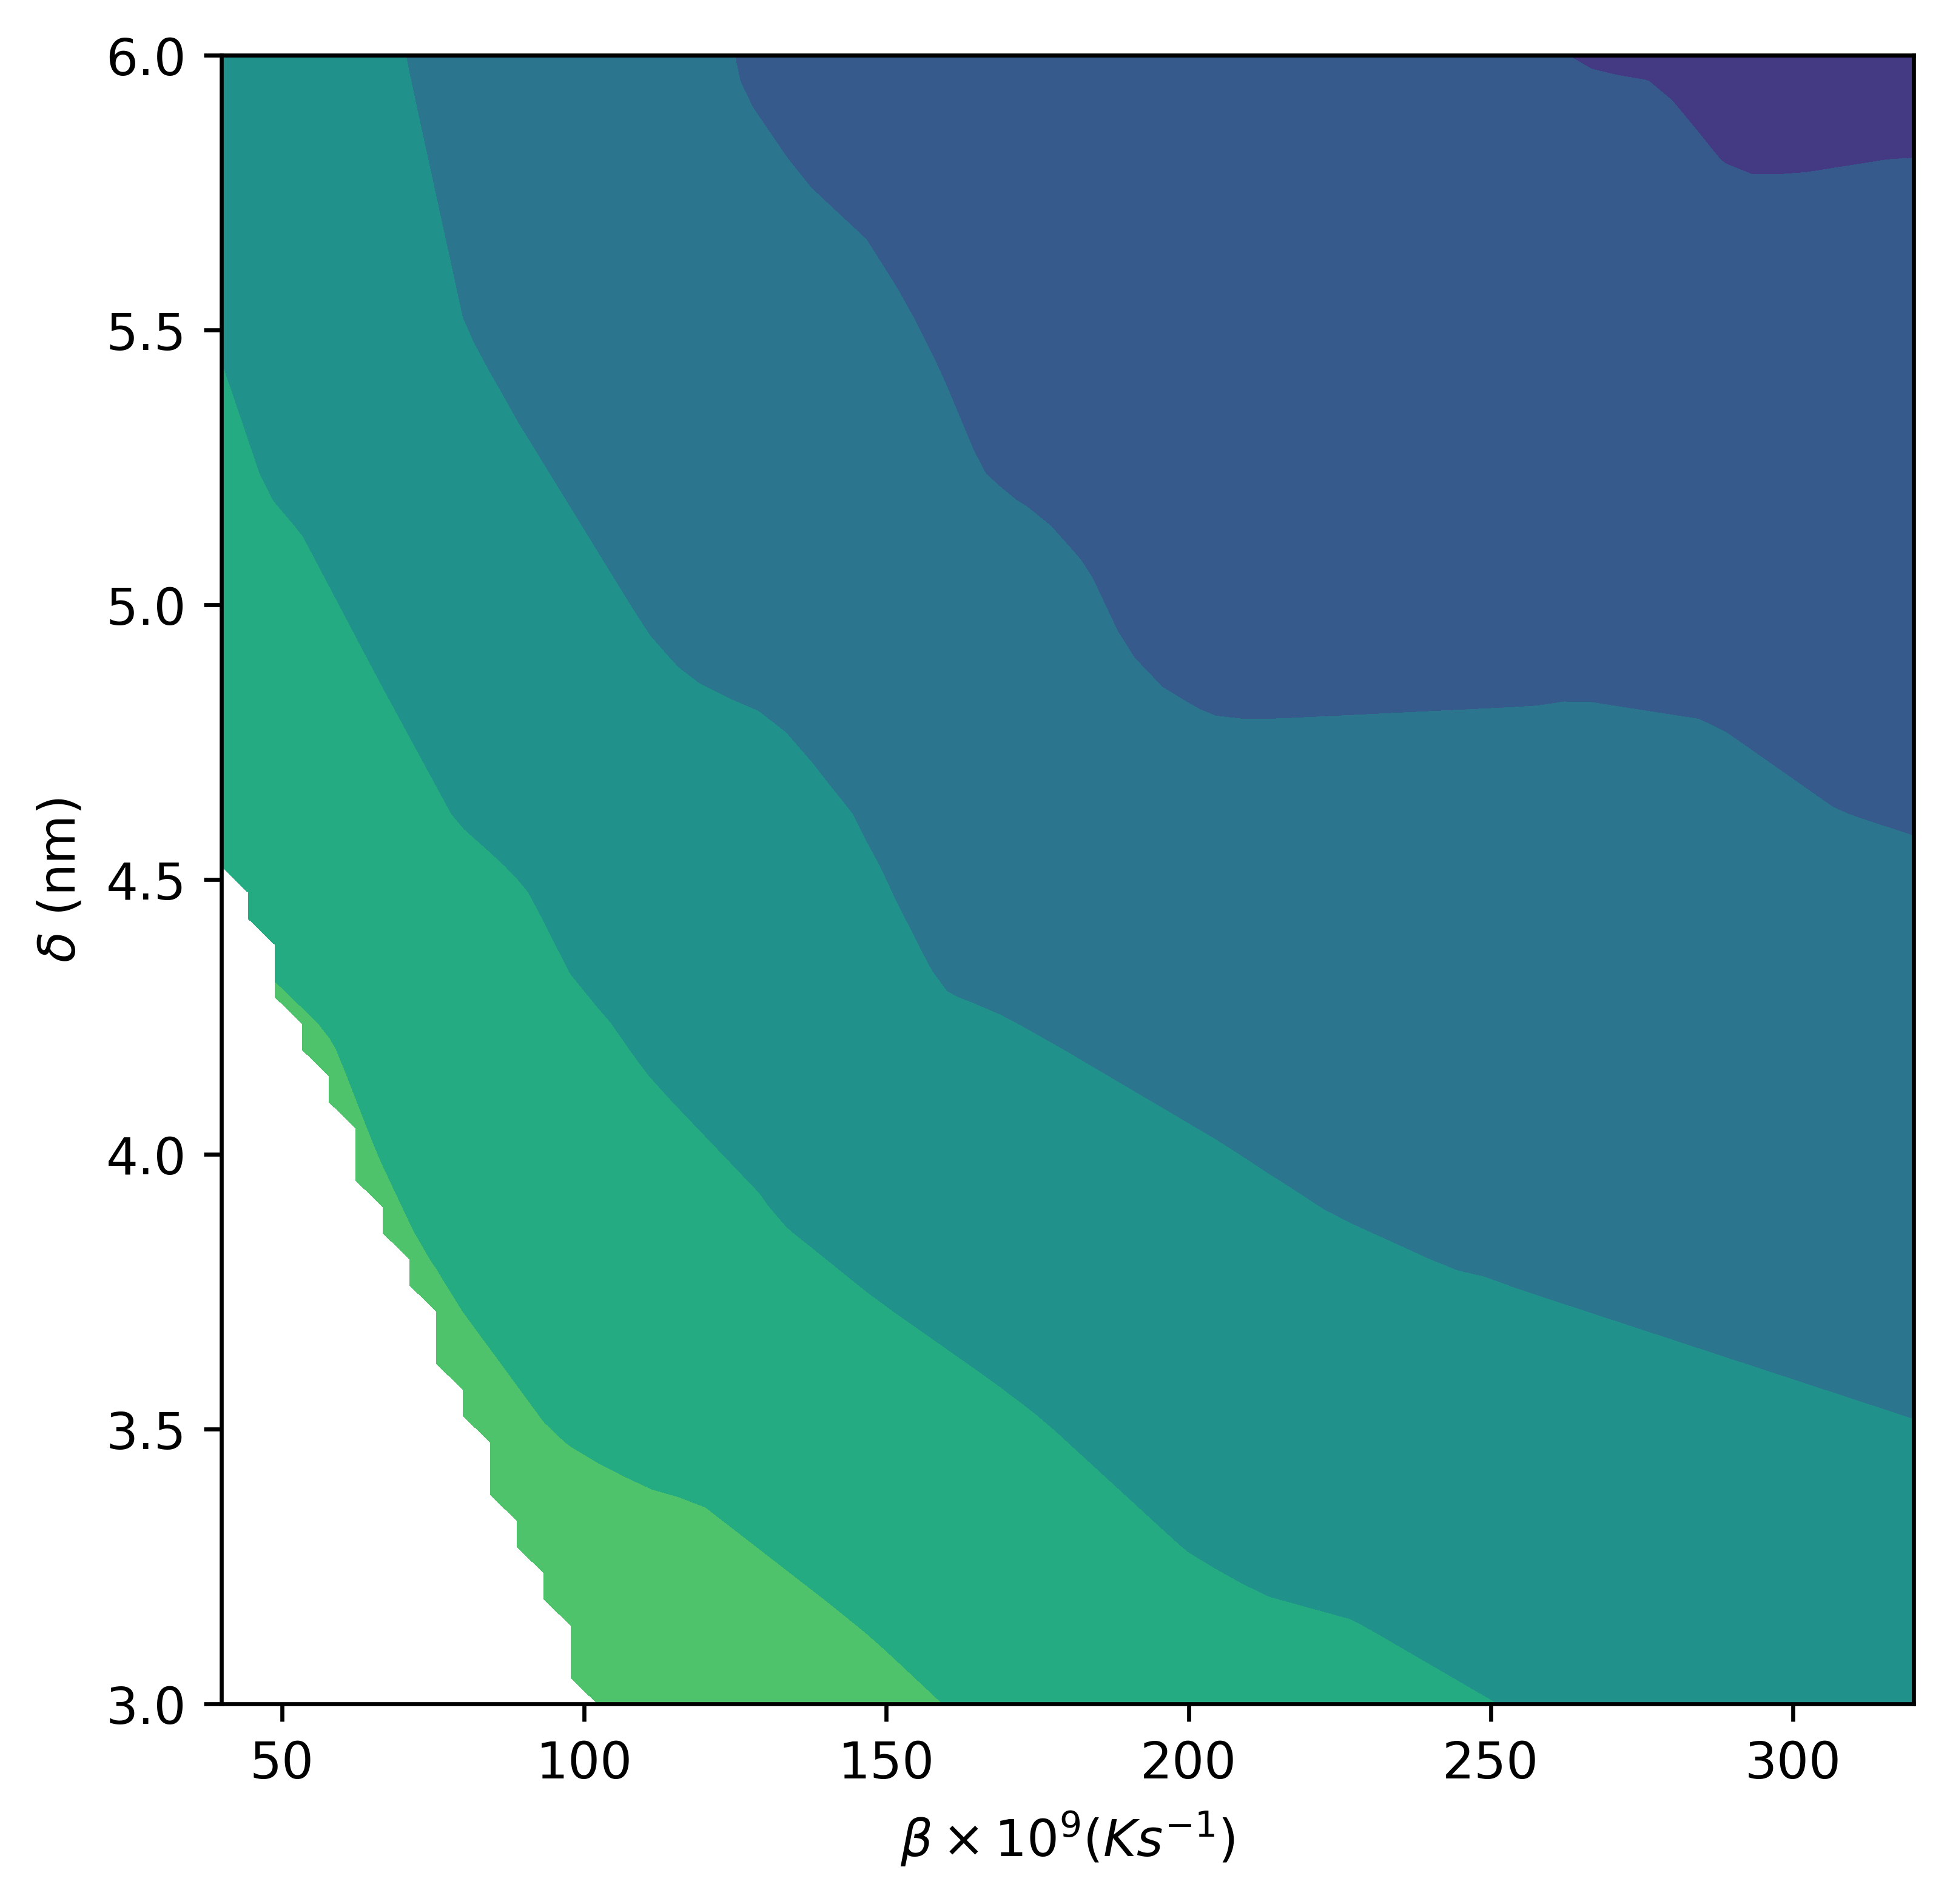

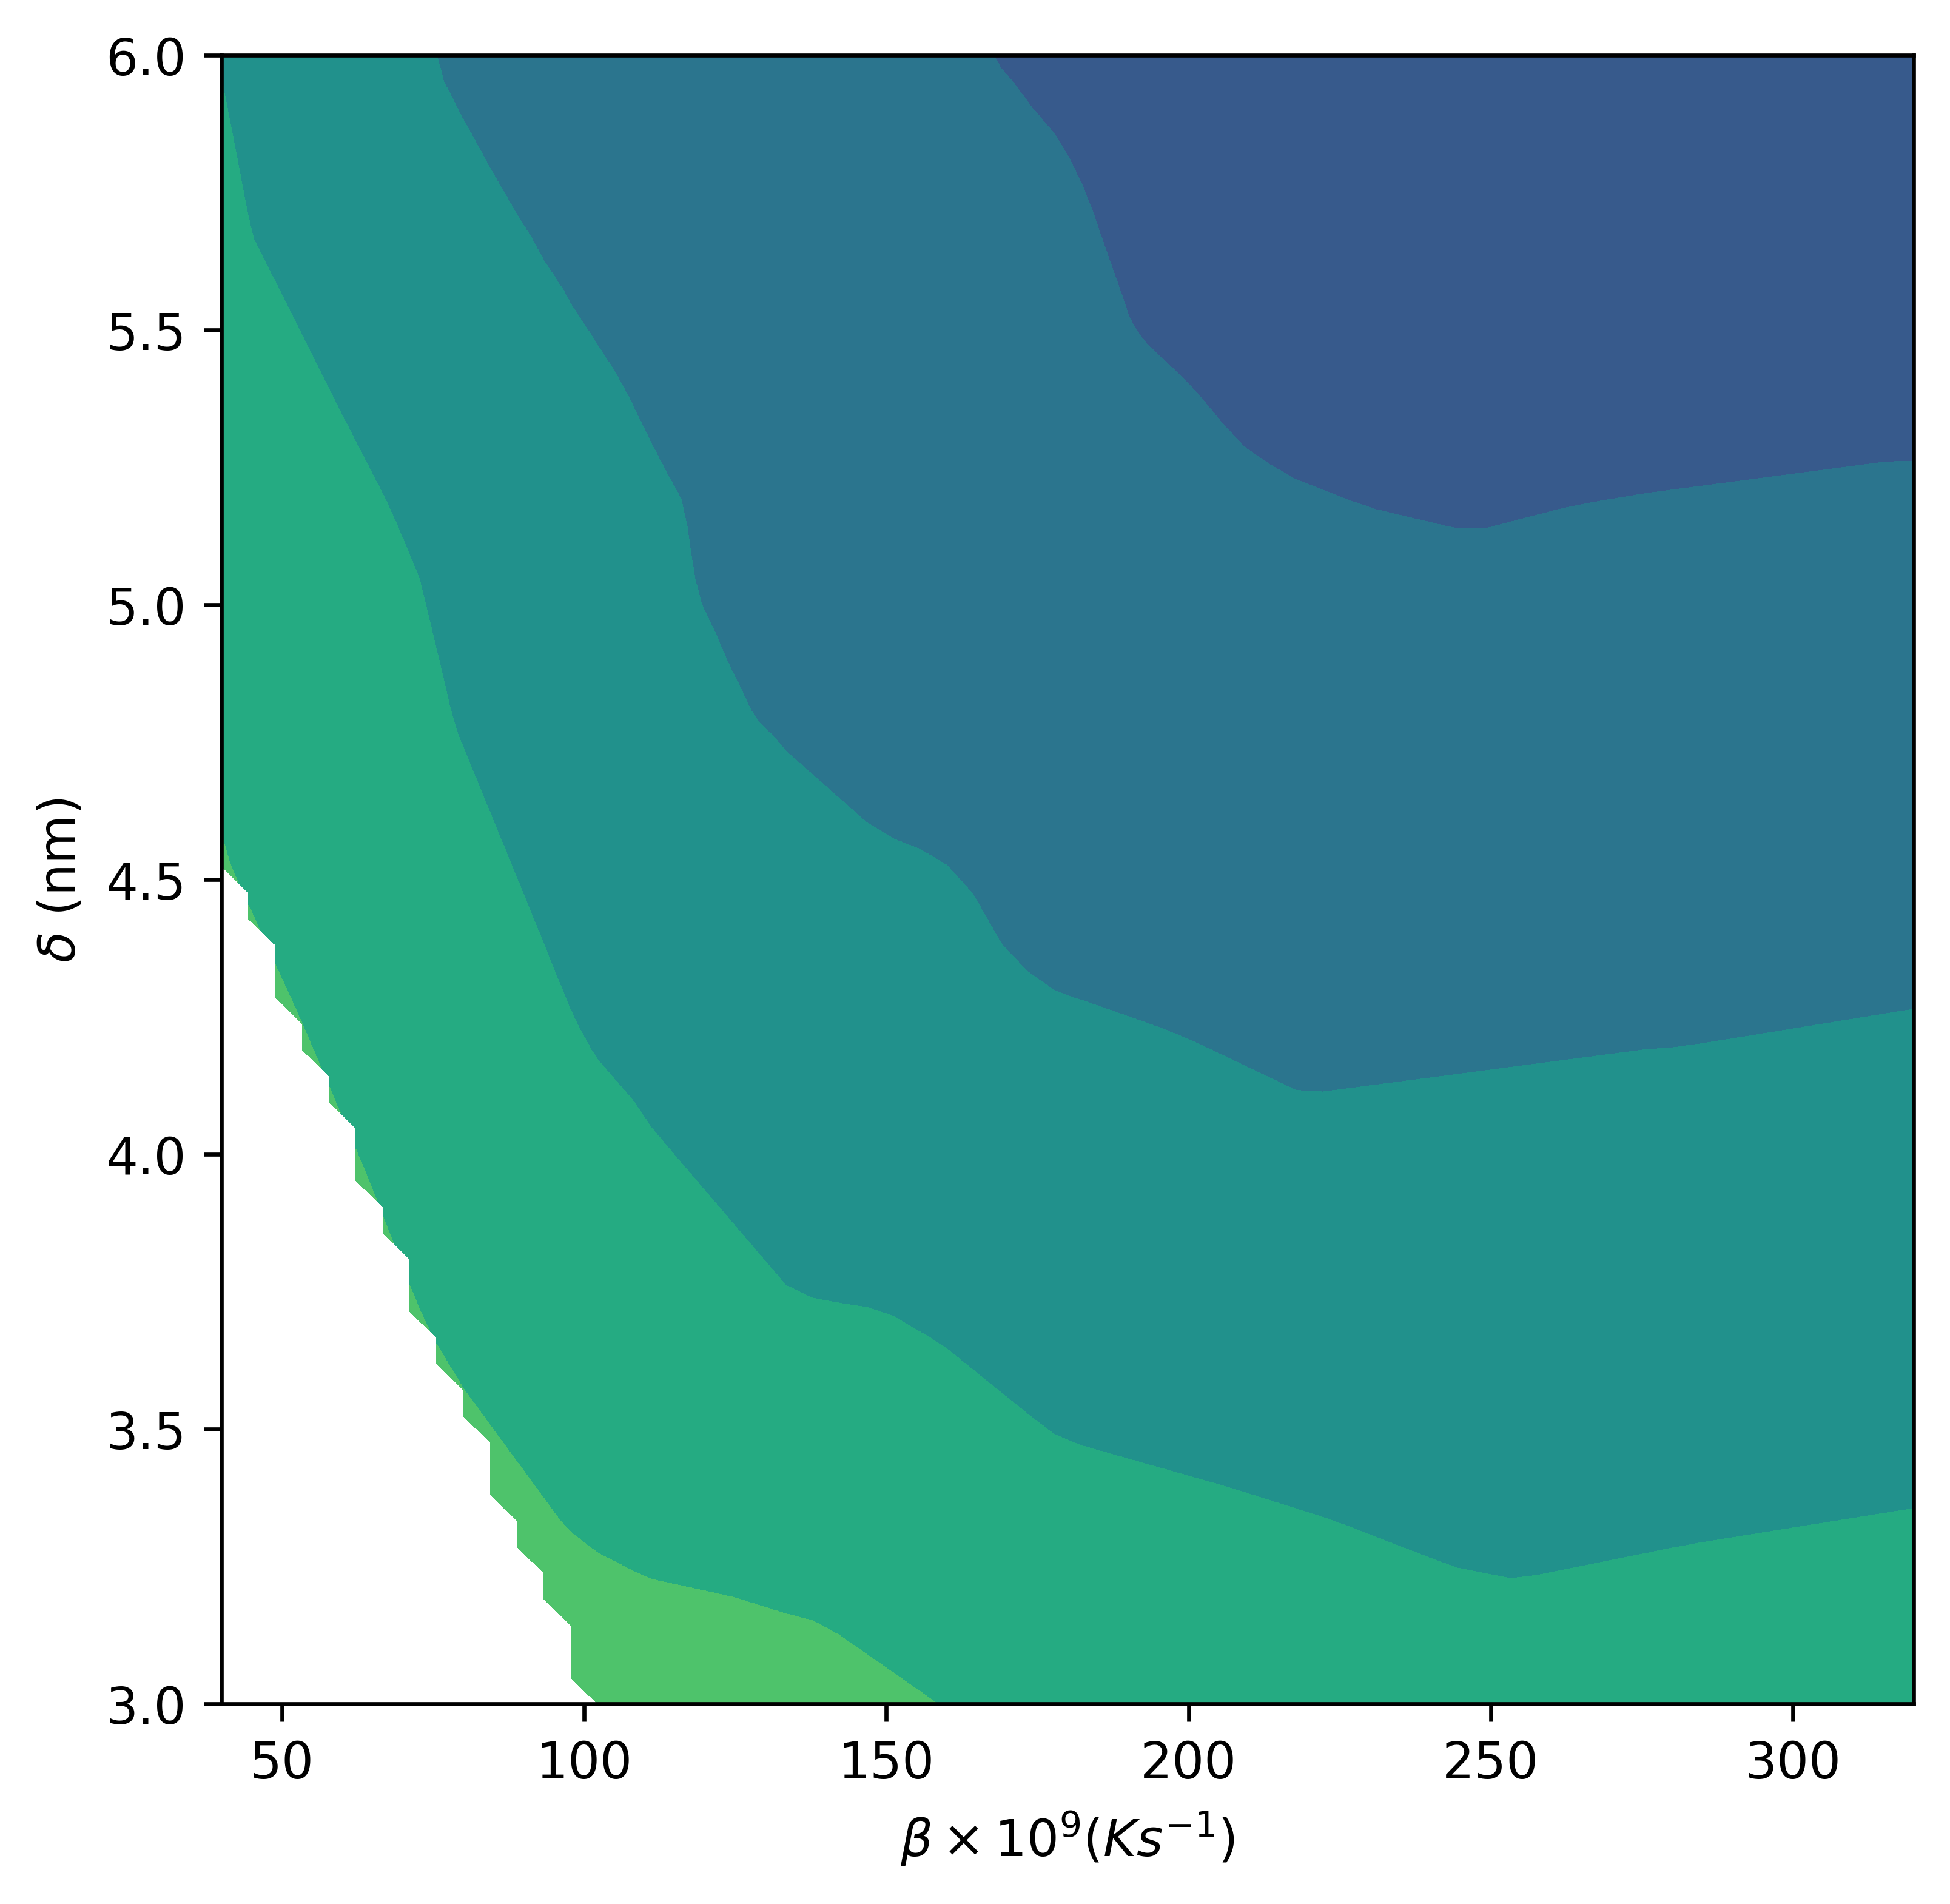

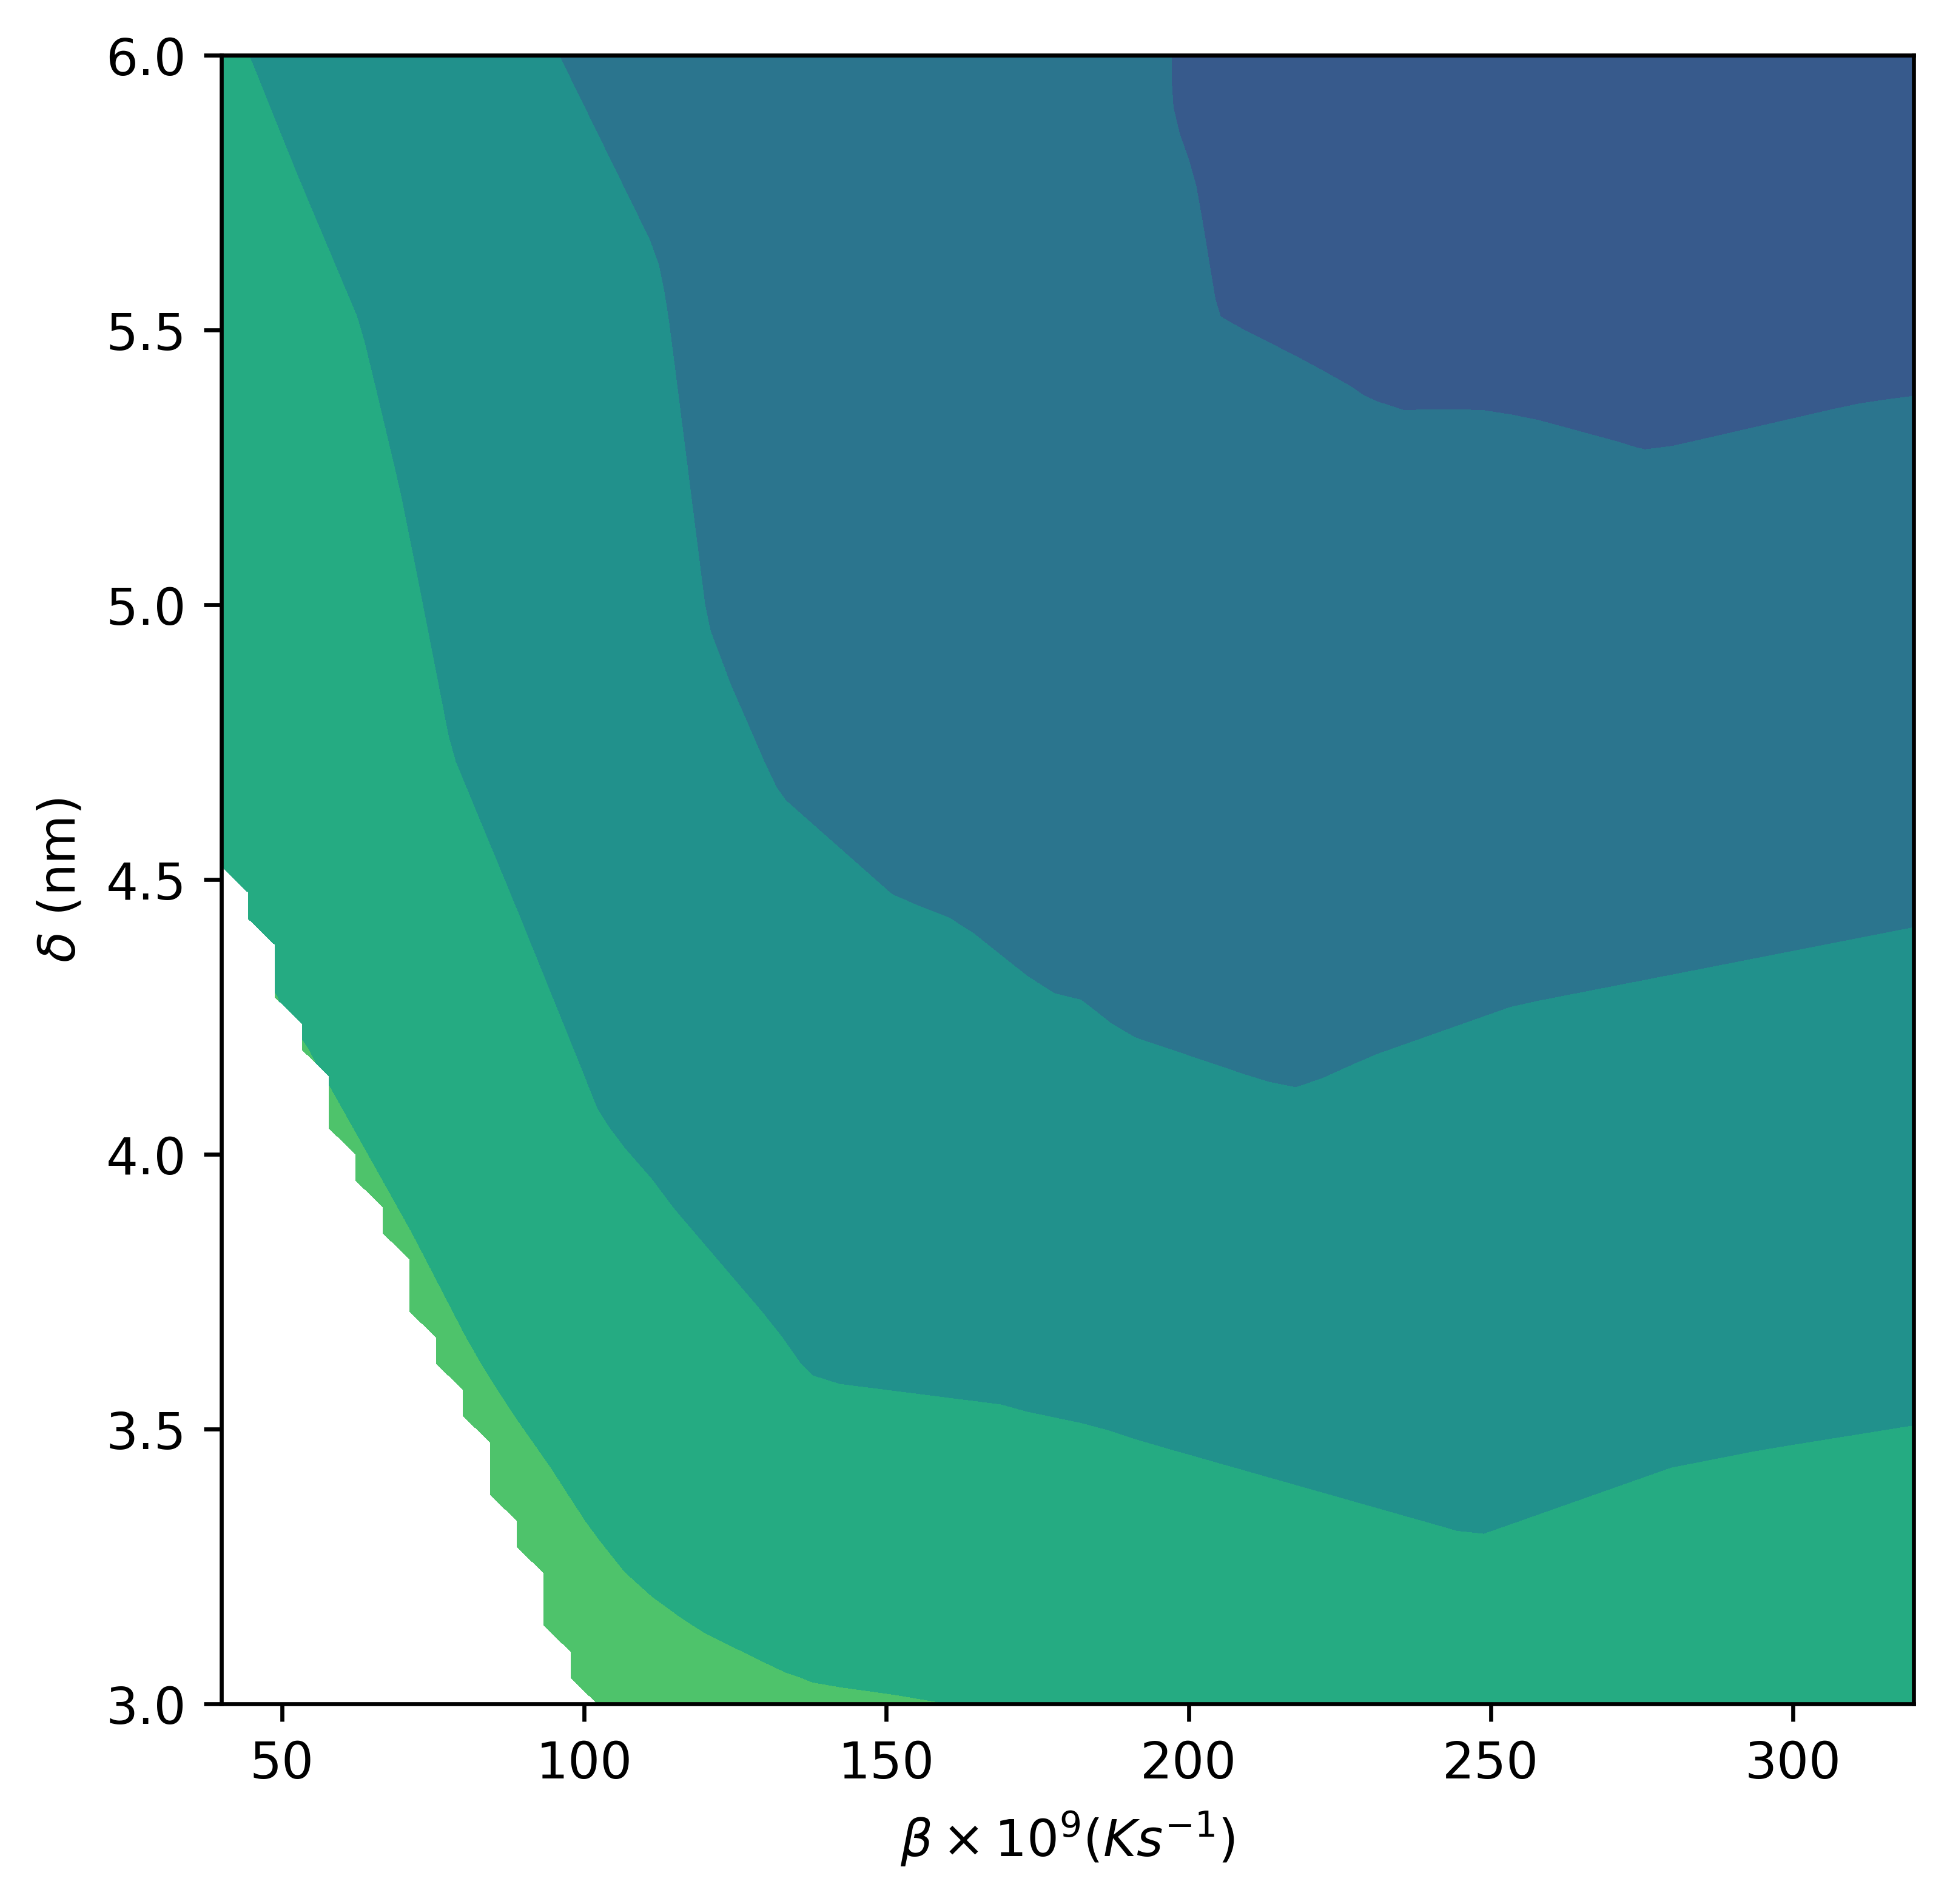

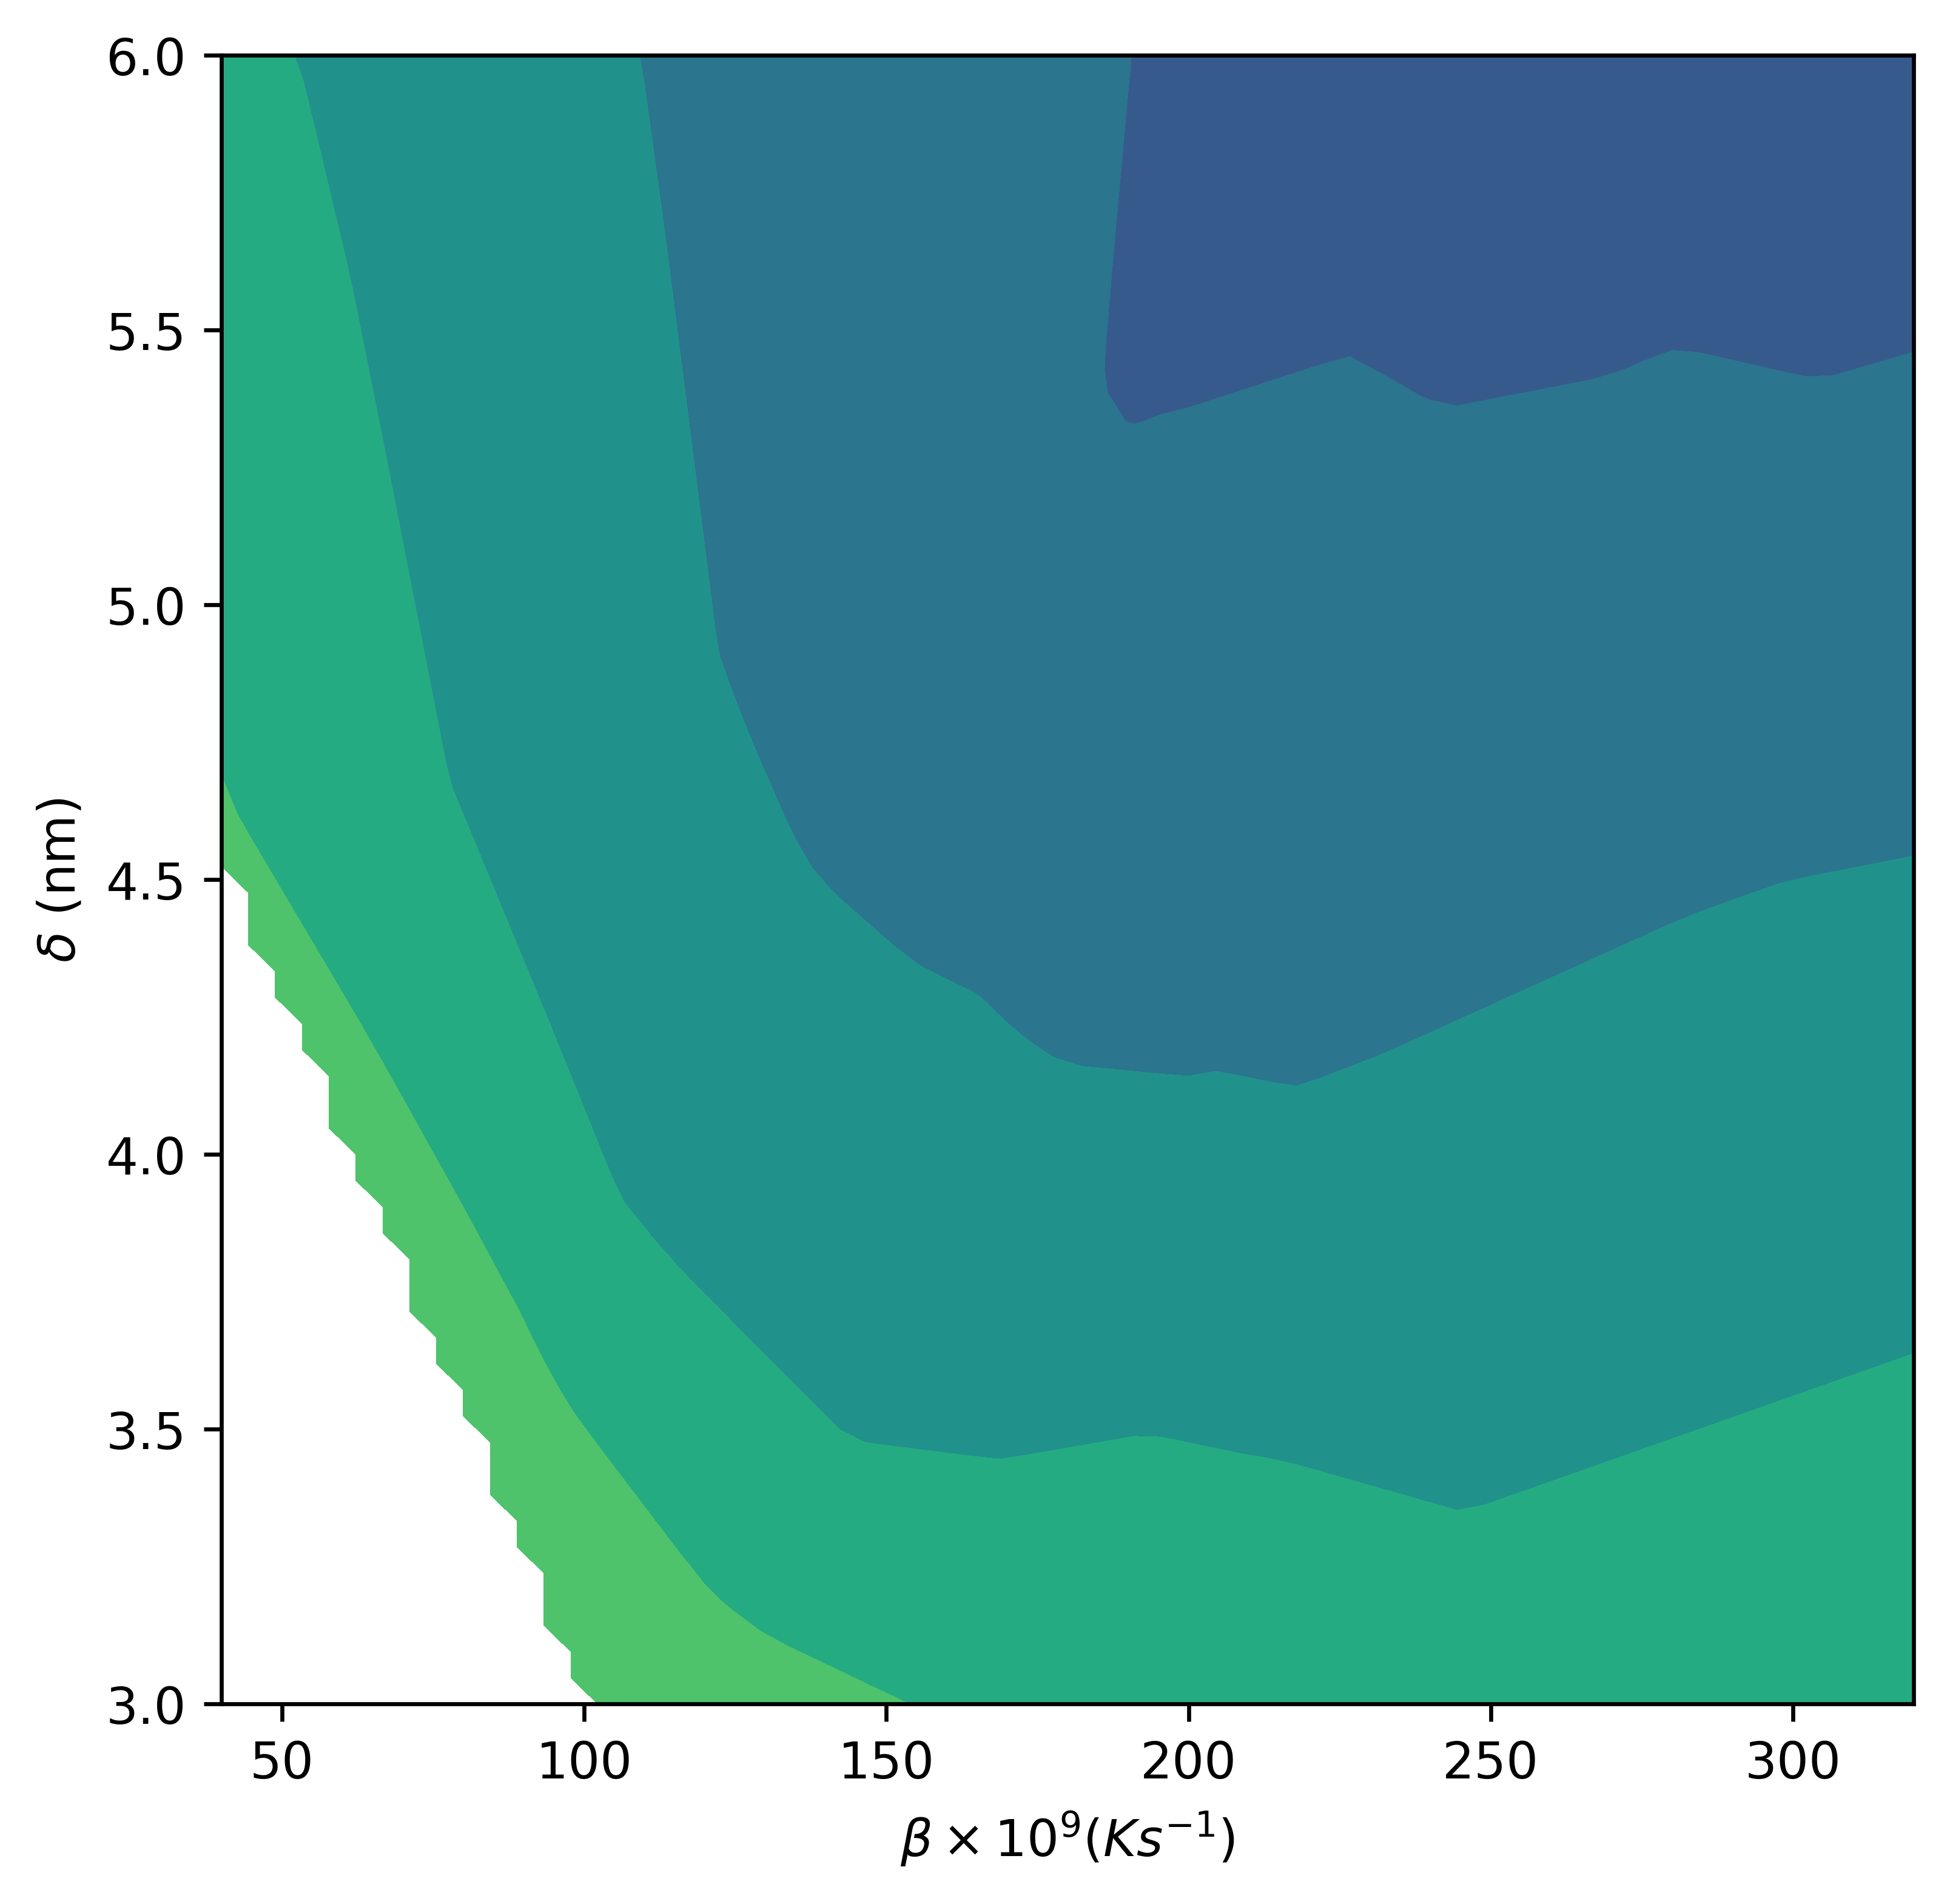

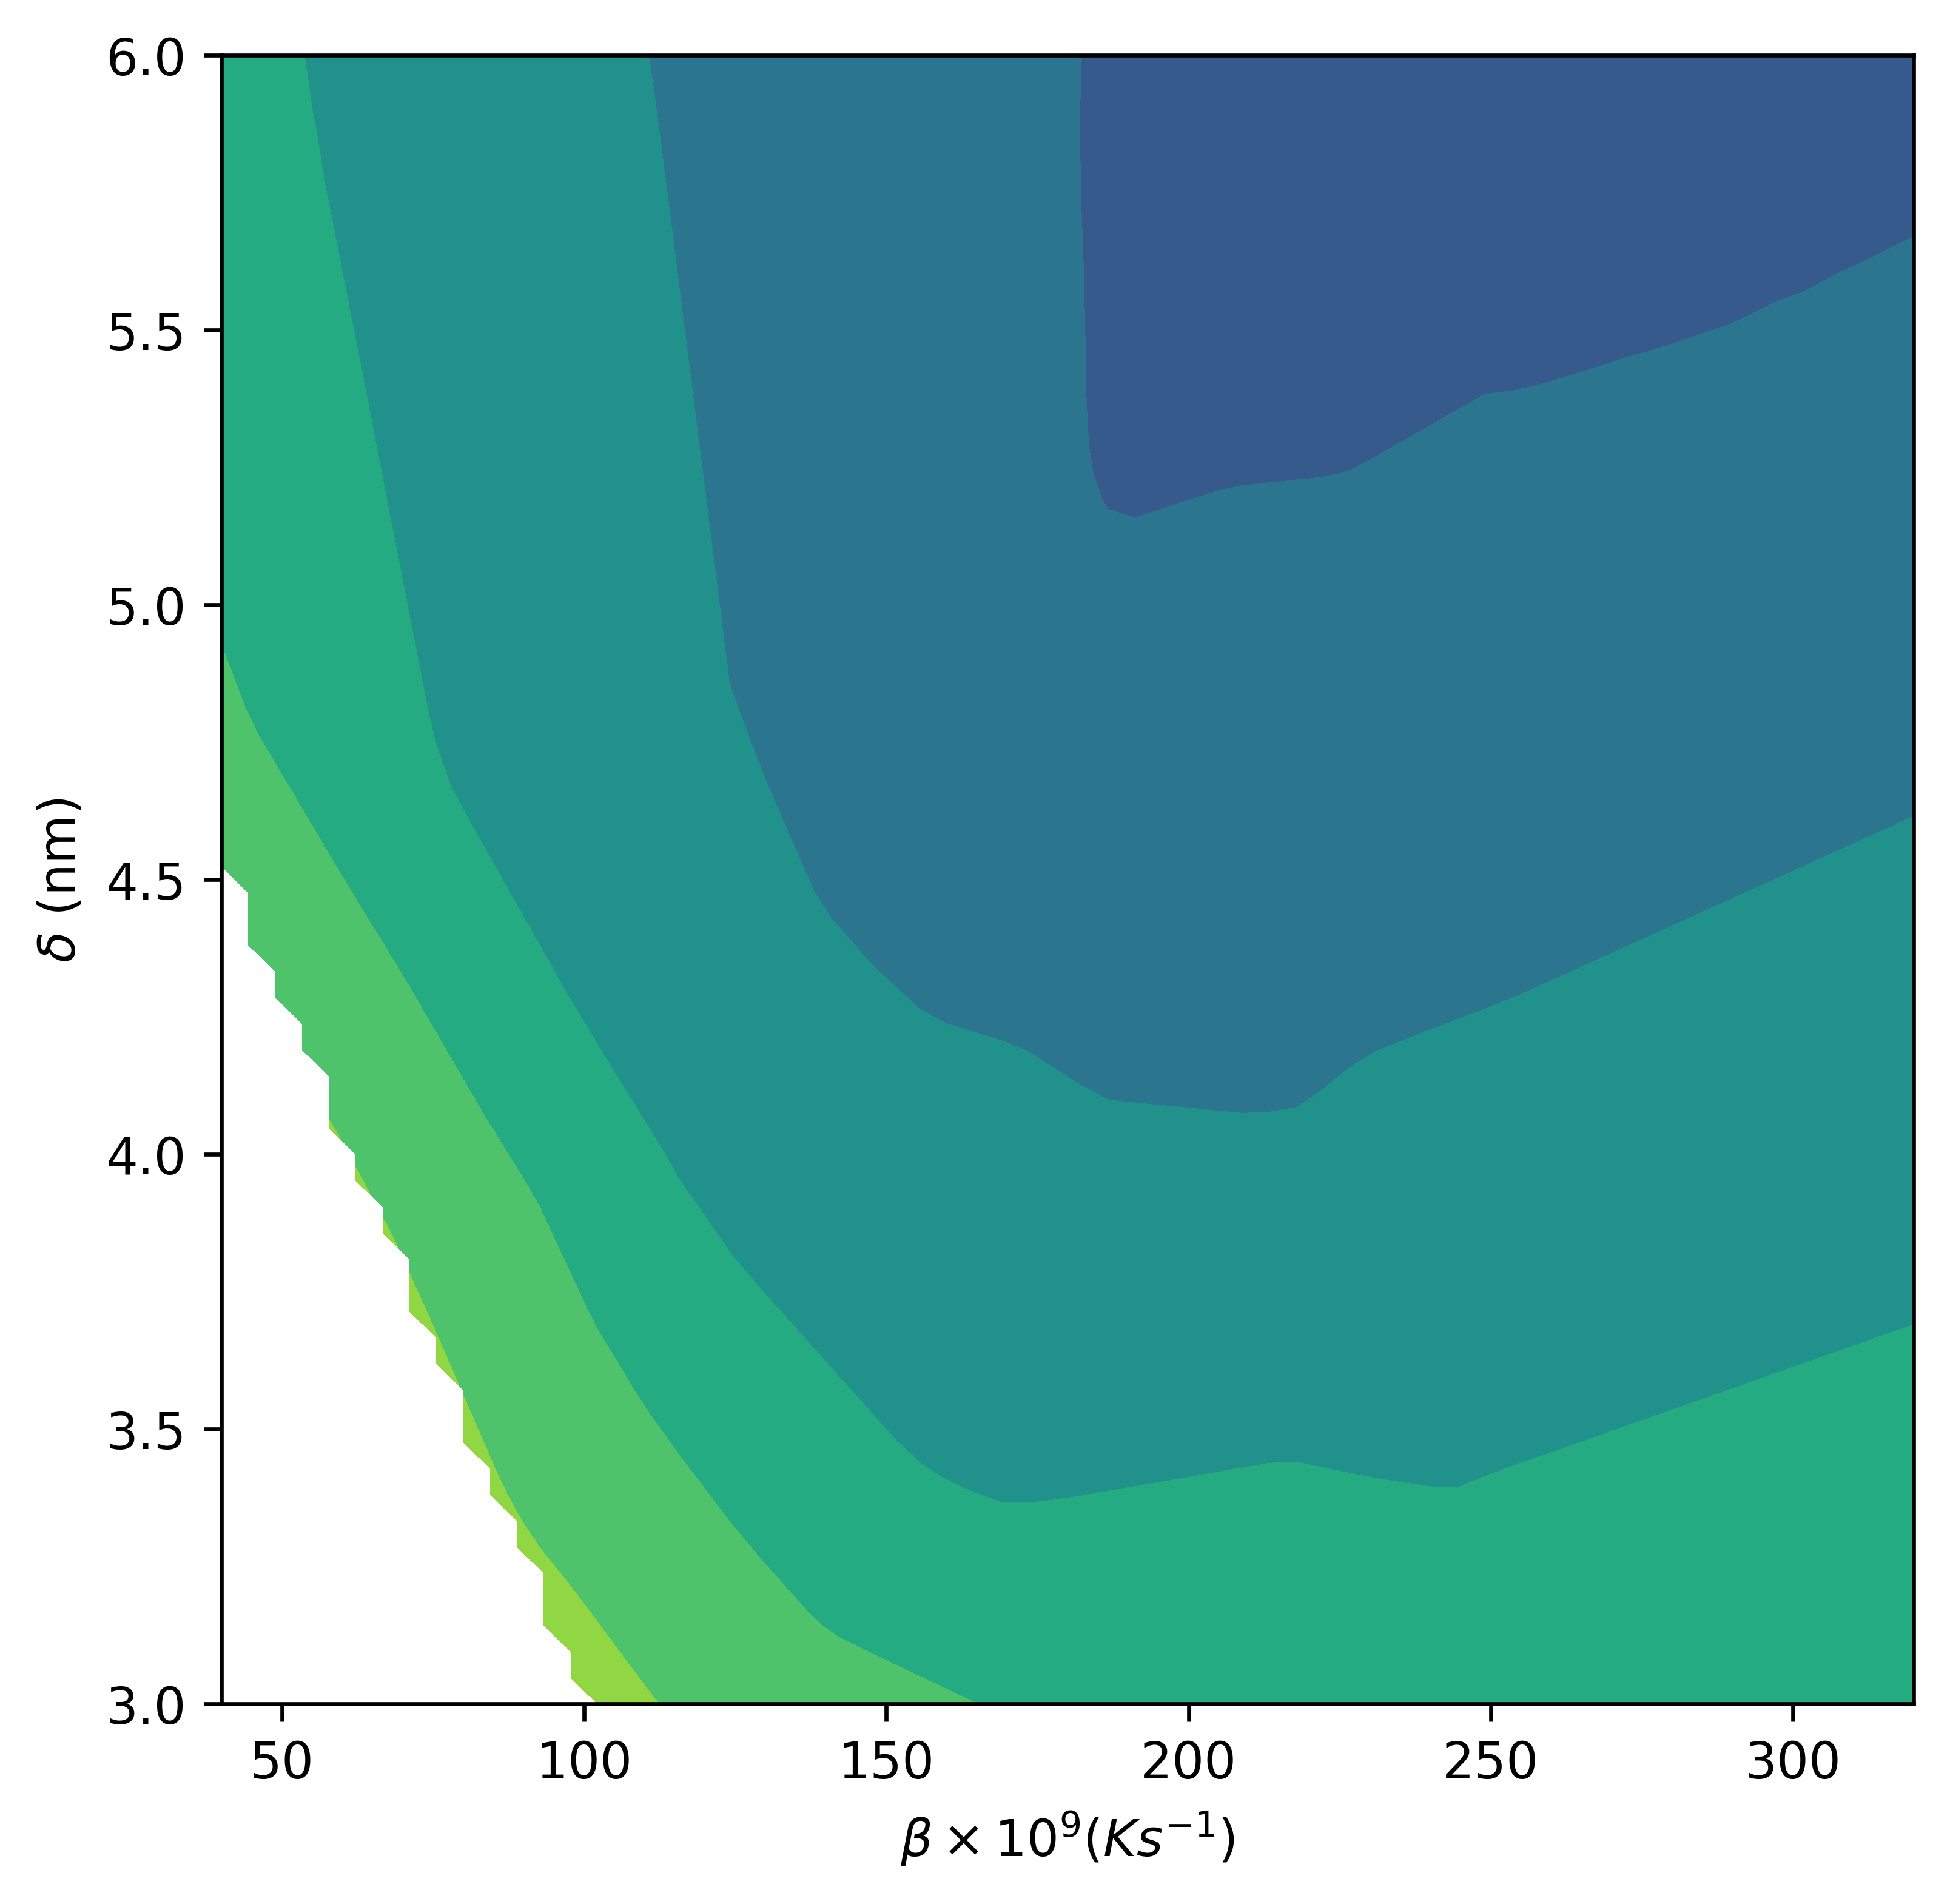

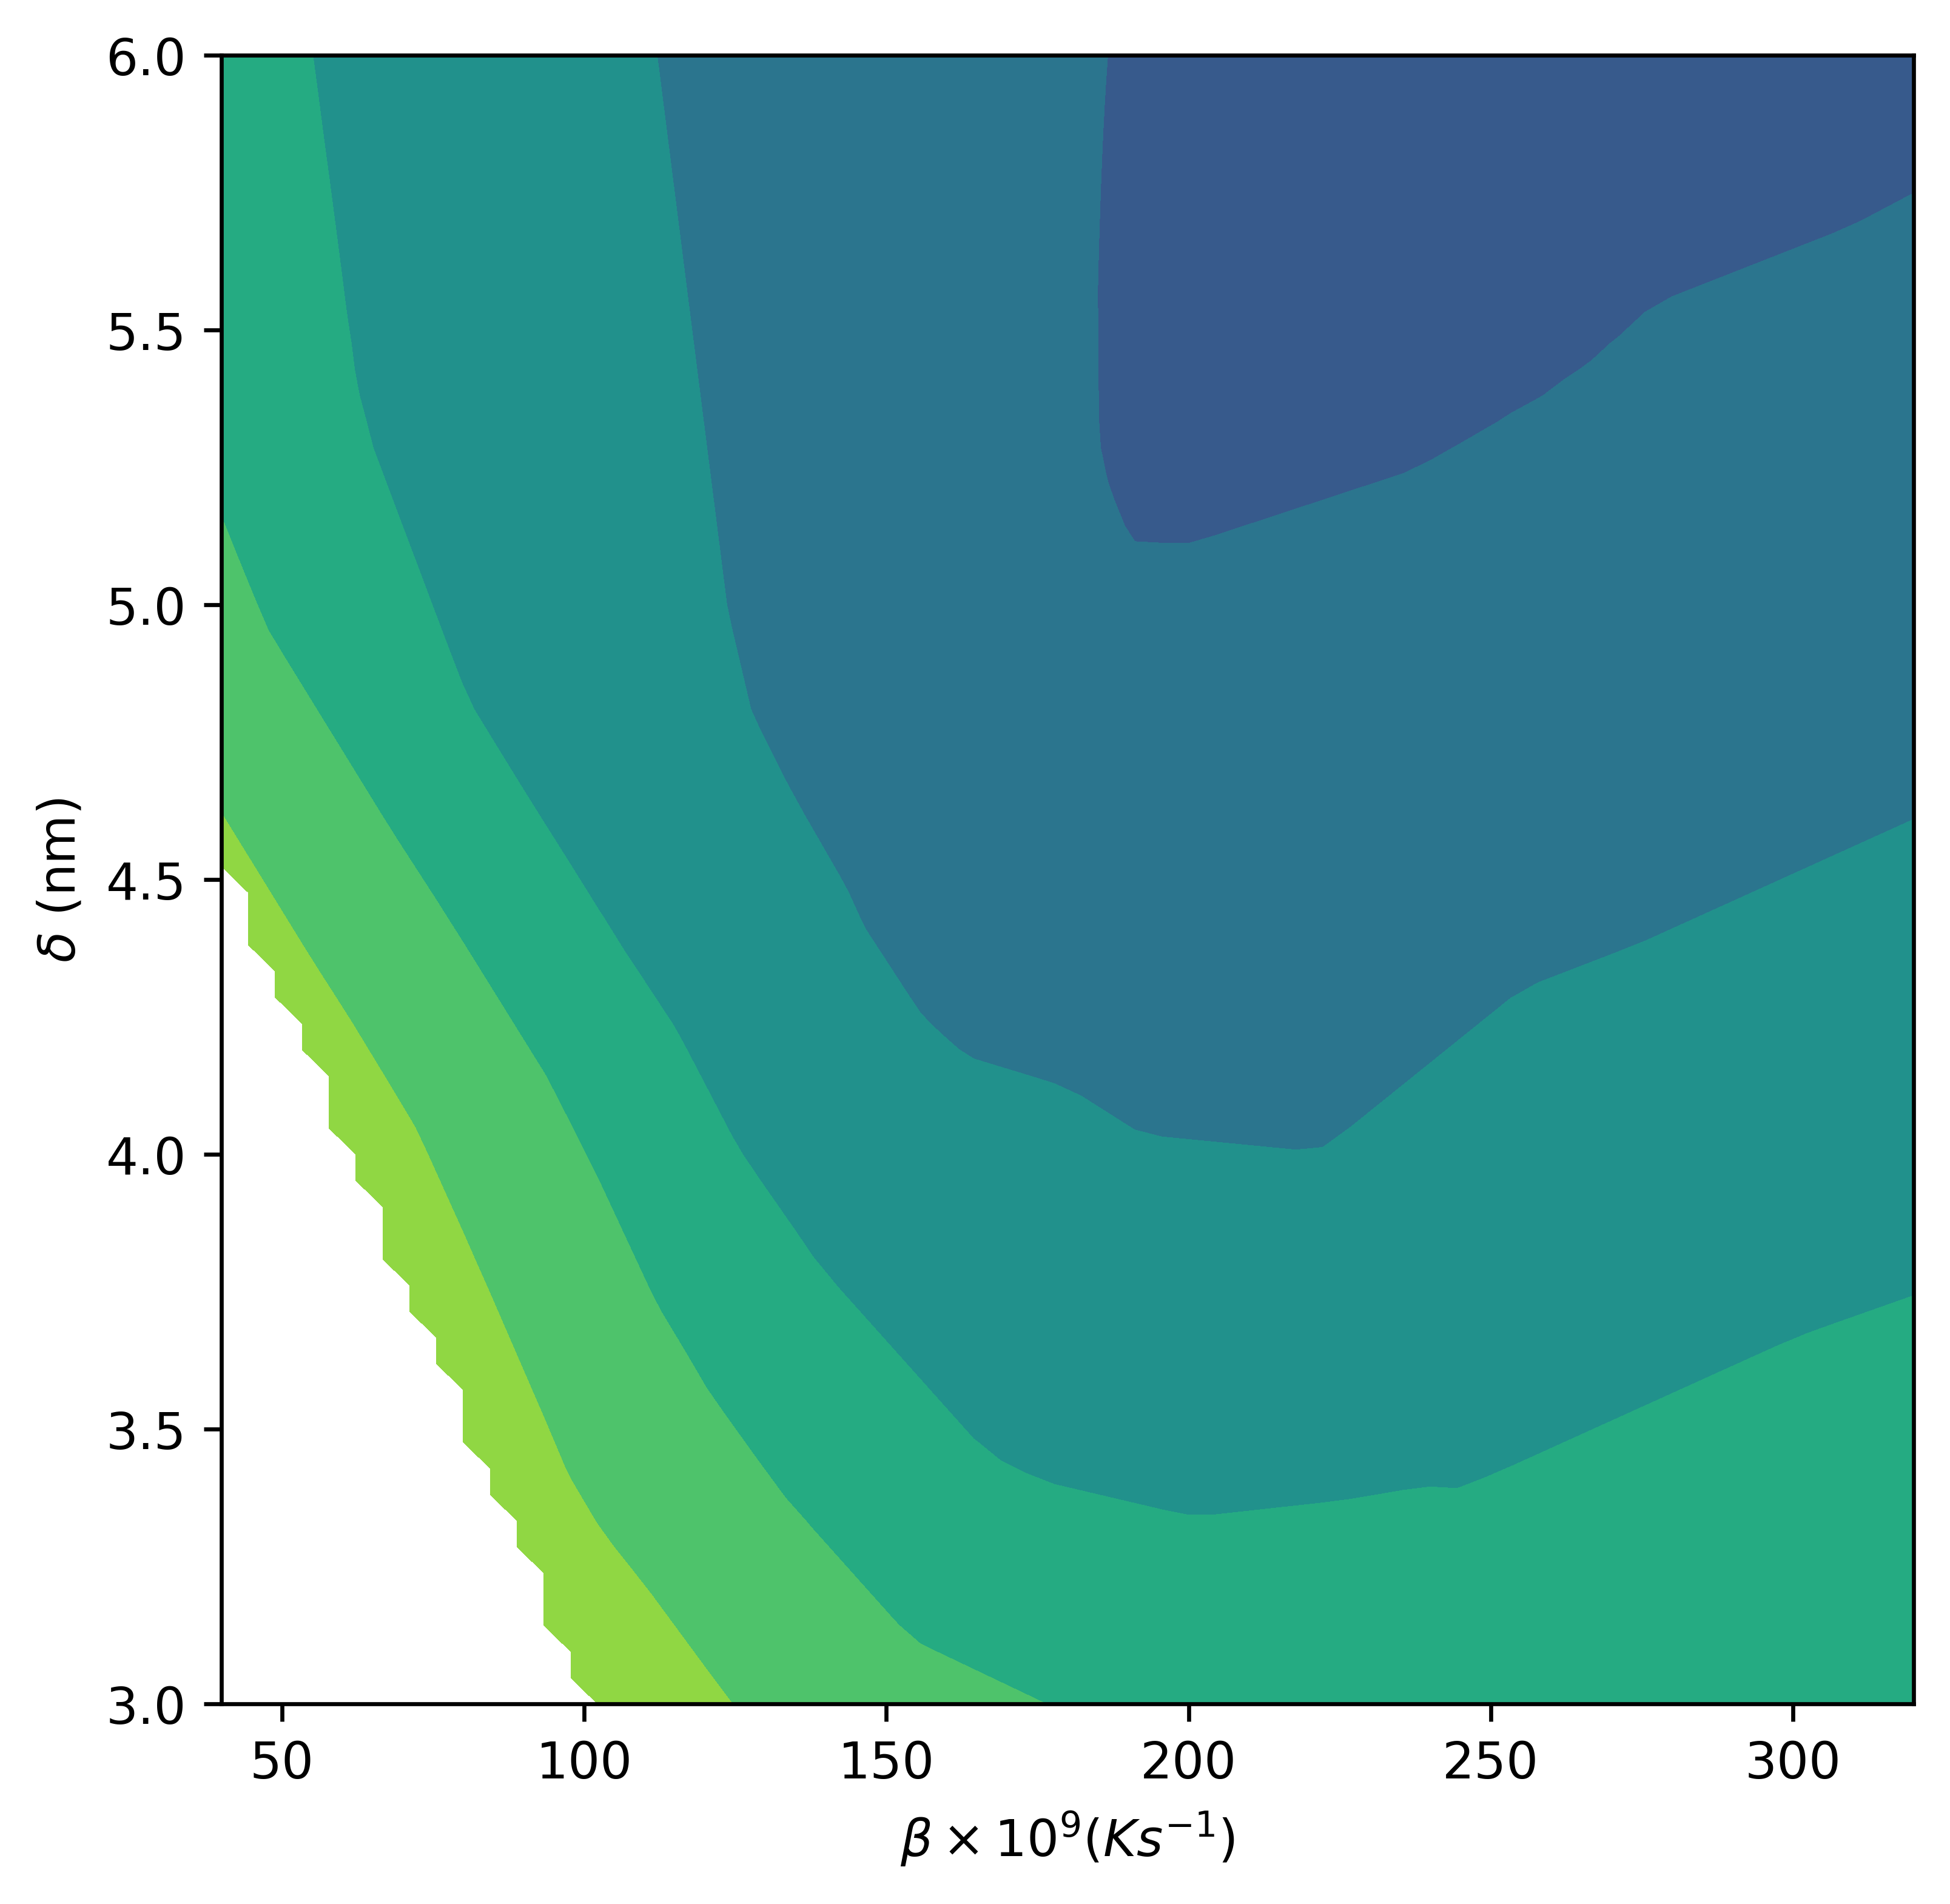

In [ ]:
for i in np.arange(0.5,4.5,0.5):
  pltNe = i
  pltX = X_grid[Ne_grid==pltNe].reshape(64,64)
  pltY = Y_grid[Ne_grid==pltNe].reshape(64,64)
  Z_liquid[logit_Z==0] = np.nan
  pltZ = Z_liquid[Ne_grid==pltNe].reshape(64,64)
  image4 = plt.figure(figsize=(6,6), dpi = 600)
  cp = plt.contourf(pltX, pltY, pltZ,np.linspace(117,162,10))
  #plt.colorbar(cp)
  plt.xlabel(r'$\beta \times 10^9 (Ks^{-1})$')
  plt.ylabel(r'$\delta$ (nm)')
  plt.show()
  image4.savefig('/content/drive/MyDrive/Rice Google Drive/Research/Misc/Leidenfrost_ML/Figures/TArgon_Ne='+str(pltNe)+'.png',  bbox_inches="tight")

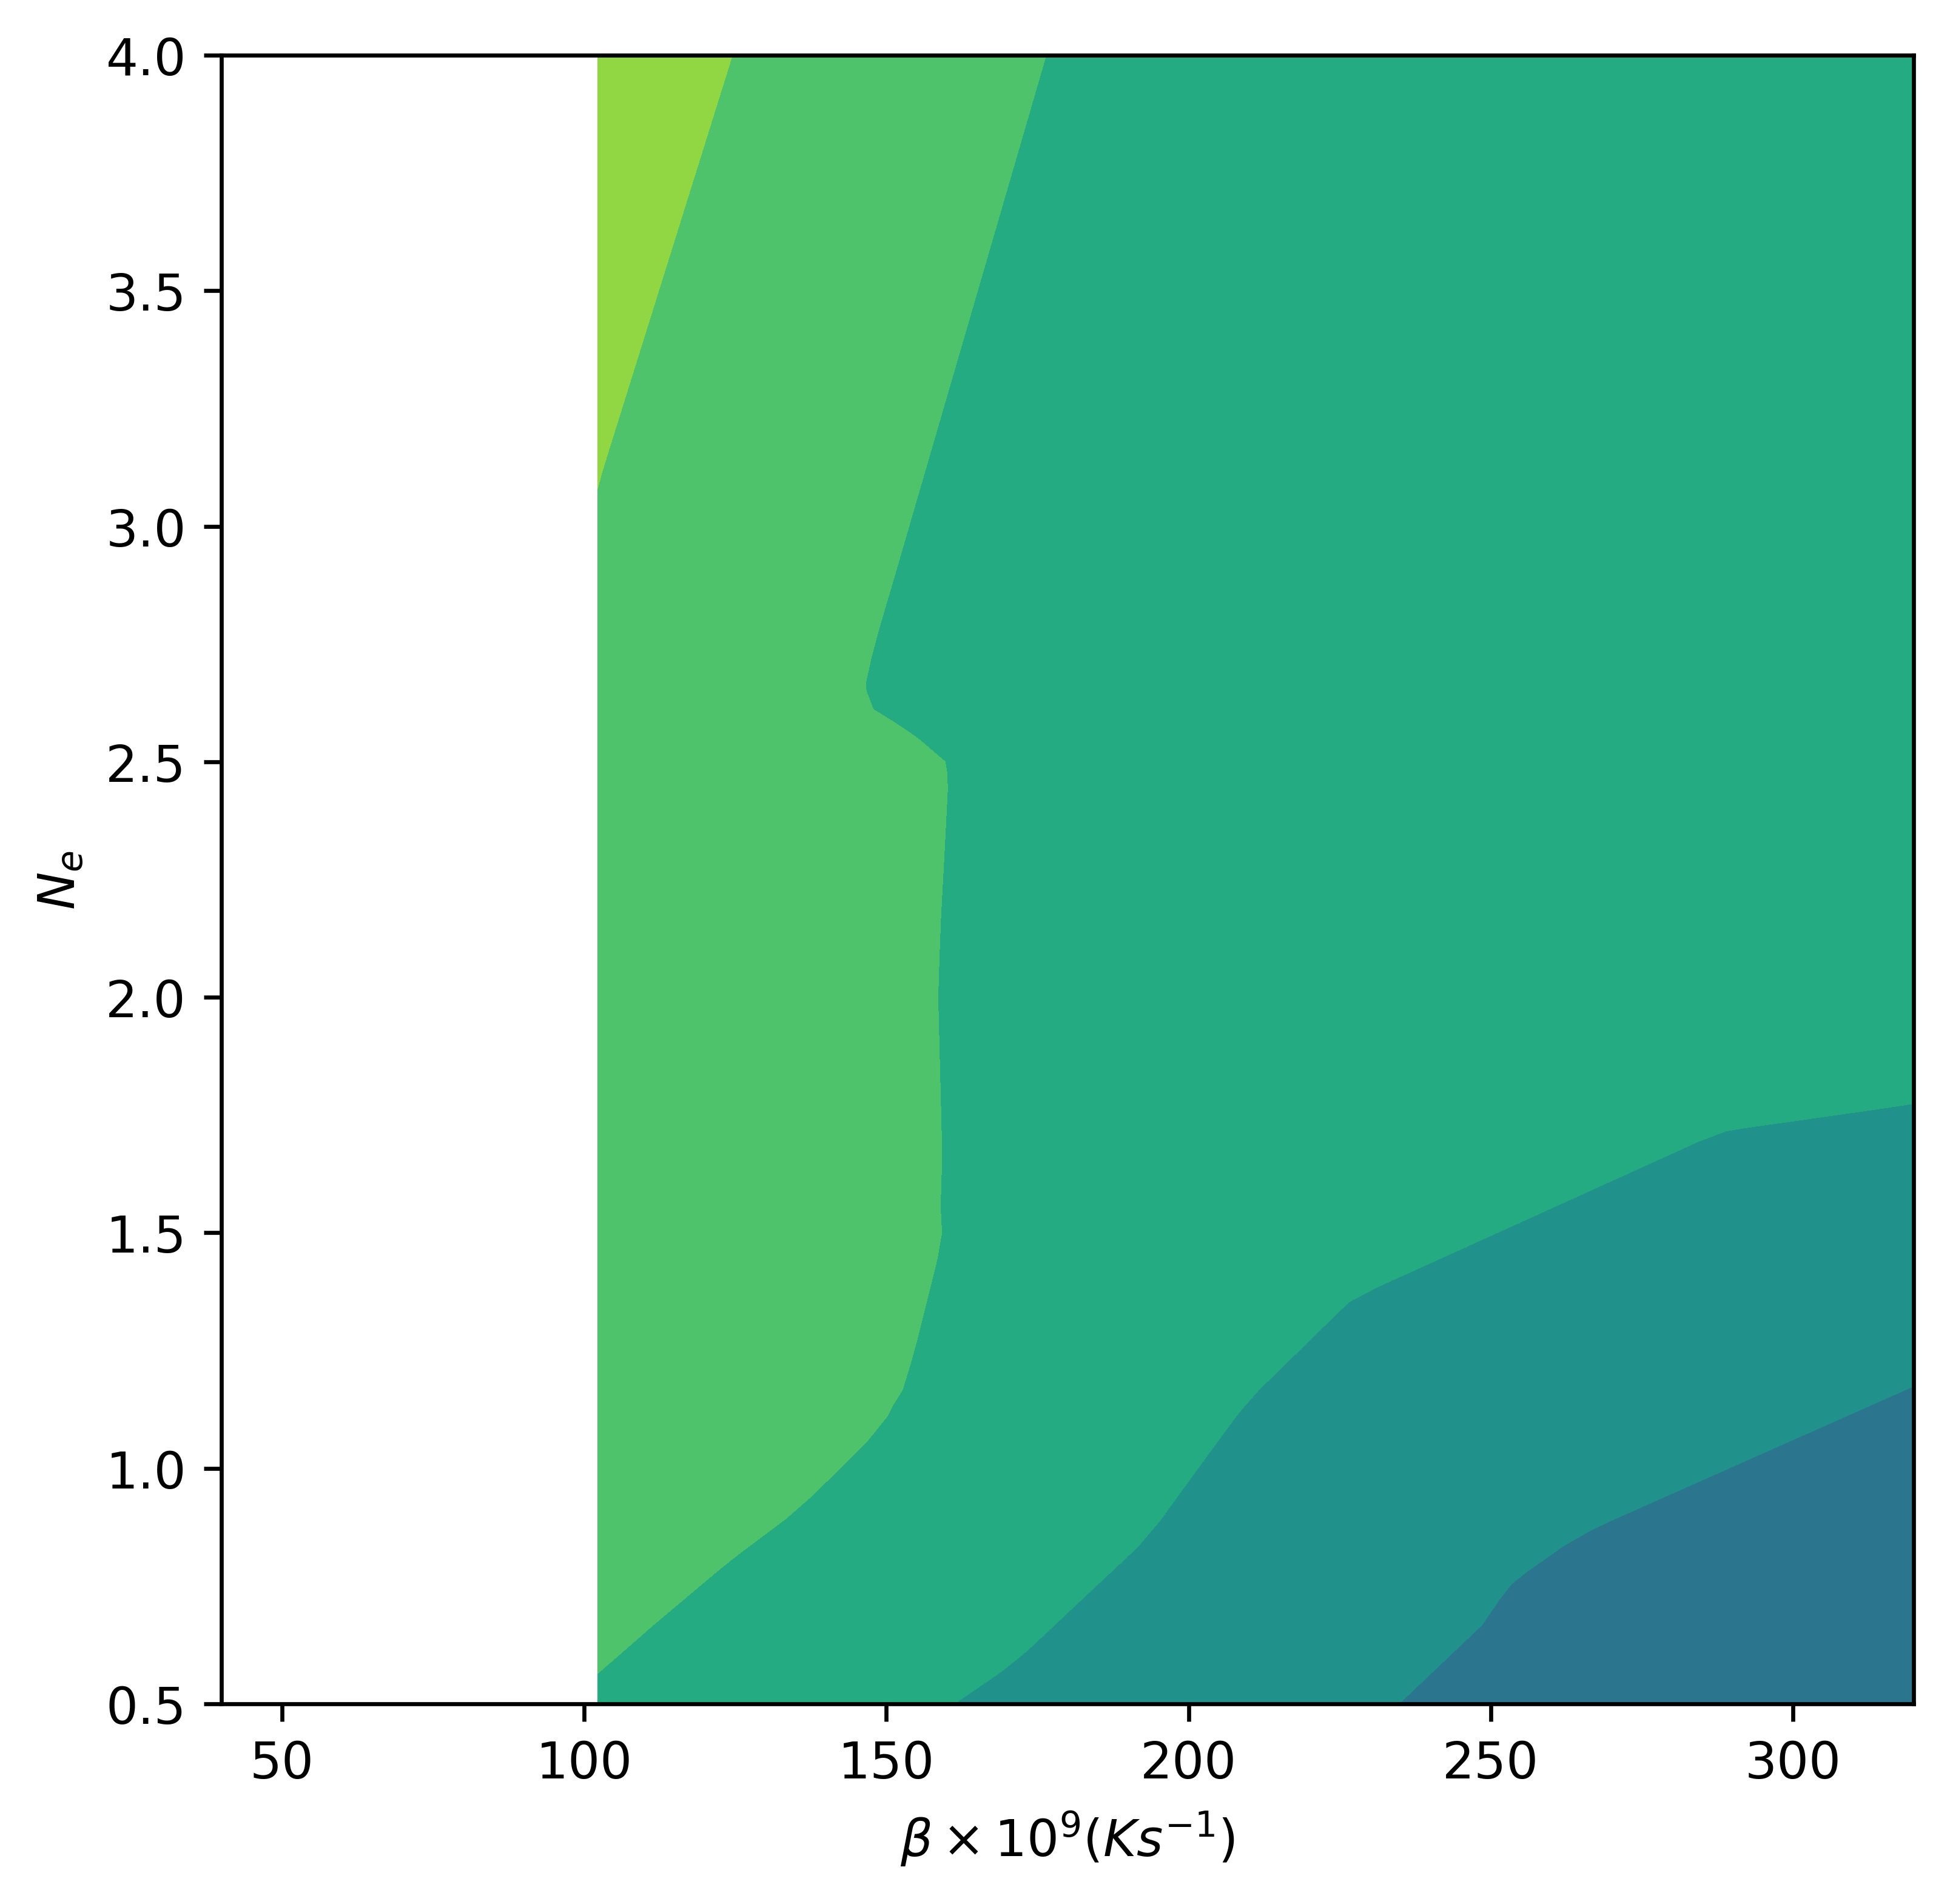

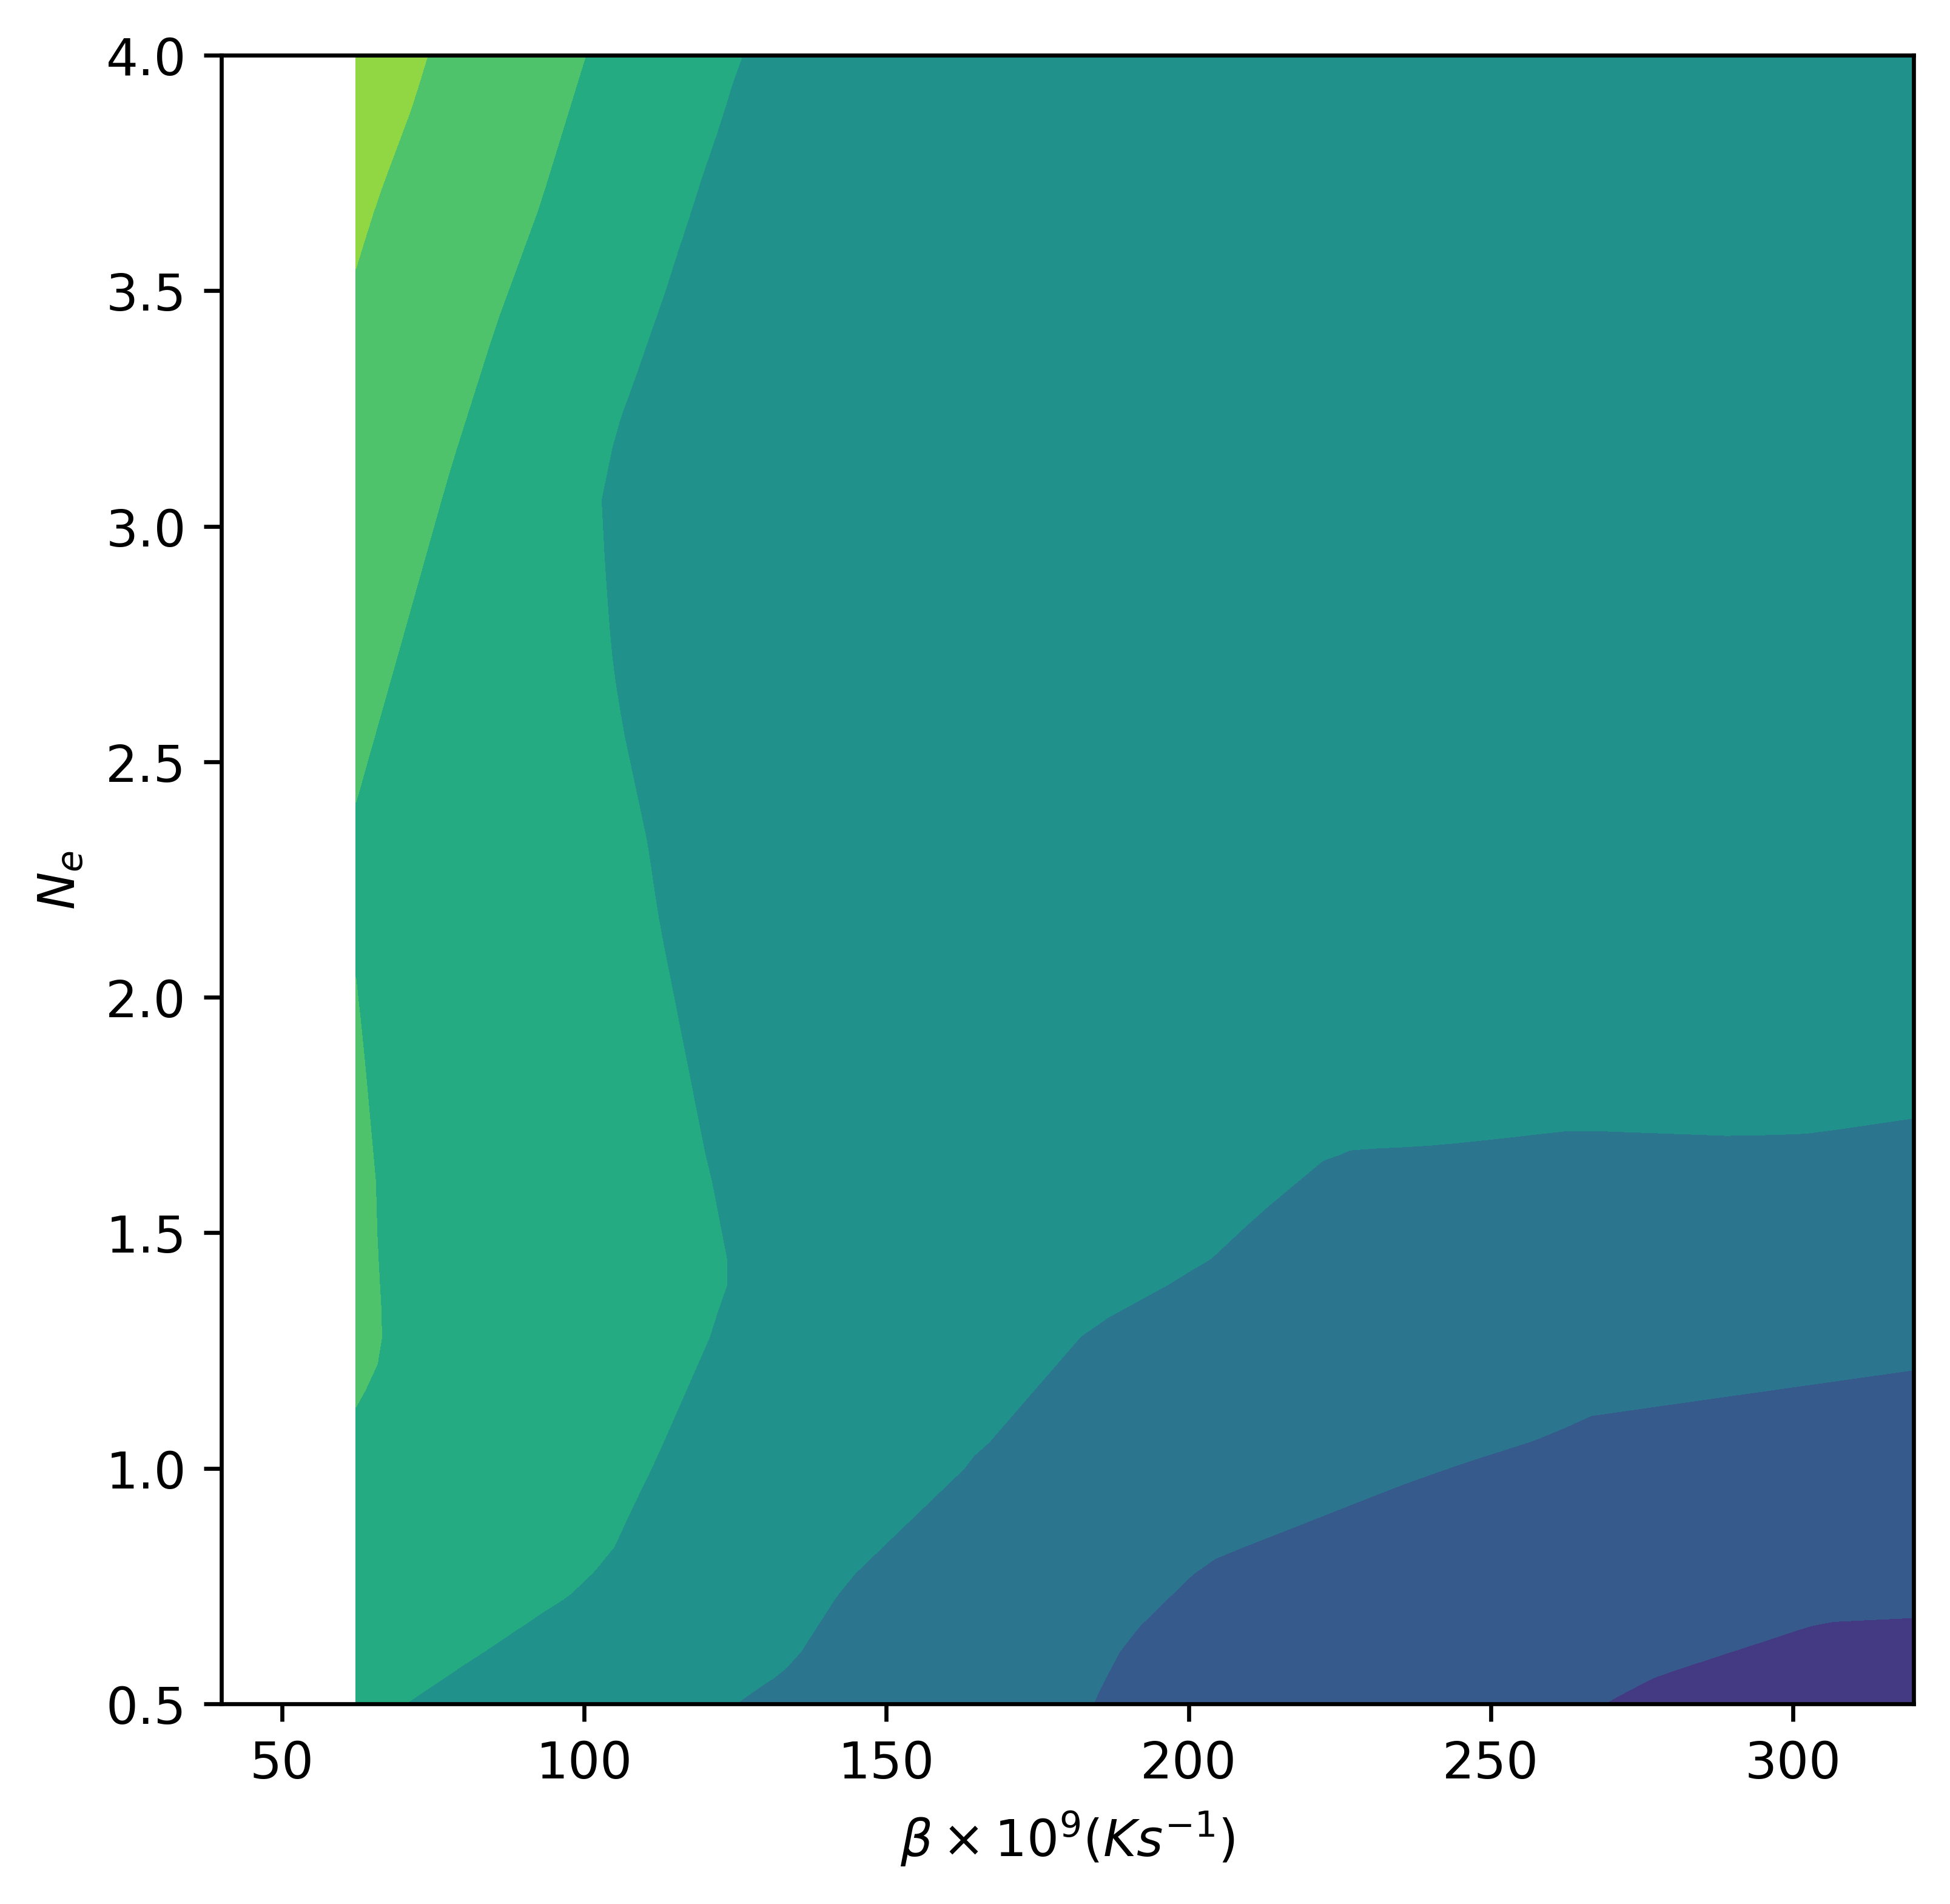

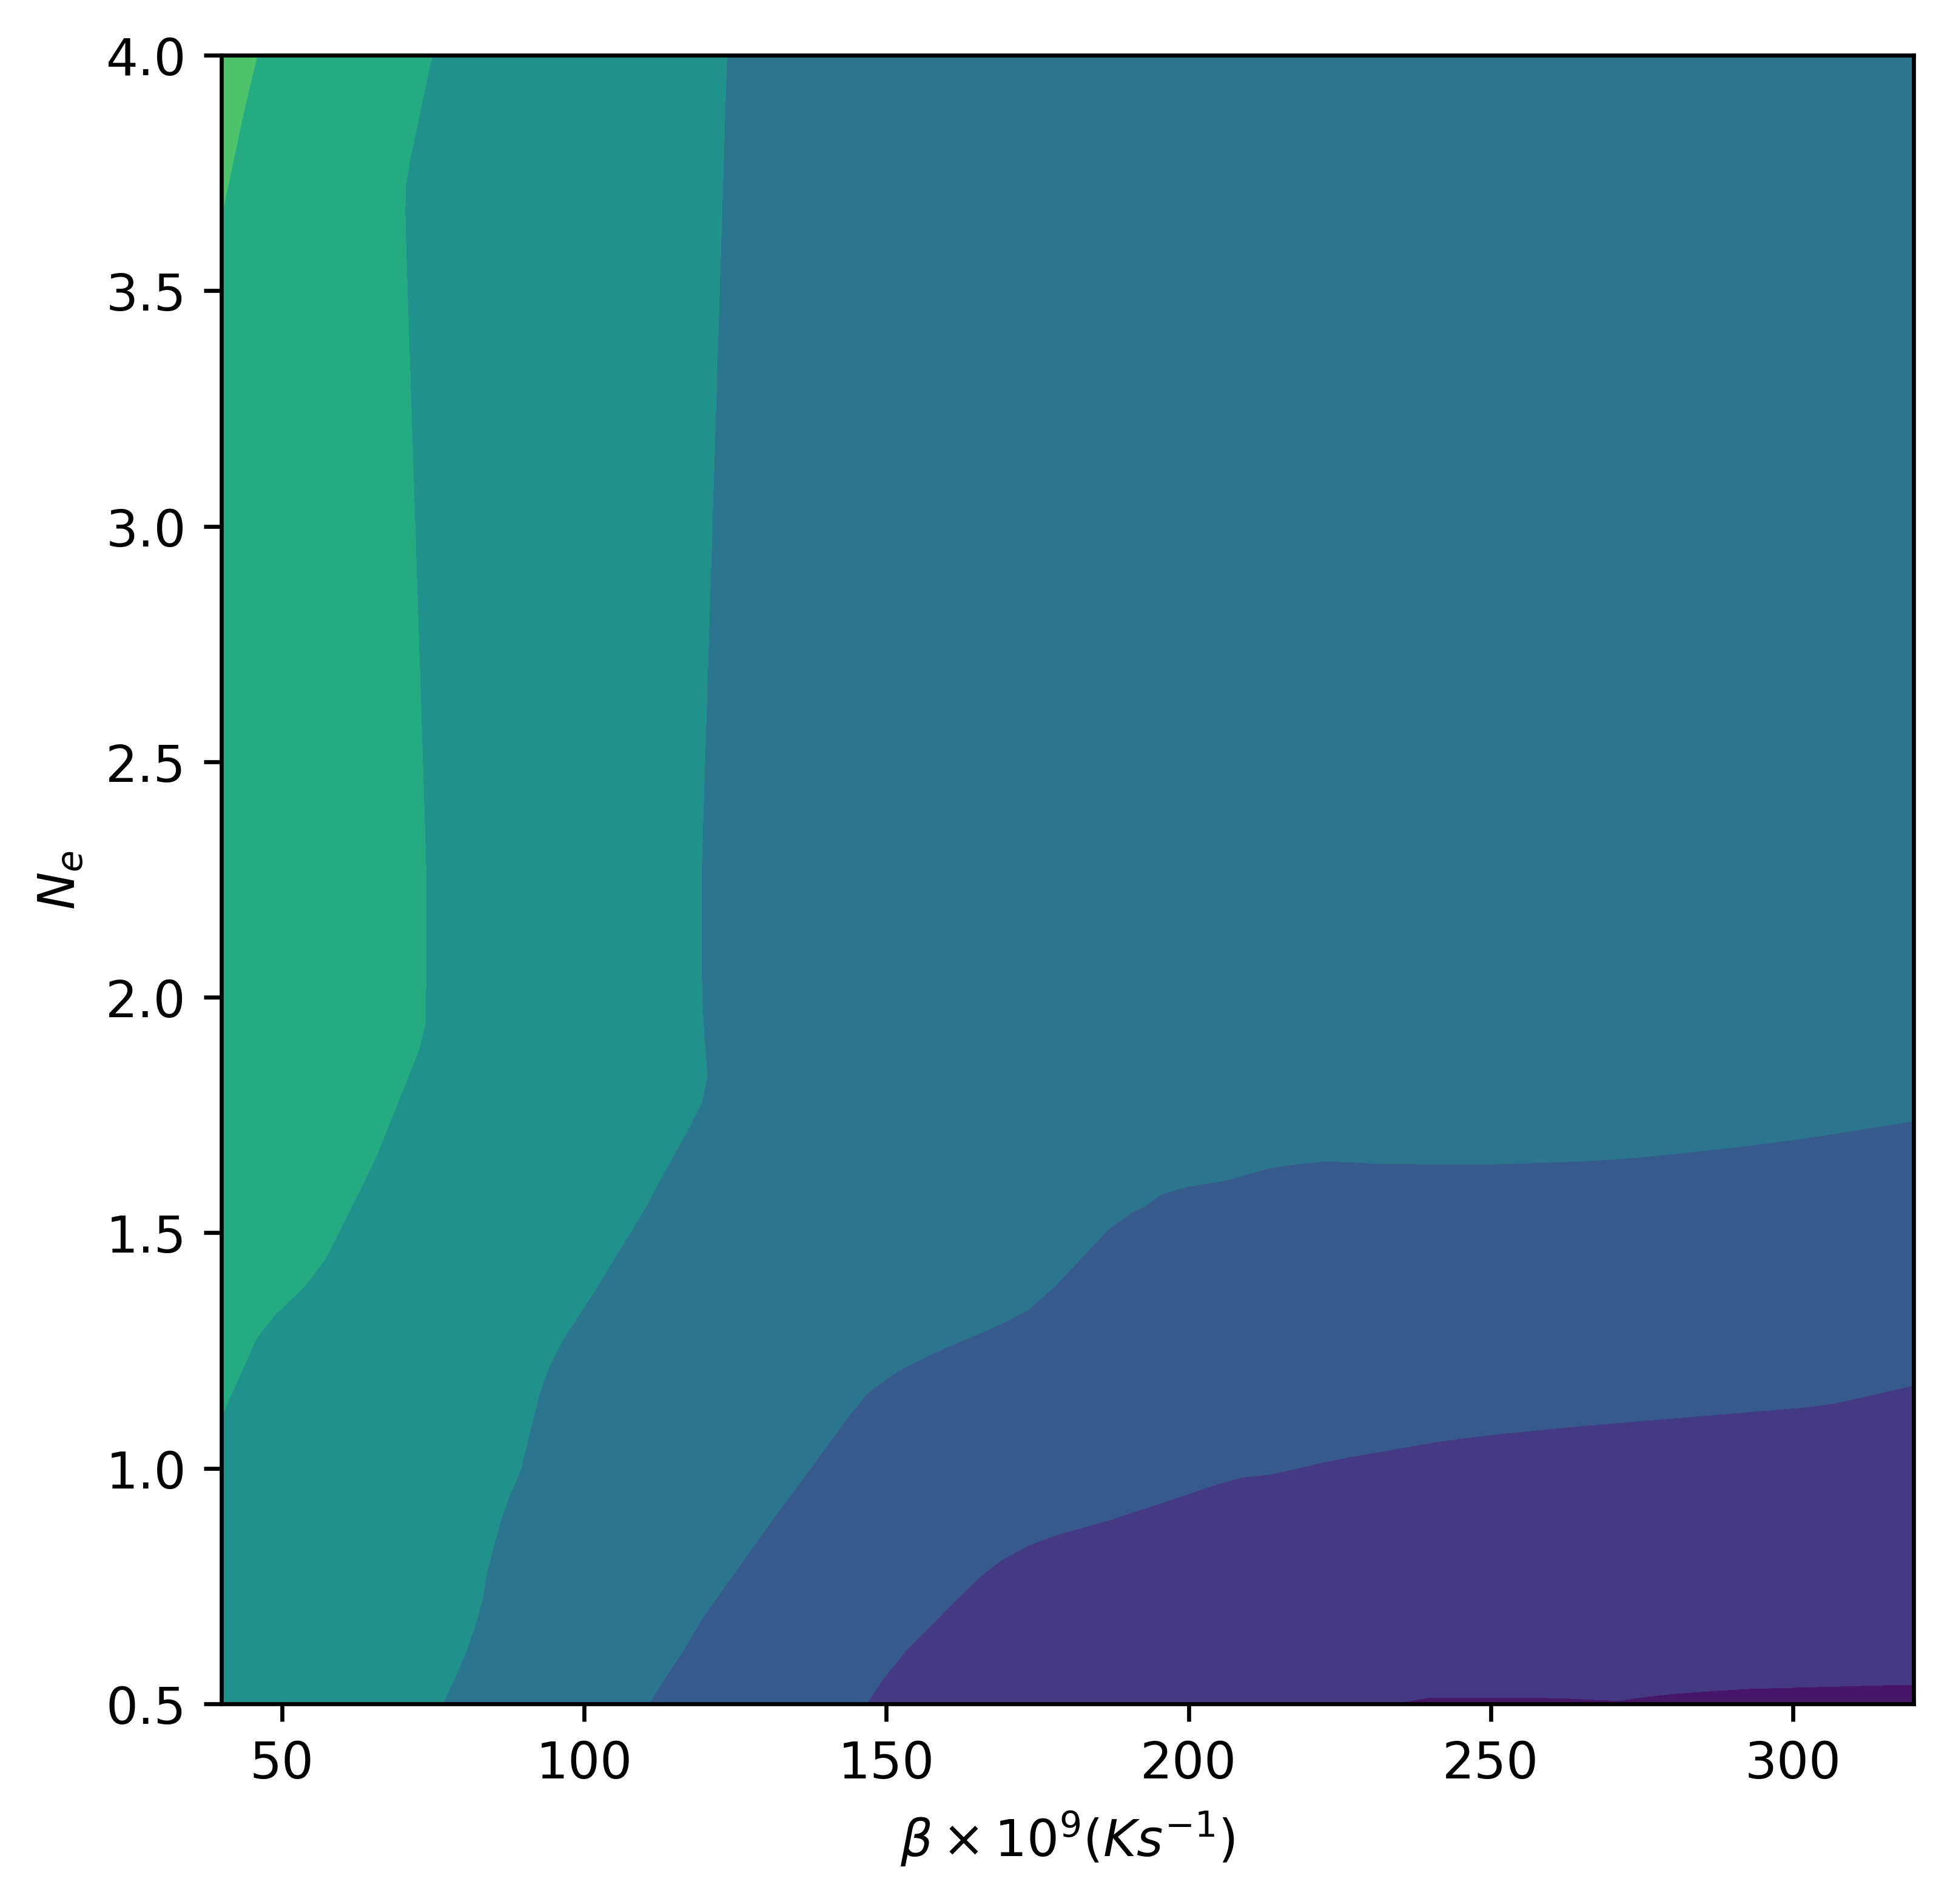

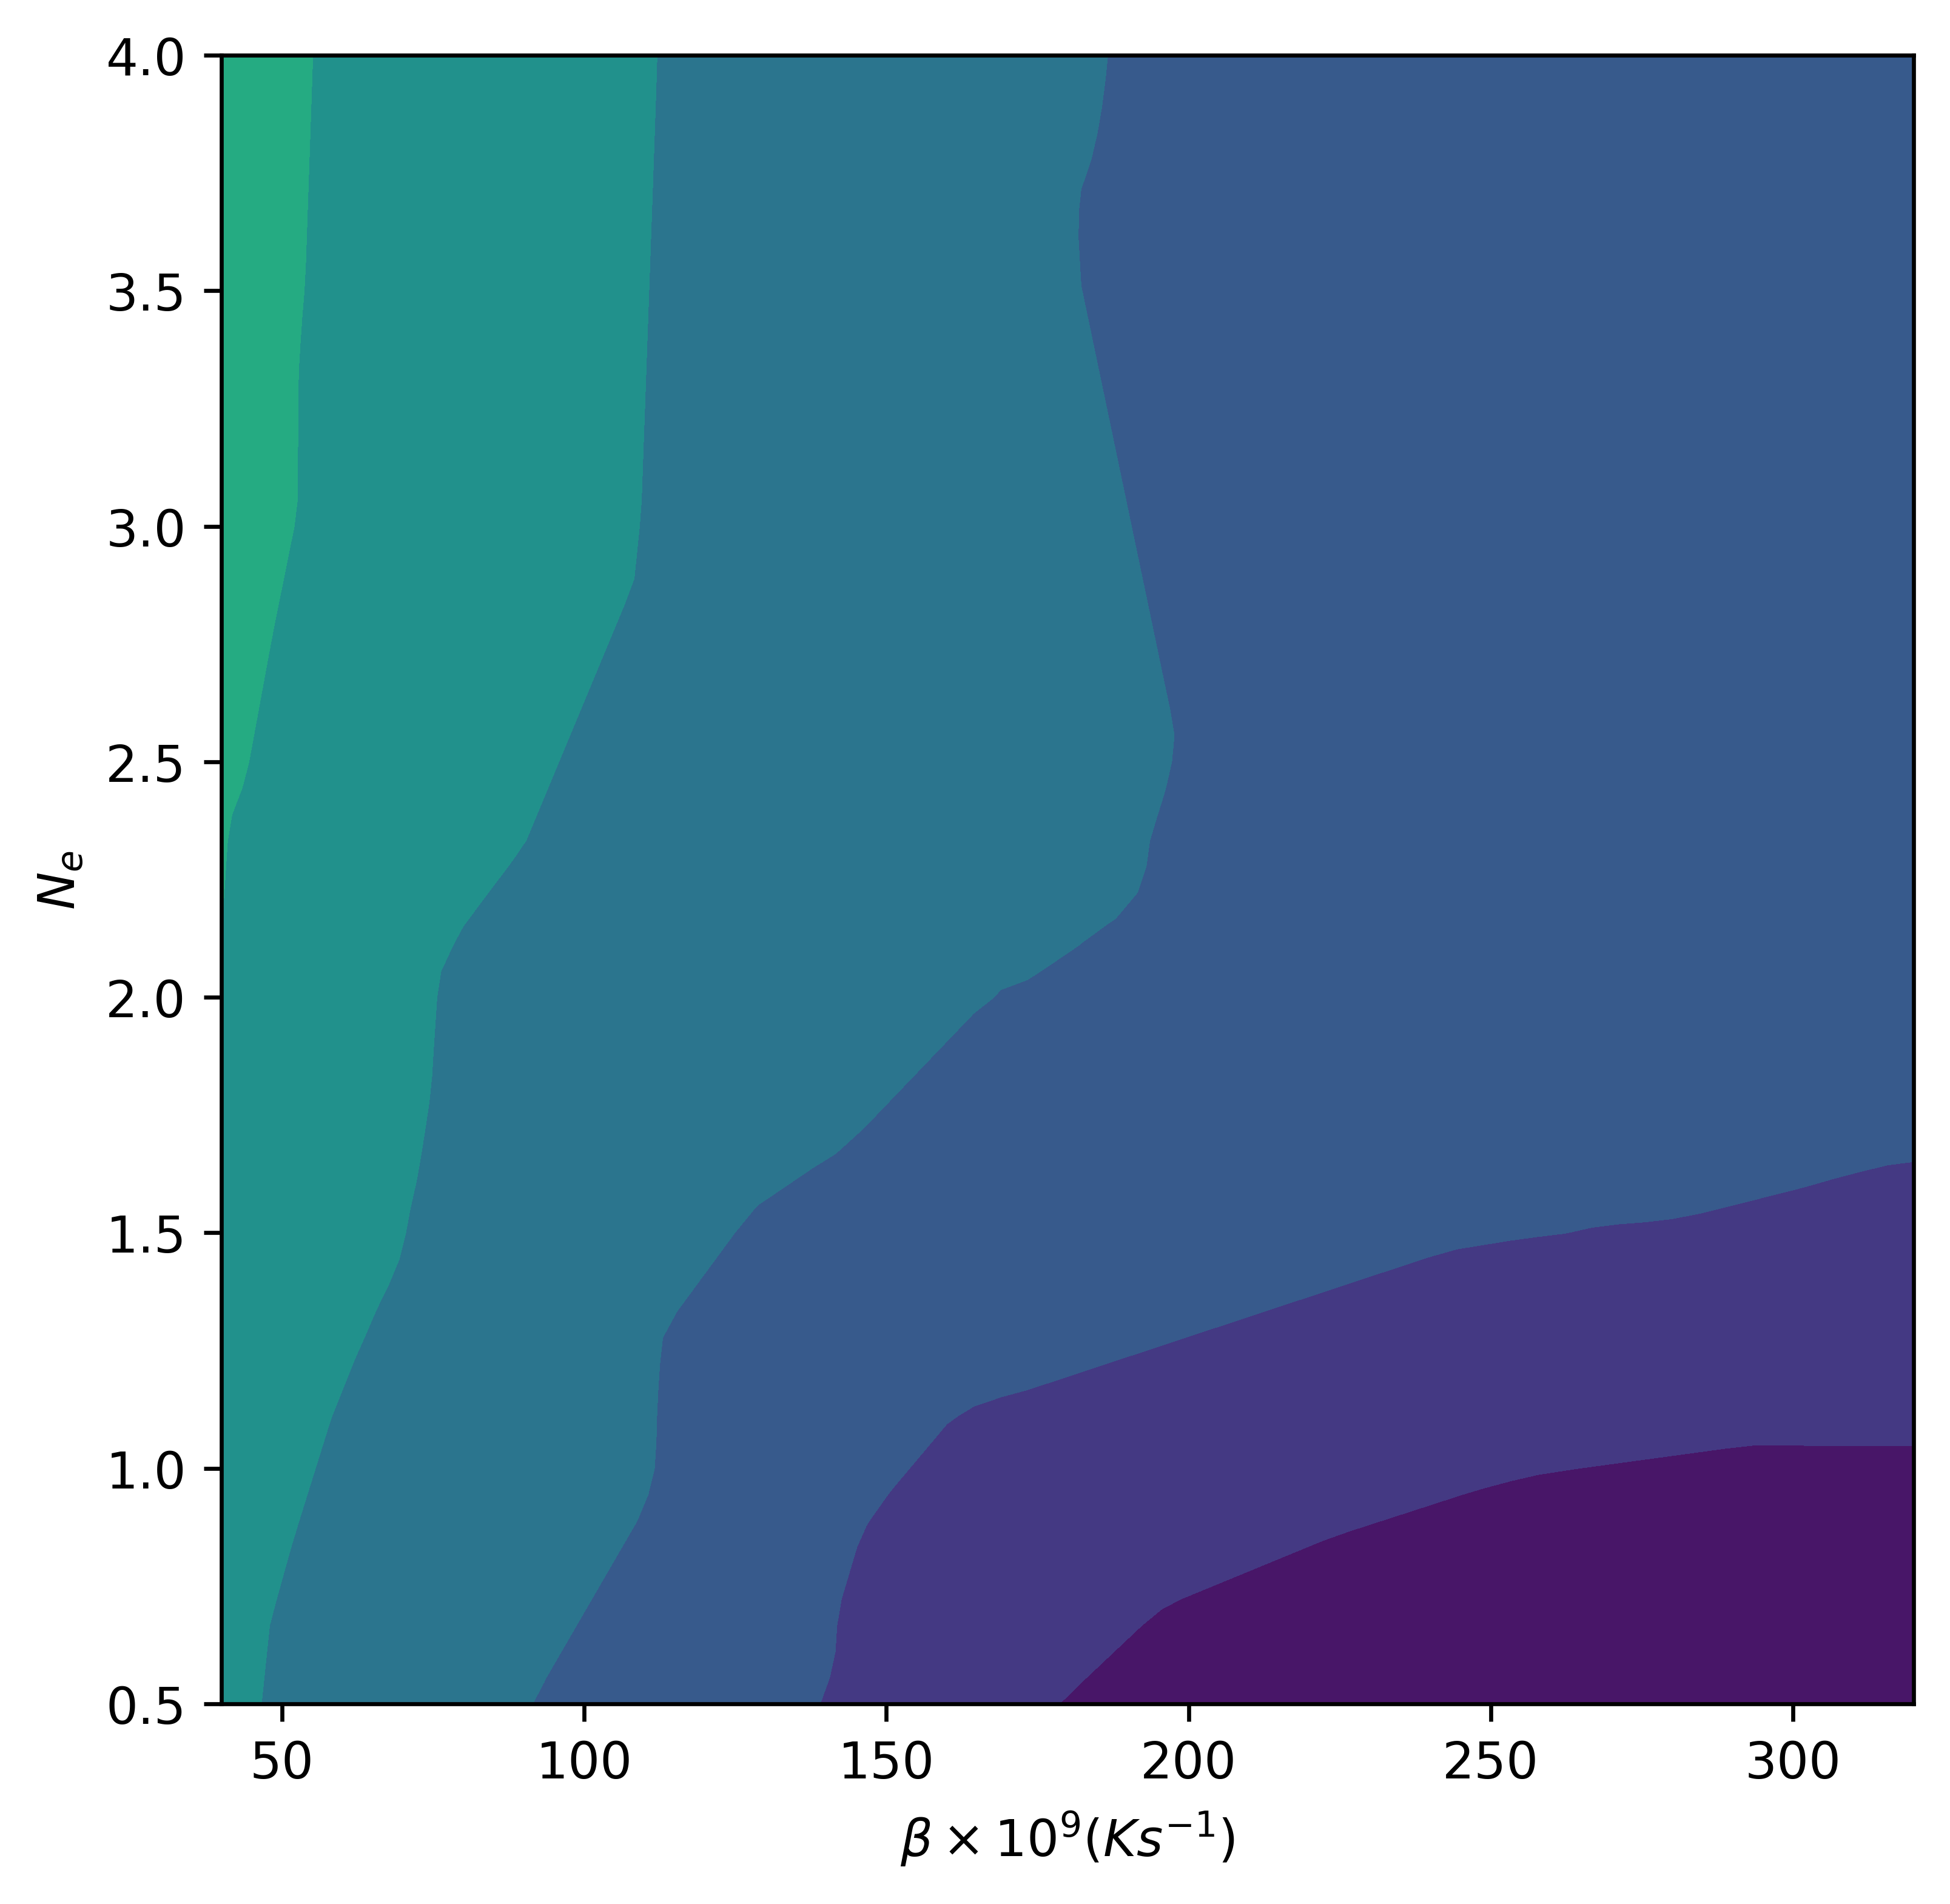

In [ ]:
for i in np.arange(3,7,1):
  pltNe = i
  pltX = X_grid[Y_grid==pltNe].reshape(64,64)
  pltY = Ne_grid[Y_grid==pltNe].reshape(64,64)
  pltZ = Z_liquid[Y_grid==pltNe].reshape(64,64)
  image4 = plt.figure(figsize=(6,6), dpi = 600)
  cp = plt.contourf(pltX, pltY, pltZ,np.linspace(117,162,10))
  #plt.colorbar(cp)
  plt.xlabel(r'$\beta \times 10^9 (Ks^{-1})$')
  plt.ylabel(r'$N_e$')
  plt.show()
  image4.savefig('/content/drive/MyDrive/Rice Google Drive/Research/Misc/Leidenfrost_ML/Figures/TArgon_del='+str(pltNe)+'.png',  bbox_inches="tight")

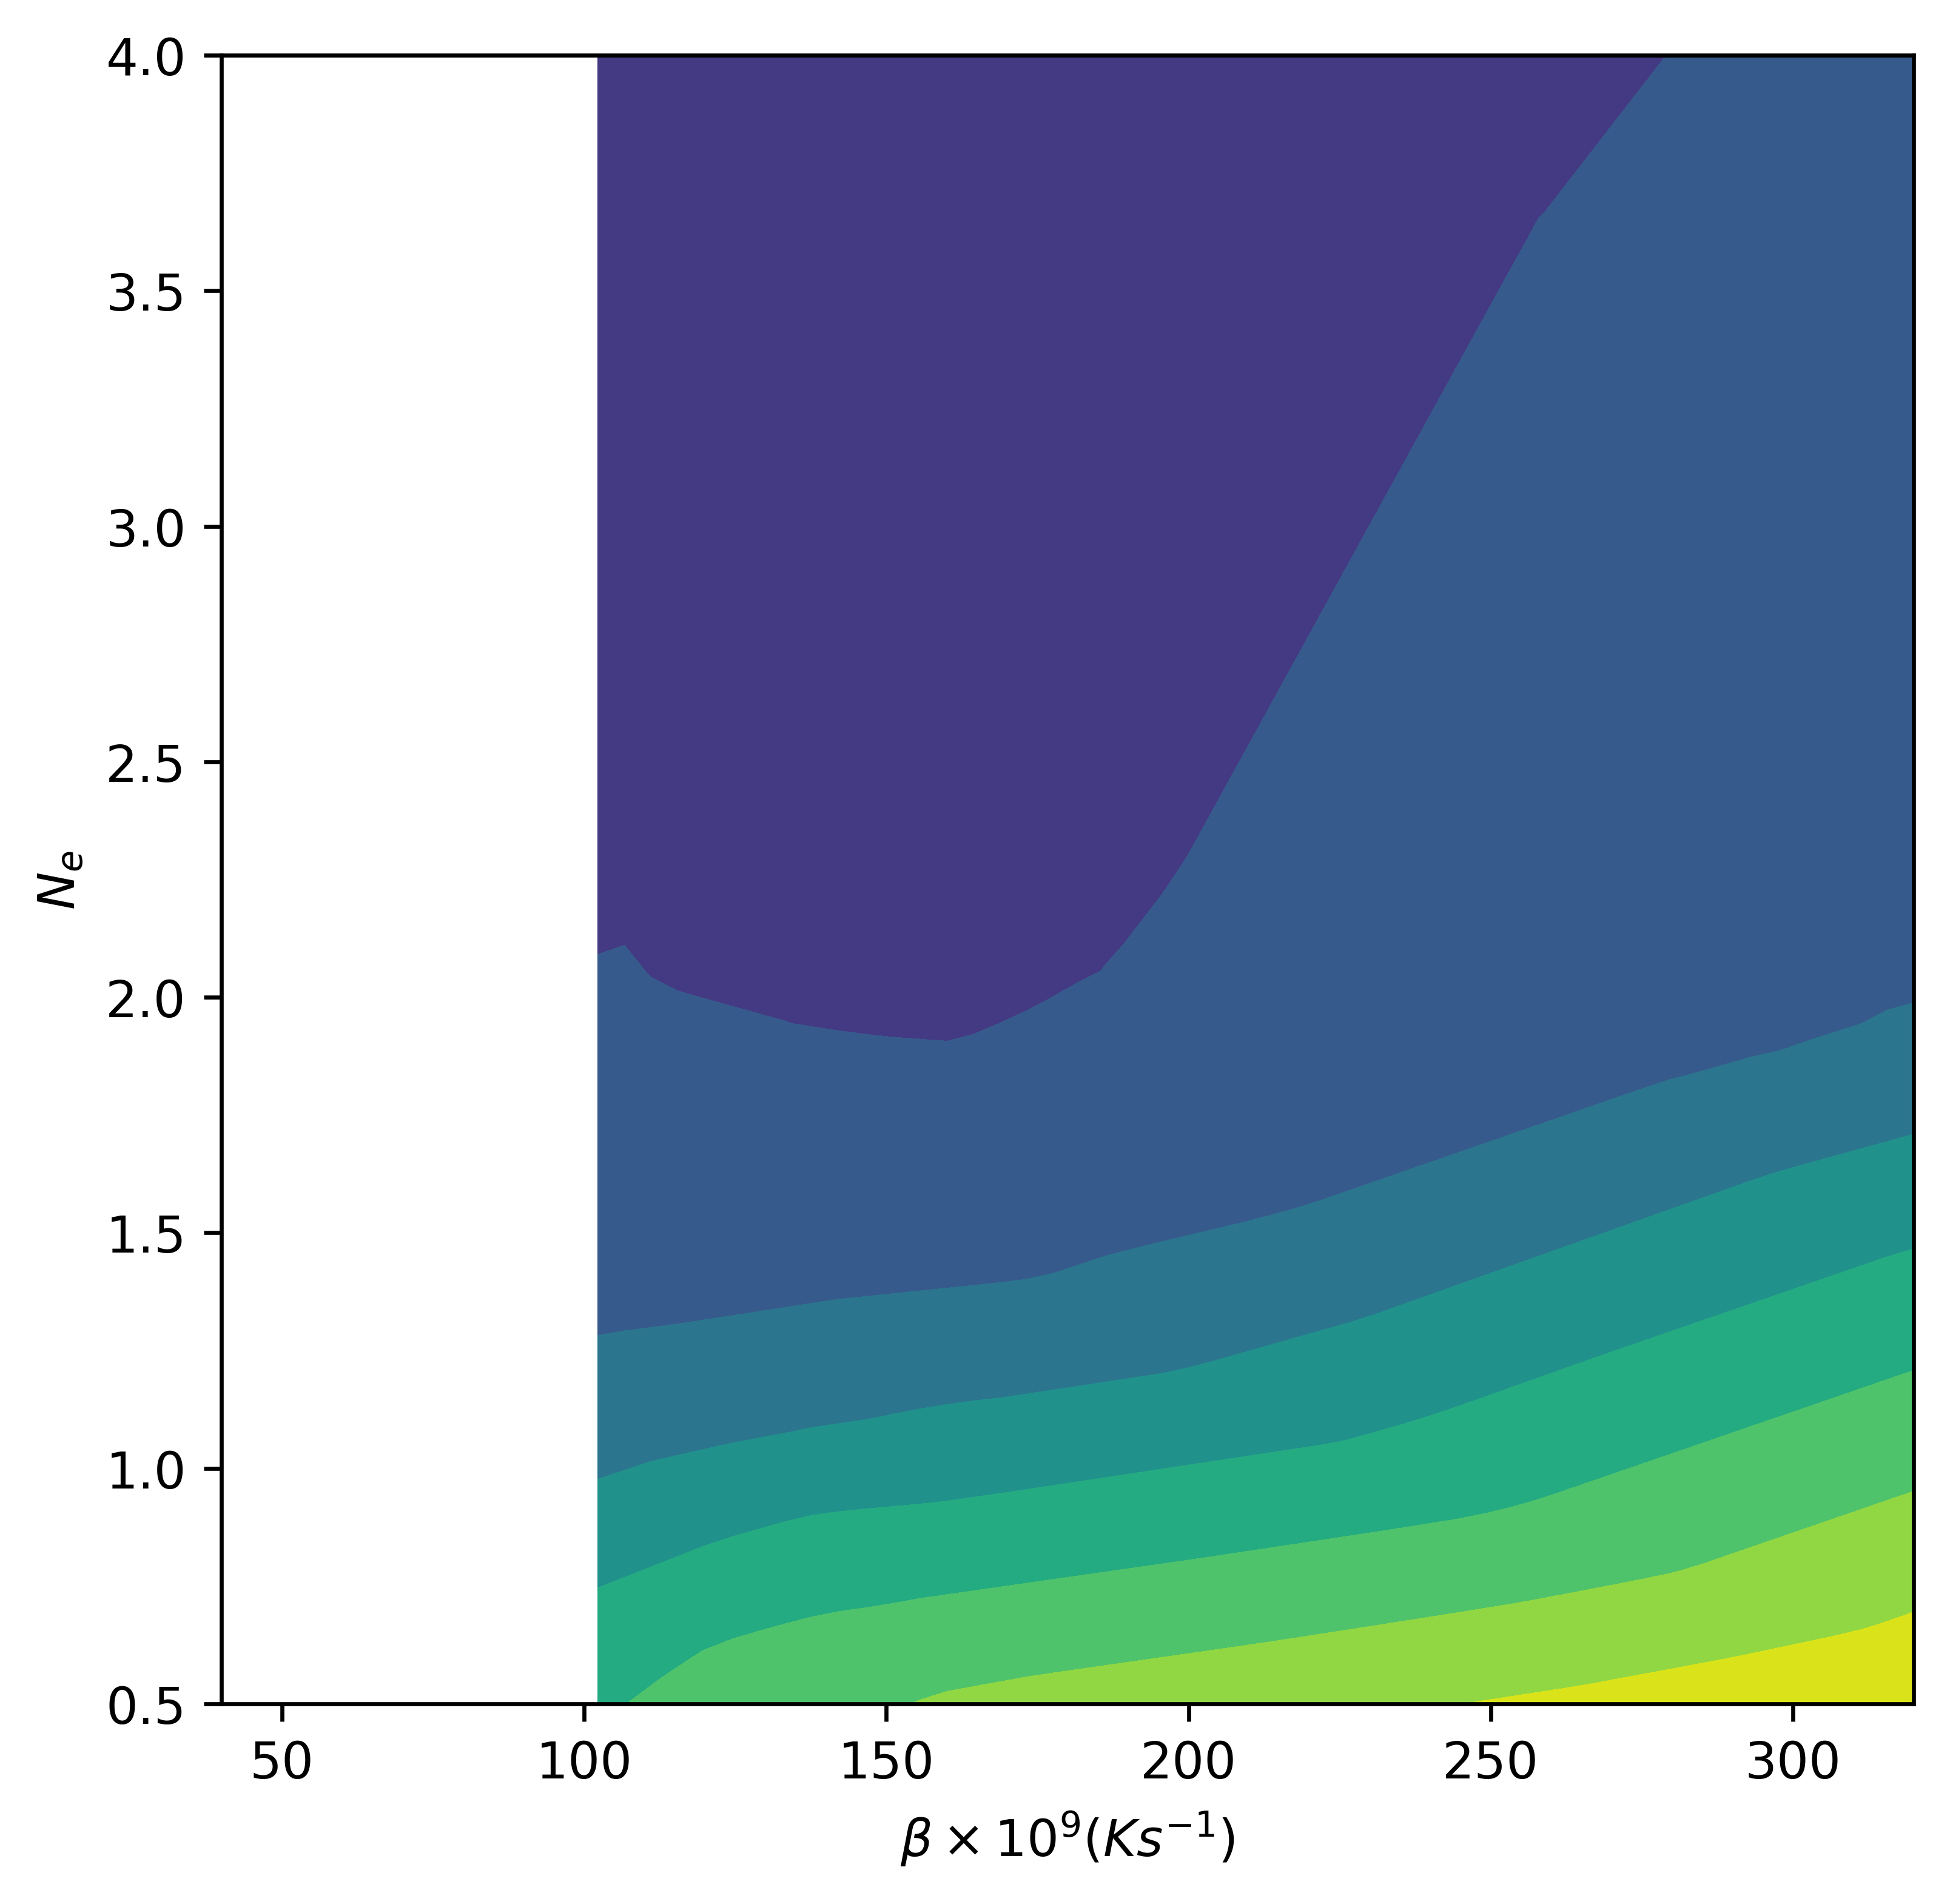

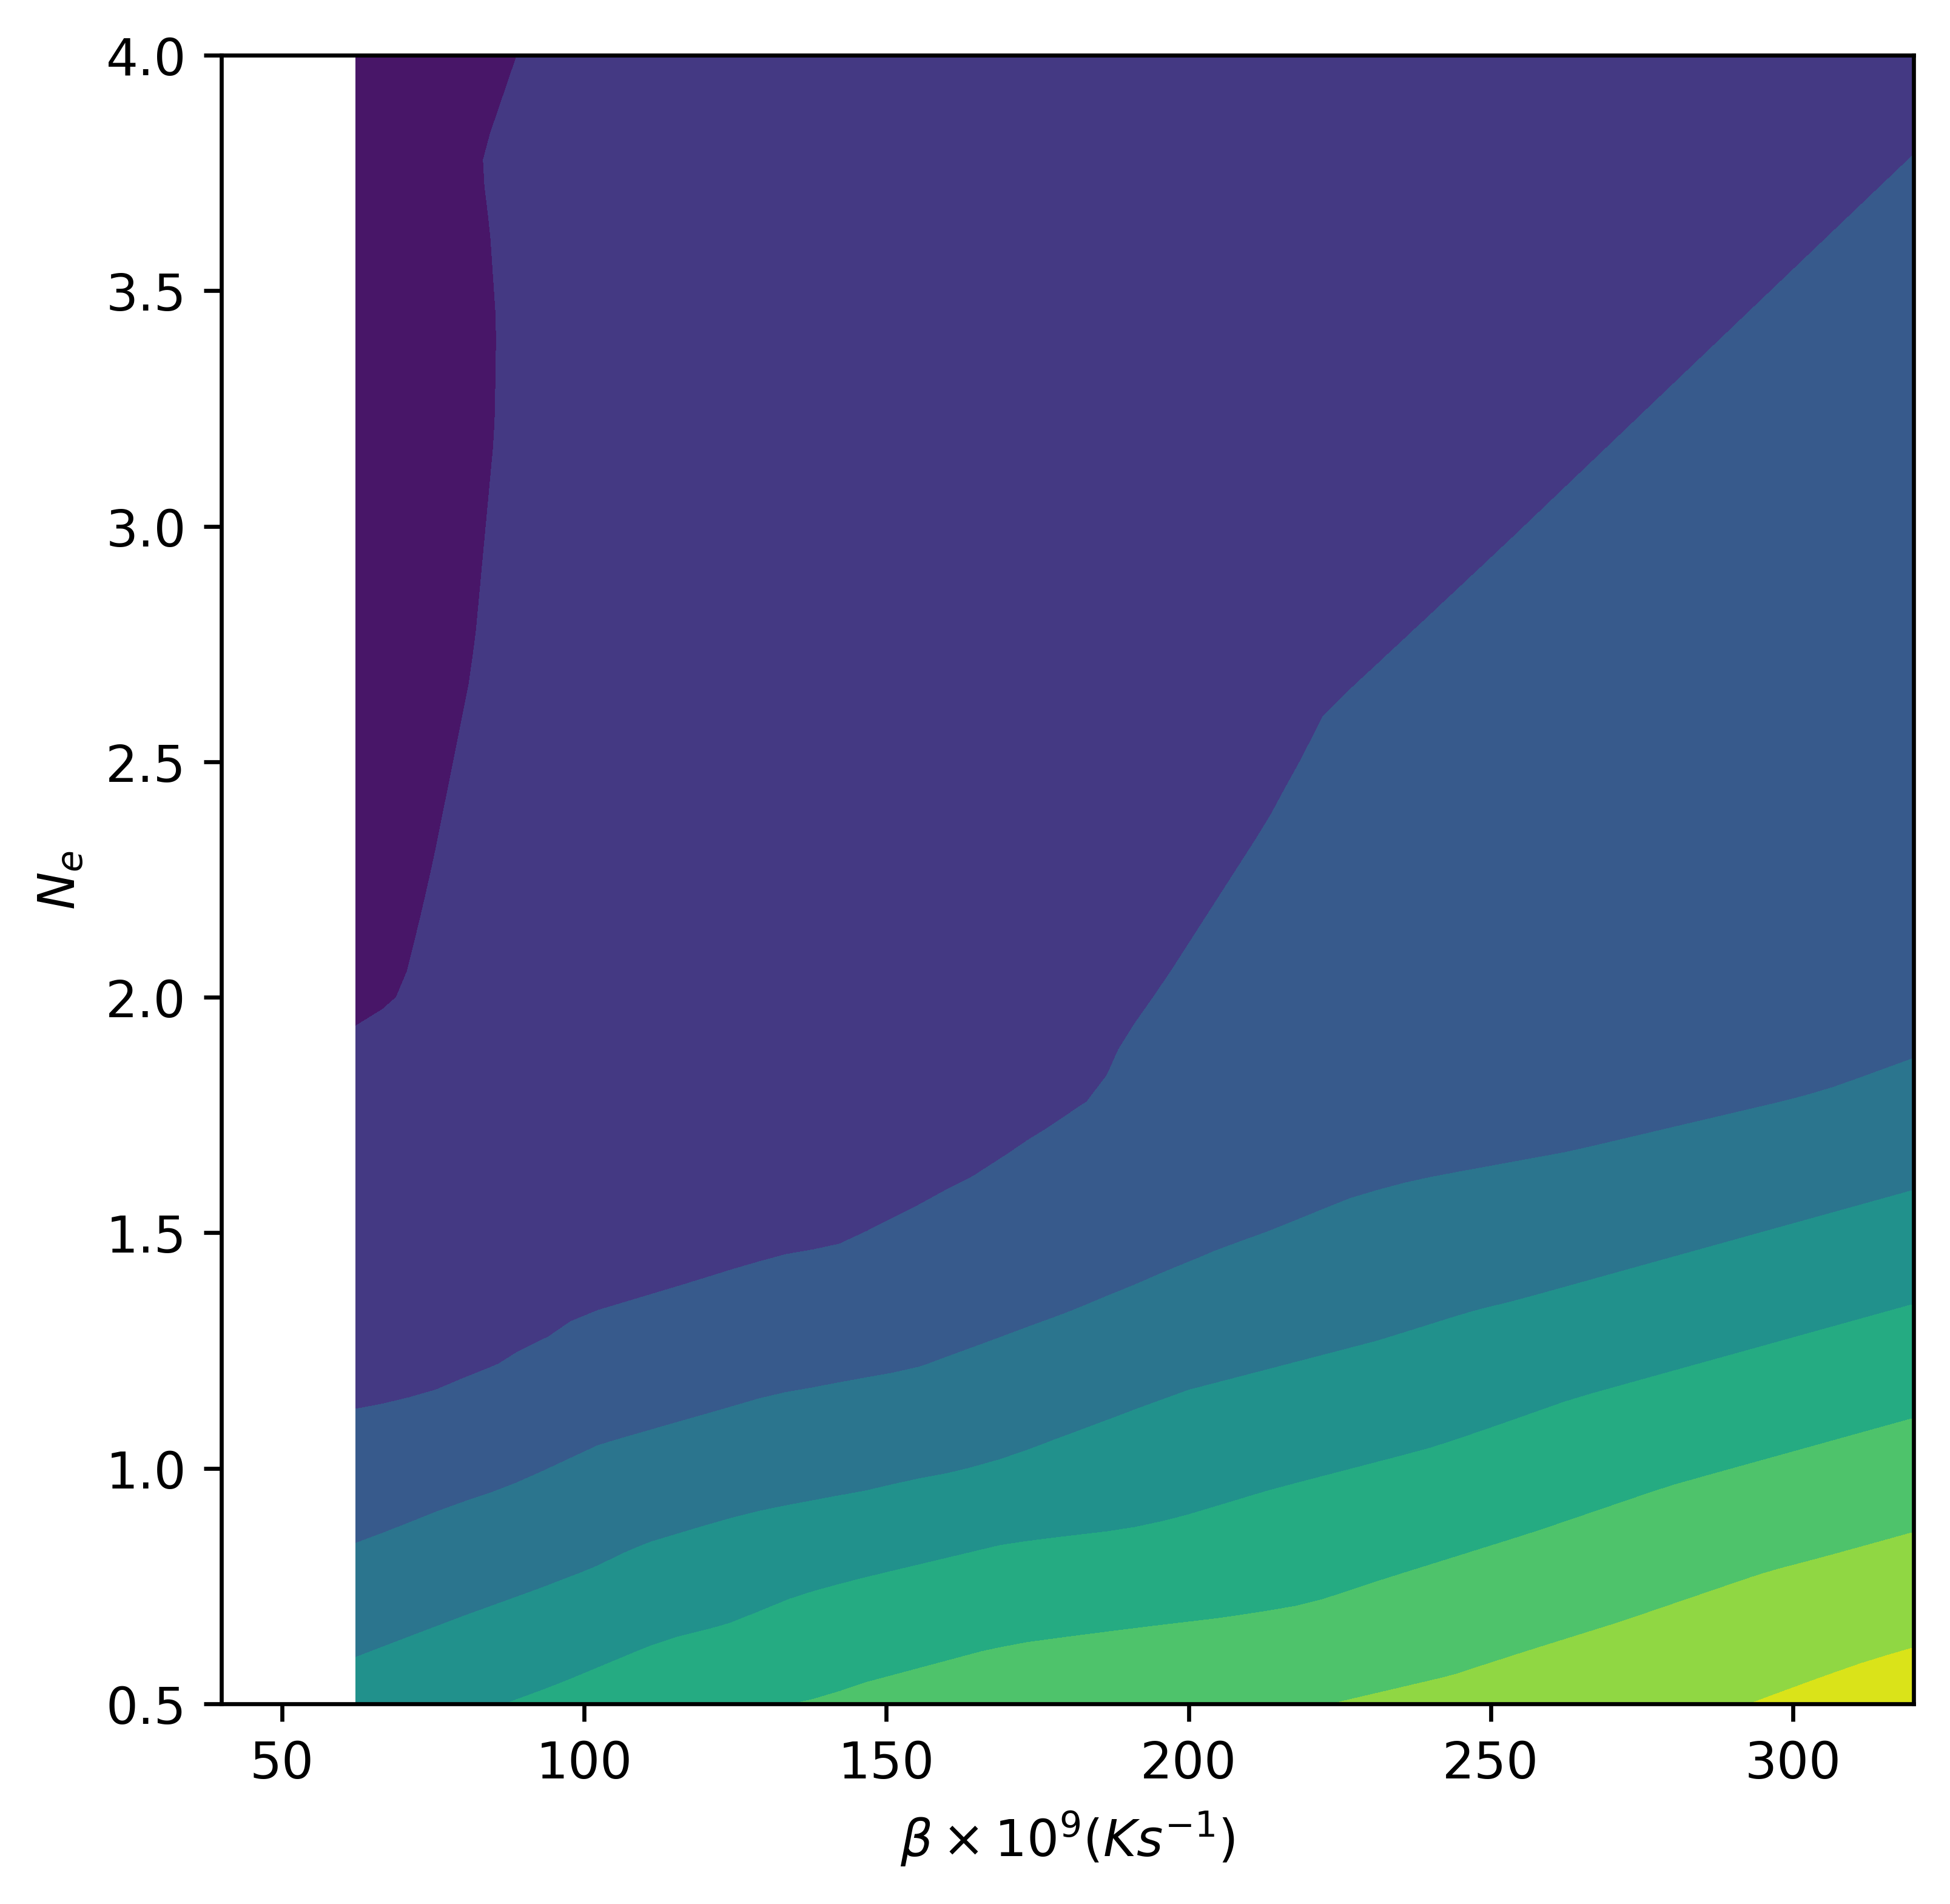

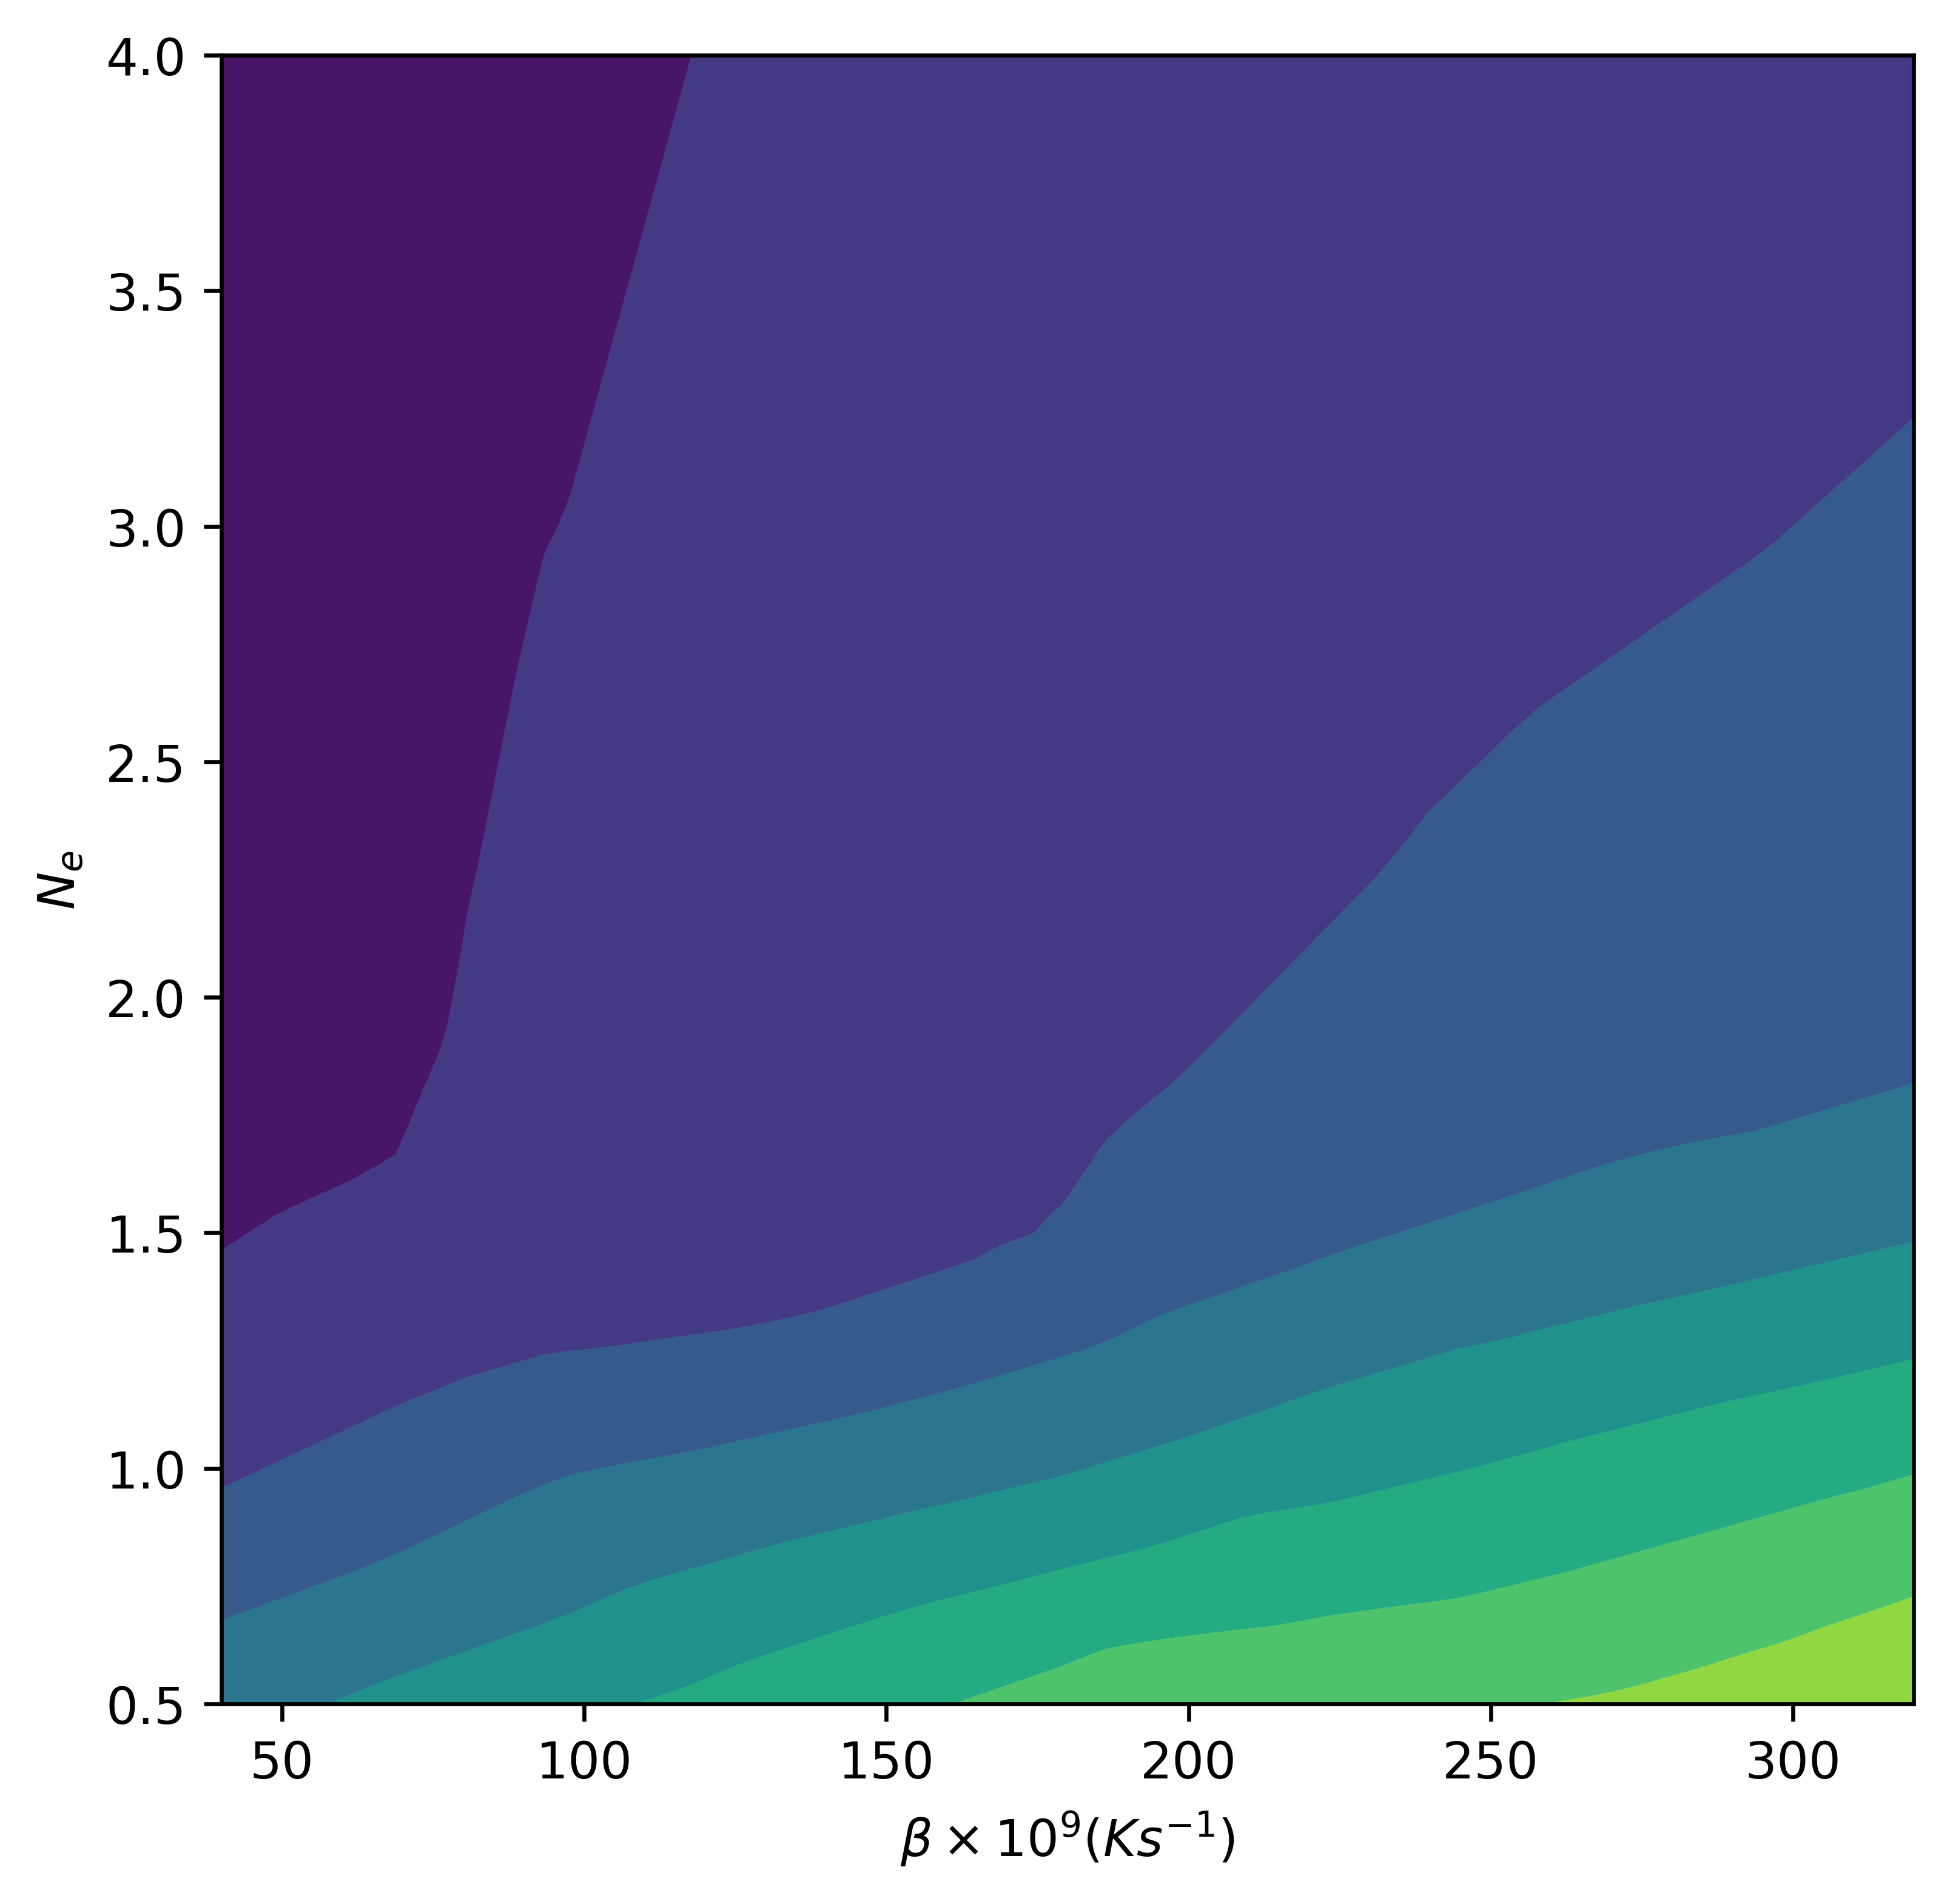

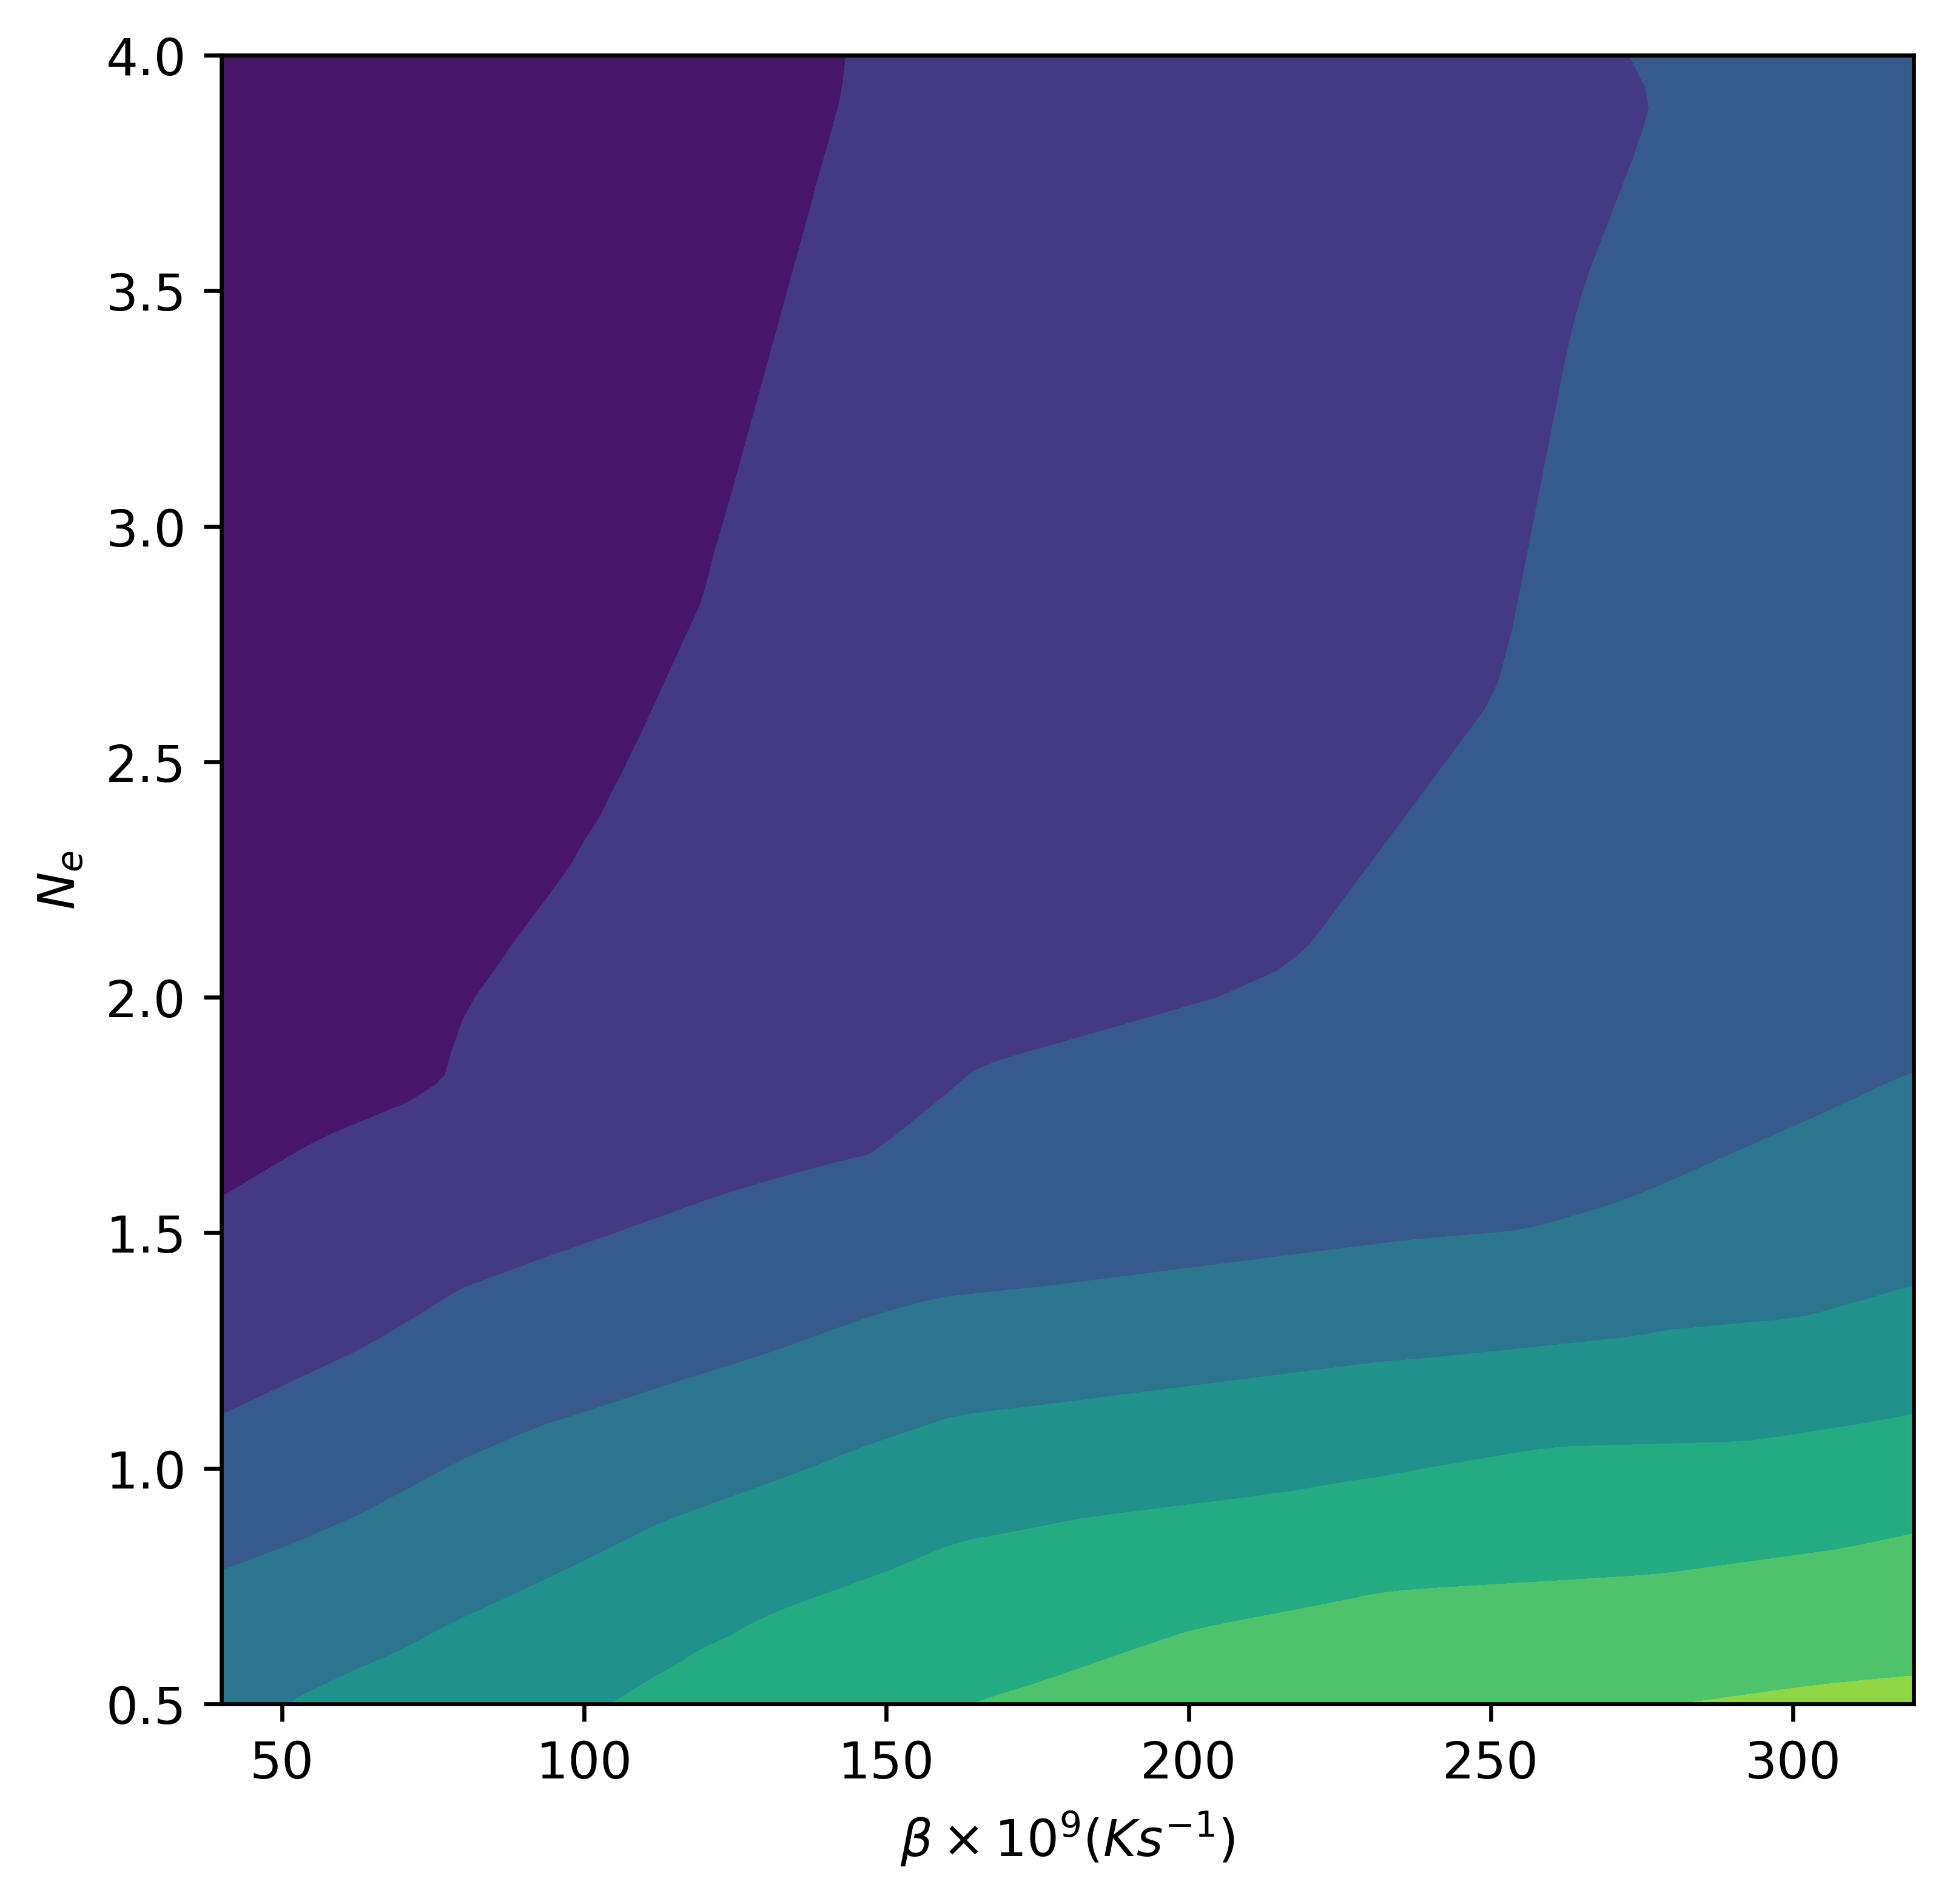

In [ ]:
for i in np.arange(3,7,1):
  pltNe = i
  pltX = X_grid[Y_grid==pltNe].reshape(64,64)
  pltY = Ne_grid[Y_grid==pltNe].reshape(64,64)
  pltZ = Z_wall[Y_grid==pltNe].reshape(64,64)
  image4 = plt.figure(figsize=(6,6), dpi = 600)
  cp = plt.contourf(pltX, pltY, pltZ,np.linspace(166,346,10))
  #plt.colorbar(cp)
  plt.xlabel(r'$\beta \times 10^9 (Ks^{-1})$')
  plt.ylabel(r'$N_e$')
  plt.show()
  image4.savefig('/content/drive/MyDrive/Rice Google Drive/Research/Misc/Leidenfrost_ML/Figures/Twall_del='+str(pltNe)+'.png',  bbox_inches="tight")

**Linear Regression from ANN data**

In [ ]:
X_grid_df[3]=X_grid_df[0]*X_grid_df[0]
X_grid_df[4]=X_grid_df[1]*X_grid_df[1]
X_grid_df[5]=X_grid_df[2]*X_grid_df[2]
X_grid_df[6]=X_grid_df[0]*X_grid_df[1]
X_grid_df[7]=X_grid_df[0]*X_grid_df[2]
X_grid_df[8]=X_grid_df[1]*X_grid_df[2]

In [ ]:
#X_grid_df.drop([4,6],axis=1,inplace=True)

In [ ]:
#X_grid_df = X_grid_df.iloc[:,0:7]

In [ ]:
X_grid_df

0    1         2         3  ...            7          8     4       6
0        40.0  3.0  0.500000    1600.0  ...    20.000000   1.500000   9.0   120.0
1        40.0  3.0  0.555556    1600.0  ...    22.222222   1.666667   9.0   120.0
2        40.0  3.0  0.611111    1600.0  ...    24.444444   1.833333   9.0   120.0
3        40.0  3.0  0.666667    1600.0  ...    26.666667   2.000000   9.0   120.0
4        40.0  3.0  0.722222    1600.0  ...    28.888889   2.166667   9.0   120.0
...       ...  ...       ...       ...  ...          ...        ...   ...     ...
262139  320.0  6.0  3.777778  102400.0  ...  1208.888889  22.666667  36.0  1920.0
262140  320.0  6.0  3.833333  102400.0  ...  1226.666667  23.000000  36.0  1920.0
262141  320.0  6.0  3.888889  102400.0  ...  1244.444444  23.333333  36.0  1920.0
262142  320.0  6.0  3.944444  102400.0  ...  1262.222222  23.666667  36.0  1920.0
262143  320.0  6.0  4.000000  102400.0  ...  1280.000000  24.000000  36.0  1920.0

[262144 rows x 9 columns]

In [ ]:
Y_df = pd.DataFrame()
Y_df[0] = pd.Series(Z[:,0])
#Y_df[1] = pd.Series(Z[:,1])
Y_df

0
0       246.750534
1       243.467896
2       240.708069
3       238.070221
4       235.330673
...            ...
262139  208.015396
262140  207.858704
262141  207.702026
262142  207.545334
262143  207.388657

[262144 rows x 1 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X_grid_df_scaled = scaler.fit_transform(X_grid_df)
Y_grid_df_scaled = scaler.fit_transform(Y_df)

In [ ]:
scores = pd.DataFrame()

In [ ]:
for i in range(0,11,1):
  from sklearn.model_selection import train_test_split
  # try random_state 0 to 9, and find best accuracy
  Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(X_grid_df_scaled, Y_grid_df_scaled, test_size = 0.1, random_state = i)
  from sklearn.linear_model import LinearRegression
  lin_reg = LinearRegression(normalize = True)
  # Fit() Training the  algorithm
  lin_reg.fit(Xg_train, Yg_train)
  scores[i]=pd.Series(lin_reg.score(Xg_test, Yg_test))

In [ ]:
max(scores.iloc[0,:])

0.9599255914074583

In [ ]:
scores[scores==max(scores.iloc[0,:])]

0   1   2   3   4   5   6   7   8   9   10
0  0.959926 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN

In [ ]:
a.append(scores[scores==max(scores.iloc[0,:])])

In [ ]:
a

[         0   1   2   3   4   5   6   7   8   9   10
 0  0.788812 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN,
    0   1         2   3   4   5   6   7   8   9   10
 0 NaN NaN  0.745814 NaN NaN NaN NaN NaN NaN NaN NaN,
          0   1   2   3   4   5   6   7   8   9   10
 0  0.959926 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN,
         0   1   2   3   4   5   6   7   8   9   10
 0  0.95987 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN,
         0   1   2   3   4   5   6   7   8   9   10
 0  0.95812 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN,
          0   1   2   3   4   5   6   7   8   9   10
 0  0.959926 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN,
          0   1   2   3   4   5   6   7   8   9   10
 0  0.959926 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN]

In [ ]:
lin_reg.coef_

array([[ 0.55027915, -0.42934217, -1.64861936, -0.07691677,  1.3091505 ,
        -0.46271435,  0.15603296,  0.30852371,  0.03630867]])

In [ ]:
lin_reg.intercept_

array([0.49799985])

In [ ]:
min(abs(lin_reg.coef_.ravel()))

0.036308673061924965

In [ ]:
X_grid_df.iloc[0:2,:]

0    1         2       3         5          7         8    4      6
0  40.0  3.0  0.500000  1600.0  0.250000  20.000000  1.500000  9.0  120.0
1  40.0  3.0  0.555556  1600.0  0.308642  22.222222  1.666667  9.0  120.0

In [ ]:
lin_reg.predict(X_grid_df.iloc[0:2,:])

ValueError: ignored

**Testing for raw data**

In [ ]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/Rice Google Drive/Research/Misc/nasim_ML.csv', sep = ',')
raw_dataset.dropna(inplace=True)
Y = raw_dataset.iloc[:,3:5]
X = raw_dataset.iloc[:,0:3]
X.columns=[0,1,2]
Y.columns=[0,1]

In [ ]:
scaler_y = scaler.fit(Y_df)
ggg= scaler_y.inverse_transform(lin_reg.predict(X))

In [ ]:
X[3]=X[0]*X[0]
X[4]=X[1]*X[1]
X[5]=X[2]*X[2]
X[6]=X[0]*X[1]
X[7]=X[0]*X[2]
X[8]=X[1]*X[2]
r2_score(Y[0],ggg)

-204208826.2301633

**Linear Regression from raw data**

In [ ]:
raw_dataset = pd.read_csv('/content/drive/MyDrive/Rice Google Drive/Research/Misc/nasim_ML.csv', sep = ',')
raw_dataset.dropna(inplace=True)
Y = raw_dataset.iloc[:,3:5]
X = raw_dataset.iloc[:,0:3]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X_scaled1 = scaler.fit_transform(X)
Y_scaled1 = scaler.fit_transform(Y)

In [ ]:
scores1 = pd.DataFrame()
for i in range(0,11,1):
  from sklearn.model_selection import train_test_split
  # try random_state 0 to 9, and find best accuracy
  X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_scaled1, Y_scaled1, test_size = 0.1, random_state = i)
  from sklearn.linear_model import LinearRegression
  lin_reg1 = LinearRegression(normalize = True)
  # Fit() Training the  algorithm
  lin_reg1.fit(Xg_train, Yg_train)
  scores1[i]=pd.Series(lin_reg1.score(Xg_test, Yg_test))